# 1. Global Data Health & Coverage



1.1 Print shape, column names, dtypes.


1.2 Count missing values per column; decide how each will be treated.


1.3 Check duplicate ride_id and full-row duplicates.


1.4 Summary stats for duration_sec, duration_min, distance_km, speed_kmh.


1.5 Validate ranges:
•	no negative or zero durations
•	distances > 0
•	speeds within a plausible range (e.g., 3–40 km/h typical).


1.6 Trip counts by date (for full 12 months later) to detect gaps or anomalies.

In [2]:
# ============================
# STEP 1: GLOBAL DATA HEALTH
# ============================

import pandas as pd
import numpy as np
import logging
import random
import os

# 1.0 – Reproducibility + logging
SEED = 42
np.random.seed(SEED)
random.seed(SEED)

logging.basicConfig(
    level=logging.INFO,
    format="%(asctime)s | %(levelname)s | %(name)s | %(message)s"
)
logger = logging.getLogger("eda_step1")

In [3]:
# 1.1 – Load data
DATA_PATH = "data/processed/combined_cleaned.parquet"  # adjust if needed

logger.info(f"Loading data from: {os.path.abspath(DATA_PATH)}")
df = pd.read_parquet(DATA_PATH)
logger.info(f"Loaded dataframe with shape: {df.shape}")

# Quick preview of data
print("\n=== HEAD (first 5 rows) ===")
display(df.head())

print("\n=== INFO (dtypes & non-null counts) ===")
df.info()  # prints to output

2025-11-08 12:01:32,184 | INFO | eda_step1 | Loading data from: f:\Code\Bike Share ML\data\processed\combined_cleaned.parquet
2025-11-08 12:01:36,117 | INFO | eda_step1 | Loaded dataframe with shape: (5732933, 25)



=== HEAD (first 5 rows) ===


,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,...,speed_kmh,duration_min,year,month,day,hour,weekday,is_weekend,date,is_roundtrip
0,743252713F32516B,classic_bike,2024-04-22 19:08:00,2024-04-22 19:12:00,Aberdeen St & Jackson Blvd,13157,Desplaines St & Jackson Blvd,15539,41.877726,-87.654787,...,13.477744,4.0,2024,4,22,19,0,False,2024-04-22,False
1,BE90D33D2240C614,electric_bike,2024-04-11 06:19:00,2024-04-11 06:22:00,Aberdeen St & Jackson Blvd,13157,Desplaines St & Jackson Blvd,15539,41.877722,-87.654959,...,18.254500,3.0,2024,4,11,6,3,False,2024-04-11,False
2,D47BBDDE7C40DD61,classic_bike,2024-04-20 11:13:00,2024-04-20 11:29:00,Sheridan Rd & Montrose Ave,TA1307000107,Ashland Ave & Belle Plaine Ave,13249,41.961670,-87.654640,...,4.985143,16.0,2024,4,20,11,5,True,2024-04-20,False
3,6684E760BF9EA9B5,classic_bike,2024-04-04 18:39:00,2024-04-04 18:43:00,Aberdeen St & Jackson Blvd,13157,Desplaines St & Jackson Blvd,15539,41.877726,-87.654787,...,13.477744,4.0,2024,4,4,18,3,False,2024-04-04,False
4,CA9EFC0D24C24A27,electric_bike,2024-04-19 19:30:00,2024-04-19 20:07:00,Sheridan Rd & Montrose Ave,TA1307000107,Stetson Ave & South Water St,TA1308000029,41.961613,-87.654615,...,14.162734,37.0,2024,4,19,19,4,False,2024-04-19,False



=== INFO (dtypes & non-null counts) ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5732933 entries, 0 to 5732932
Data columns (total 25 columns):
 #   Column              Dtype         
---  ------              -----         
 0   ride_id             string        
 1   rideable_type       string        
 2   started_at          datetime64[ns]
 3   ended_at            datetime64[ns]
 4   start_station_name  string        
 5   start_station_id    string        
 6   end_station_name    string        
 7   end_station_id      string        
 8   start_lat           float64       
 9   start_lng           float64       
 10  end_lat             float64       
 11  end_lng             float64       
 12  member_casual       string        
 13  duration_sec        float64       
 14  distance_km         float64       
 15  speed_kmh           float64       
 16  duration_min        float64       
 17  year                int32         
 18  month               int32         
 19  d

In [4]:
# 1.2 – Missing values per column
missing_counts = df.isna().sum()
missing_pct = (missing_counts / len(df)) * 100

missing_summary = (
    pd.DataFrame({
        "missing_count": missing_counts,
        "missing_pct": missing_pct.round(2)
    })
    .sort_values("missing_count", ascending=False)
)

print("\n=== MISSING VALUES SUMMARY ===")
display(missing_summary)
logger.info("Computed missing values per column.")


=== MISSING VALUES SUMMARY ===


,missing_count,missing_pct
end_station_id,1093013,19.07
end_station_name,1093013,19.07
start_station_name,1085447,18.93
start_station_id,1085447,18.93
end_lat,19,0.00
distance_km,19,0.00
speed_kmh,19,0.00
end_lng,19,0.00
ride_id,0,0.00
start_lat,0,0.00


2025-11-08 12:01:37,547 | INFO | eda_step1 | Computed missing values per column.


In [5]:
# 1.3 – Duplicate checks
if "ride_id" in df.columns:
    dup_ride_ids = df["ride_id"].duplicated().sum()
    logger.info(f"Duplicate ride_id entries: {dup_ride_ids}")
else:
    logger.warning("'ride_id' column not found; skipping ride_id duplicate check.")

full_duplicate_rows = df.duplicated().sum()
logger.info(f"Fully duplicated rows (all columns identical): {full_duplicate_rows}")

2025-11-08 12:01:39,374 | INFO | eda_step1 | Duplicate ride_id entries: 0
2025-11-08 12:01:49,718 | INFO | eda_step1 | Fully duplicated rows (all columns identical): 0


In [6]:
# 1.4 – Basic numeric summary stats
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
logger.info(f"Numeric columns detected: {numeric_cols}")

print("\n=== SUMMARY STATS FOR NUMERIC COLUMNS ===")
summary_stats = df[numeric_cols].describe().T
display(summary_stats)

2025-11-08 12:01:49,830 | INFO | eda_step1 | Numeric columns detected: ['start_lat', 'start_lng', 'end_lat', 'end_lng', 'duration_sec', 'distance_km', 'speed_kmh', 'duration_min', 'year', 'month', 'day', 'hour', 'weekday']



=== SUMMARY STATS FOR NUMERIC COLUMNS ===


,count,mean,std,min,25%,50%,75%,max
start_lat,5732933.0,41.902194,0.044639,41.64000,41.880958,41.896945,41.929645,42.070000
start_lng,5732933.0,-87.646182,0.027497,-87.91000,-87.660000,-87.641763,-87.629521,-87.520000
end_lat,5732914.0,41.902587,0.044791,41.48000,41.880958,41.897764,41.930000,42.190000
end_lng,5732914.0,-87.646458,0.027638,-87.99000,-87.660000,-87.642746,-87.629544,-87.460000
duration_sec,5732933.0,920.650502,1794.867403,0.05100,333.382000,582.863000,1029.165000,86396.074000
distance_km,5732914.0,2.159533,1.959174,0.00000,0.886958,1.583346,2.810889,33.538851
speed_kmh,5732914.0,11.006411,5.729868,0.00000,7.687839,11.116509,14.596348,49.998965
duration_min,5732933.0,15.344175,29.914457,0.00085,5.556367,9.714383,17.152750,1439.934567
year,5732933.0,2024.099871,0.299827,2024.00000,2024.000000,2024.000000,2024.000000,2025.000000
month,5732933.0,7.101989,2.619863,1.00000,5.000000,7.000000,9.000000,12.000000


In [7]:
# 1.5 – Range checks for key columns (sanity checks)
range_report = {}

def check_range(col, min_val=None, max_val=None, strictly_positive=False):
    """
    Helper to compute min/max and count how many values are outside expected range.
    """
    if col not in df.columns:
        logger.warning(f"Column '{col}' not found; skipping range checks.")
        return

    s = df[col].dropna()
    below_min = (s < min_val).sum() if min_val is not None else 0
    above_max = (s > max_val).sum() if max_val is not None else 0
    non_positive = (s <= 0).sum() if strictly_positive else 0

    range_report[col] = {
        "min": float(s.min()) if len(s) > 0 else None,
        "max": float(s.max()) if len(s) > 0 else None,
        "below_min_count": int(below_min),
        "above_max_count": int(above_max),
        "non_positive_count": int(non_positive),
        "total_non_null": int(len(s)),
    }

# Soft expectations – you can adjust later
check_range("duration_sec", min_val=0, strictly_positive=True)
check_range("duration_min", min_val=0, strictly_positive=True)
check_range("distance_km", min_val=0, strictly_positive=True)
check_range("speed_kmh", min_val=0, max_val=60)  # 60 km/h as a soft upper bound

if range_report:
    print("\n=== RANGE CHECK SUMMARY FOR KEY COLUMNS ===")
    display(pd.DataFrame(range_report).T)
else:
    print("\nNo key columns found for range checks.")


=== RANGE CHECK SUMMARY FOR KEY COLUMNS ===


,min,max,below_min_count,above_max_count,non_positive_count,total_non_null
duration_sec,0.05100,86396.074000,0.0,0.0,0.0,5732933.0
duration_min,0.00085,1439.934567,0.0,0.0,0.0,5732933.0
distance_km,0.00000,33.538851,0.0,0.0,327000.0,5732914.0
speed_kmh,0.00000,49.998965,0.0,0.0,0.0,5732914.0


In [8]:
# 1.6 – Trip counts by date (works for 1 month or 12 months)
date_col = None
if "date" in df.columns:
    date_col = "date"
elif "started_at" in df.columns:
    # ensure datetime and create date column
    df["started_at"] = pd.to_datetime(df["started_at"])
    df["date"] = df["started_at"].dt.date
    date_col = "date"
else:
    logger.warning("No 'date' or 'started_at' column found; skipping daily trip counts.")

if date_col is not None:
    # use ride_id if available, otherwise just count rows
    count_col = "ride_id" if "ride_id" in df.columns else df.columns[0]
    trips_per_date = (
        df.groupby(date_col)[count_col]
        .count()
        .rename("trip_count")
        .reset_index()
        .sort_values(date_col)
    )
    print("\n=== TRIP COUNTS PER DATE ===")
    display(trips_per_date)

    # Show coverage window
    date_series = pd.to_datetime(trips_per_date[date_col])
    logger.info(f"Data covers from {date_series.min().date()} to {date_series.max().date()} based on '{date_col}'.")
else:
    print("\nSkipped daily trip counts because no date column was available.")



=== TRIP COUNTS PER DATE ===


,date,trip_count
0,2024-04-01,6274
1,2024-04-02,7391
2,2024-04-03,4678
3,2024-04-04,8355
4,2024-04-05,10394
...,...,...
360,2025-03-27,10437
361,2025-03-28,15397
362,2025-03-29,12527
363,2025-03-30,7792


2025-11-08 12:01:53,014 | INFO | eda_step1 | Data covers from 2024-04-01 to 2025-03-31 based on 'date'.


# 2. Core Ride-Level Behavior

## 2.1 Plot distributions (histogram + boxplot) of:
- duration_min
- distance_km
- speed_kmh

### Duration min

1. Distribution Shape
   - The histogram shows most rides are short, with very few long ones.
   - This creates a strong right skew pattern.

2. Typical Trip Lengths
   - 25% of rides are under 6 minutes (many very short trips)
   - Half of rides finish within 10 minutes (typical ride length)
   - 75% of rides are under 17 minutes
   - 90% of rides end within 30 minutes
   - Only 5% of rides last over 40 minutes (long but reasonable)
   - Just 1% of rides exceed 1.5 hours (extreme outliers)

3. Boxplot Meaning
   - Most data is clustered in a narrow 5-30 minute range
   - Many outliers exist, with some rides lasting up to 24 hours

4. Project Implications
   - Duration data is heavily skewed with many outliers
   - Most normal trips are under 30-40 minutes
   - Rides over 1.5-2 hours should be:
     * Investigated as anomalies
     * Treated separately when training models

2025-11-08 12:01:53,691 | INFO | eda_step1 | duration_min | non-null: 5732933, min: 0.0008, p25: 5.5564, median: 9.7144, p75: 17.1528, p99: 94.2727, max: 1439.9346



=== duration_min: key percentiles ===
  p25: 5.5564
  p50: 9.7144
  p75: 17.1528
  p90: 29.7259
  p95: 42.1227
  p99: 94.2727


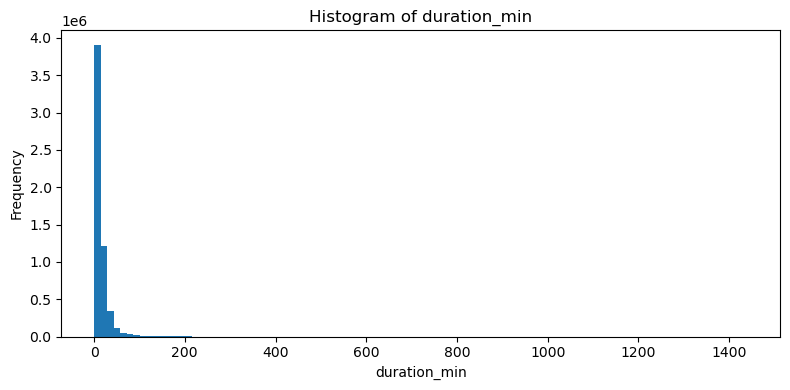

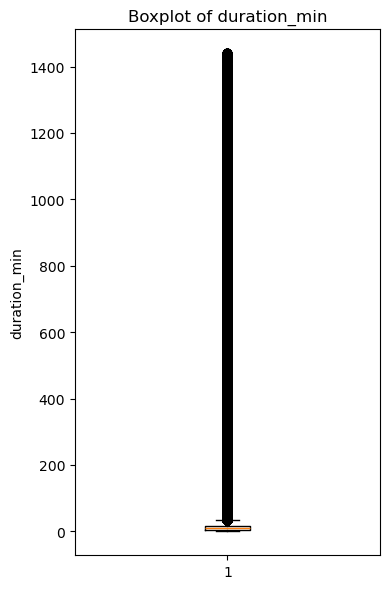

In [9]:
# ============================
# STEP 2.1: CORE RIDE-LEVEL BEHAVIOR
# Distributions (hist + boxplot) for:
#   - duration_min
#   - distance_km
#   - speed_kmh
# ============================

import matplotlib.pyplot as plt
import numpy as np

cols_to_plot = ["duration_min"]

for col in cols_to_plot:
    if col not in df.columns:
        logger.warning(f"Column '{col}' not found; skipping.")
        continue

    # Drop missing values for clean plotting
    s = df[col].dropna()

    logger.info(
        f"{col} | non-null: {len(s)}, "
        f"min: {s.min():.4f}, p25: {s.quantile(0.25):.4f}, "
        f"median: {s.median():.4f}, p75: {s.quantile(0.75):.4f}, "
        f"p99: {s.quantile(0.99):.4f}, max: {s.max():.4f}"
    )

    # Optional: print key percentiles for quick reference
    print(f"\n=== {col}: key percentiles ===")
    for q in [0.25, 0.5, 0.75, 0.9, 0.95, 0.99]:
        print(f"  p{int(q*100):>2}: {s.quantile(q):.4f}")

    # -------- Histogram --------
    plt.figure(figsize=(8, 4))
    plt.hist(s, bins=100)  # many bins to see shape; you can adjust later
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()

    # -------- Boxplot --------
    plt.figure(figsize=(4, 6))
    plt.boxplot(s, vert=True, showfliers=True)
    plt.title(f"Boxplot of {col}")
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()


### Distance KM

1. Distribution Shape
   - The histogram shows most trips are short distances with few long ones.
   - This creates a right-skewed pattern.

2. Typical Trip Distances
   - 25% of rides are under 0.9 km (very short hops)
   - Half of all trips are under 1.6 km (typical ride distance)
   - 75% of rides are under 2.8 km
   - 90% of trips are under 4.6 km
   - Only 5% of trips exceed 6 km
   - Just 1% go beyond 9.4 km (rare outliers)

3. Boxplot Meaning
   - Most data is clustered between 0.9-2.8 km
   - Many outliers exist beyond 3-5 km, with some up to 33 km

4. Project Implications
   - Most normal trips are under 5-6 km
   - This range provides the main learning signal for models
   - Very long distances (>10 km) should be:
     * Flagged as anomalies
     * Given special treatment in models

2025-11-08 12:01:55,347 | INFO | eda_step1 | distance_km | non-null: 5732914, min: 0.0000, p25: 0.8870, median: 1.5833, p75: 2.8109, p99: 9.4227, max: 33.5389



=== distance_km: key percentiles ===
  p25: 0.8870
  p50: 1.5833
  p75: 2.8109
  p90: 4.6336
  p95: 6.0248
  p99: 9.4227


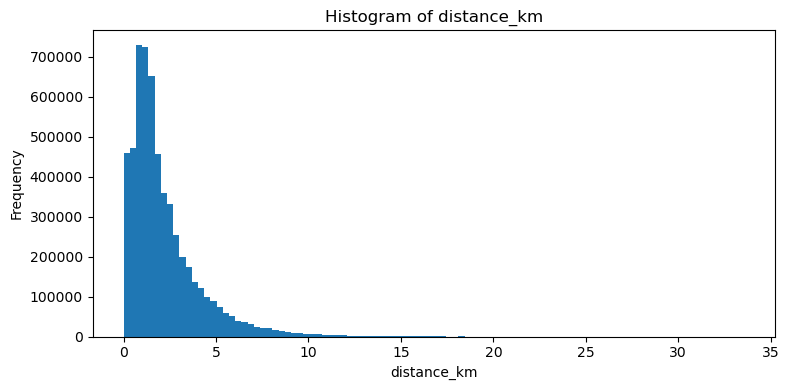

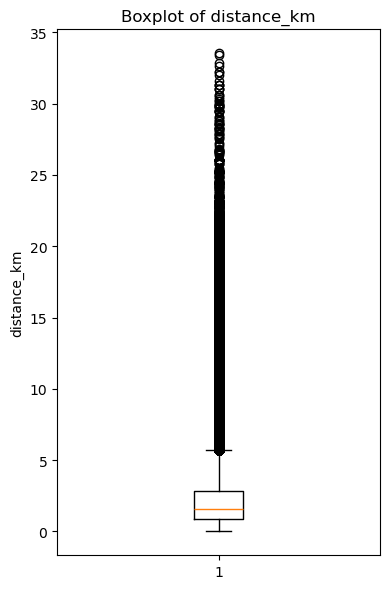

In [10]:
cols_to_plot = ["distance_km"]

for col in cols_to_plot:
    if col not in df.columns:
        logger.warning(f"Column '{col}' not found; skipping.")
        continue

    # Drop missing values for clean plotting
    s = df[col].dropna()

    logger.info(
        f"{col} | non-null: {len(s)}, "
        f"min: {s.min():.4f}, p25: {s.quantile(0.25):.4f}, "
        f"median: {s.median():.4f}, p75: {s.quantile(0.75):.4f}, "
        f"p99: {s.quantile(0.99):.4f}, max: {s.max():.4f}"
    )

    # Optional: print key percentiles for quick reference
    print(f"\n=== {col}: key percentiles ===")
    for q in [0.25, 0.5, 0.75, 0.9, 0.95, 0.99]:
        print(f"  p{int(q*100):>2}: {s.quantile(q):.4f}")

    # -------- Histogram --------
    plt.figure(figsize=(8, 4))
    plt.hist(s, bins=100)  # many bins to see shape; you can adjust later
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()

    # -------- Boxplot --------
    plt.figure(figsize=(4, 6))
    plt.boxplot(s, vert=True, showfliers=True)
    plt.title(f"Boxplot of {col}")
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()


### Speed KMH

1. Distribution Shape
   - Large spike near 0 km/h
   - Main cluster around 10-12 km/h
   - Long tail extending to 30-50 km/h
   - Most rides at normal urban bike speeds with some near-zero and very high speeds

2. Typical Speeds
   - 25% of rides are under 7.7 km/h (slow traffic/short trips)
   - Half of all trips are under 11.1 km/h (typical cruising speed)
   - 75% of rides are under 14.6 km/h
   - Only 10% exceed 18.1 km/h
   - Just 5% go faster than 20.1 km/h
   - Only 1% exceed 24.4 km/h (extreme outliers up to 50 km/h)

3. Boxplot Meaning
   - Most data clustered between 7.7-14.6 km/h
   - Outliers extend up to ~50 km/h
   - Speeds above 25 km/h are rare and could be:
     * GPS errors
     * Timing issues on short trips
     * Genuinely fast riders

4. Zero-Speed Spike
   - Many trips show very low speeds (0-1 km/h)
   - Likely causes:
     * Near-zero distance with non-zero duration
     * GPS jitter on short rides
     * Users unlocking but not actually riding
   - Modeling approach:
     * Keep but flag as potential anomalies
     * Exclude clear data errors (duration > X but distance ~0)

2025-11-08 12:01:56,757 | INFO | eda_step1 | speed_kmh | non-null: 5732914, min: 0.0000, p25: 7.6878, median: 11.1165, p75: 14.5963, p99: 24.3659, max: 49.9990



=== speed_kmh: key percentiles ===
  p25: 7.6878
  p50: 11.1165
  p75: 14.5963
  p90: 18.0510
  p95: 20.1443
  p99: 24.3659


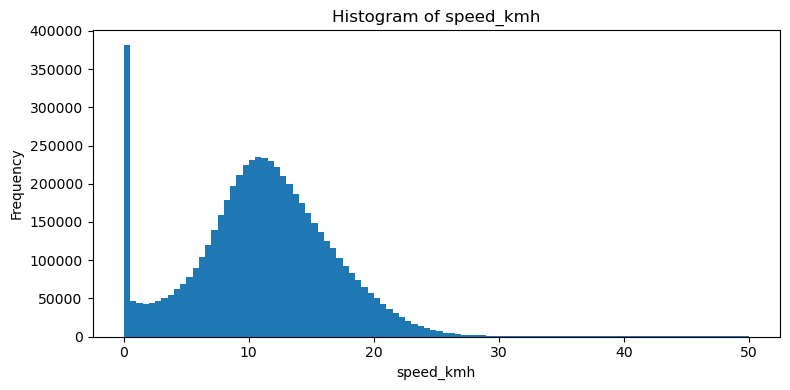

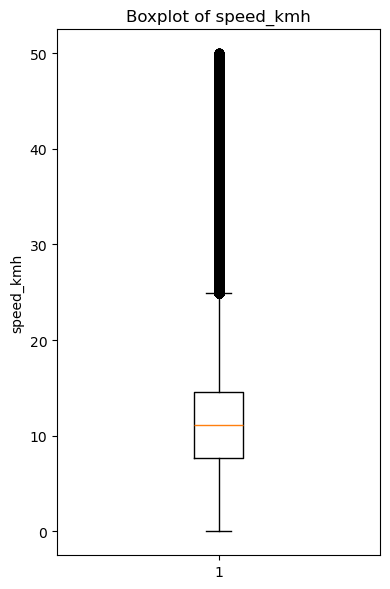

In [11]:
cols_to_plot = ["speed_kmh"]

for col in cols_to_plot:
    if col not in df.columns:
        logger.warning(f"Column '{col}' not found; skipping.")
        continue

    # Drop missing values for clean plotting
    s = df[col].dropna()

    logger.info(
        f"{col} | non-null: {len(s)}, "
        f"min: {s.min():.4f}, p25: {s.quantile(0.25):.4f}, "
        f"median: {s.median():.4f}, p75: {s.quantile(0.75):.4f}, "
        f"p99: {s.quantile(0.99):.4f}, max: {s.max():.4f}"
    )

    # Optional: print key percentiles for quick reference
    print(f"\n=== {col}: key percentiles ===")
    for q in [0.25, 0.5, 0.75, 0.9, 0.95, 0.99]:
        print(f"  p{int(q*100):>2}: {s.quantile(q):.4f}")

    # -------- Histogram --------
    plt.figure(figsize=(8, 4))
    plt.hist(s, bins=100)  # many bins to see shape; you can adjust later
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()

    # -------- Boxplot --------
    plt.figure(figsize=(4, 6))
    plt.boxplot(s, vert=True, showfliers=True)
    plt.title(f"Boxplot of {col}")
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()


## 2.2 Trip counts by hour of day (all rides)

1. Hourly Distribution Pattern
   - Overnight (0-4h): Very low usage (<1.2% per hour), especially dead 2-4h (<0.5%)
   - Morning Ramp-up:
     * 5h: 0.8% (first noticeable bump)
     * 6h: 2.26%
     * 7h: 4.34%
     * 8h: 5.67% (clear morning commute pattern)
   - Midday Plateau (9-14h): Stable 4-6% per hour (mix of work and casual rides)
   - Evening Peak (strongest):
     * 15h: 7.15%
     * 16h: 9.11%
     * 17h: 10.15% (highest usage)
     * 18h: 8.23% (commute + after-work trips)
   - Night Decline: Steady drop after 19h
     * 21h: 3.32%
     * 23h: 1.72%

2. Project Implications
   - Clear commuter pattern with two peaks:
     * Morning (7-9h)
     * Stronger evening (16-18h)
   - Model Requirements:
     * Handle very low night demand (many zeros/small counts)
     * Capture sharp commute-time peaks (non-linear patterns)
   - Service Fairness:
     * Zones with poor availability during peak hours (7-9h, 16-18h) are critical
     * These periods represent highest user demand

2025-11-08 12:01:57,508 | INFO | eda_step1 | 'hour' column already present; using existing values.



=== TRIP COUNTS BY HOUR (WITH PERCENTAGE OF TOTAL) ===


,hour,trip_count,trip_pct
0,0,67492,1.177268
1,1,43480,0.758425
2,2,26004,0.453590
3,3,15975,0.278653
4,4,15046,0.262449
5,5,45673,0.796678
6,6,129493,2.258757
7,7,249000,4.343327
8,8,325327,5.674704
9,9,246459,4.299004


2025-11-08 12:01:57,701 | INFO | eda_step1 | Trip counts by hour computed. Min trips: 15046, Max trips: 581774


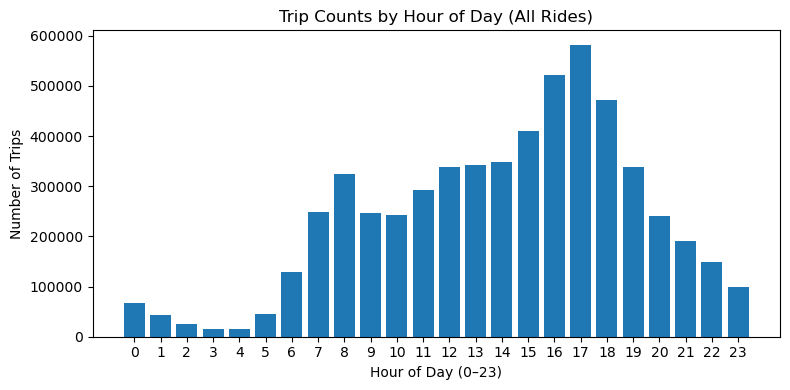

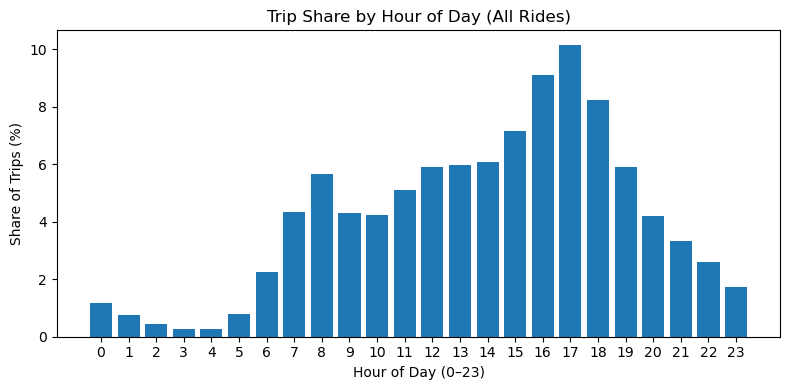

In [12]:
# ============================
# STEP 2.2: TRIP COUNTS BY HOUR OF DAY
# ============================

import matplotlib.pyplot as plt

# 2.2.1 Ensure we have an 'hour' column
if "hour" not in df.columns:
    logger.info("'hour' column not found; deriving from 'started_at'.")
    df["started_at"] = pd.to_datetime(df["started_at"])
    df["hour"] = df["started_at"].dt.hour
else:
    logger.info("'hour' column already present; using existing values.")

# 2.2.2 Compute trip counts per hour
# use ride_id if present, otherwise just count rows
count_col = "ride_id" if "ride_id" in df.columns else df.columns[0]

hour_counts = (
    df.groupby("hour")[count_col]
    .count()
    .rename("trip_count")
    .reset_index()
    .sort_values("hour")
)

# print("=== TRIP COUNTS BY HOUR OF DAY ===")
# display(hour_counts)

# Optional: add share of total trips
total_trips = hour_counts["trip_count"].sum()
hour_counts["trip_pct"] = 100 * hour_counts["trip_count"] / total_trips

print("\n=== TRIP COUNTS BY HOUR (WITH PERCENTAGE OF TOTAL) ===")
display(hour_counts)

logger.info(
    "Trip counts by hour computed. Min trips: %d, Max trips: %d",
    hour_counts["trip_count"].min(),
    hour_counts["trip_count"].max()
)

# 2.2.3 Plot bar chart of trip counts by hour
plt.figure(figsize=(8, 4))
plt.bar(hour_counts["hour"], hour_counts["trip_count"])
plt.xlabel("Hour of Day (0–23)")
plt.ylabel("Number of Trips")
plt.title("Trip Counts by Hour of Day (All Rides)")
plt.xticks(range(0, 24))  # show all hours
plt.tight_layout()
plt.show()

# 2.2.4 Plot percentage version (optional)
plt.figure(figsize=(8, 4))
plt.bar(hour_counts["hour"], hour_counts["trip_pct"])
plt.xlabel("Hour of Day (0–23)")
plt.ylabel("Share of Trips (%)")
plt.title("Trip Share by Hour of Day (All Rides)")
plt.xticks(range(0, 24))
plt.tight_layout()
plt.show()


## 2.3 Trip counts by weekday vs weekend.

1. Usage Distribution
   - Weekday trips: 4,052,372 (~70.7% of all rides)
   - Weekend trips: 1,680,561 (~29.3% of all rides)
   - 2.4× more rides on weekdays than weekends

2. Pattern Interpretation
   - System heavily dominated by weekday usage
   - Suggests commuter/routine use (work/school travel) rather than tourist/leisure

3. Project Implications
   - Models must prioritize weekday patterns, especially commute hours
   - Include is_weekend (and possibly weekday) as core features in:
     * Multi-task rider model
     * Station demand forecasting
     * Fairness analysis (e.g., zones only busy on weekends)

=== TRIP COUNTS: WEEKDAY VS WEEKEND ===


,label,trip_count,trip_pct
0,Weekday,4052372,70.685843
1,Weekend,1680561,29.314157


C:\Users\bnsev\AppData\Local\Temp\ipykernel_69664\3206064815.py:41: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  int(weekend_counts.loc[weekend_counts["is_weekend"] == False, "trip_count"]),
C:\Users\bnsev\AppData\Local\Temp\ipykernel_69664\3206064815.py:42: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(weekend_counts.loc[weekend_counts["is_weekend"] == False, "trip_pct"]),
C:\Users\bnsev\AppData\Local\Temp\ipykernel_69664\3206064815.py:43: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  int(weekend_counts.loc[weekend_counts["is_weekend"] == True, "trip_count"]),
C:\Users\bnsev\AppData\Local\Temp\ipykernel_69664\3206064815.py:44: FutureWarning: Calling float on a single element Series is deprecate

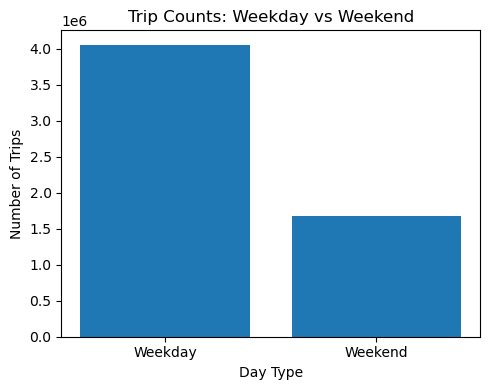

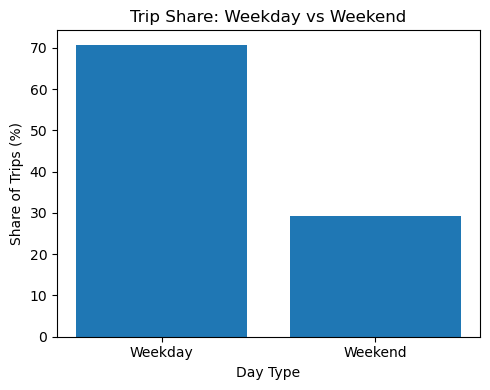

In [13]:
# ============================
# STEP 2.3: TRIP COUNTS BY WEEKDAY VS WEEKEND
# ============================

import matplotlib.pyplot as plt

# 2.3.1 Ensure we have 'weekday' and 'is_weekend'
if "weekday" not in df.columns:
    logger.info("'weekday' column not found; deriving from 'started_at'.")
    df["started_at"] = pd.to_datetime(df["started_at"])
    df["weekday"] = df["started_at"].dt.weekday  # 0=Mon, 6=Sun

if "is_weekend" not in df.columns:
    logger.info("'is_weekend' column not found; creating (Sat/Sun as weekend).")
    df["is_weekend"] = df["weekday"].isin([5, 6])  # 5=Sat, 6=Sun

# 2.3.2 Group by weekend vs weekday
count_col = "ride_id" if "ride_id" in df.columns else df.columns[0]

weekend_counts = (
    df.groupby("is_weekend")[count_col]
    .count()
    .rename("trip_count")
    .reset_index()
)

# Map boolean to readable labels
weekend_counts["label"] = weekend_counts["is_weekend"].map(
    {False: "Weekday", True: "Weekend"}
)

# Compute percentages
total_trips = weekend_counts["trip_count"].sum()
weekend_counts["trip_pct"] = 100 * weekend_counts["trip_count"] / total_trips

print("=== TRIP COUNTS: WEEKDAY VS WEEKEND ===")
display(weekend_counts[["label", "trip_count", "trip_pct"]])

logger.info(
    "Weekday trips: %d (%.2f%%), Weekend trips: %d (%.2f%%)",
    int(weekend_counts.loc[weekend_counts["is_weekend"] == False, "trip_count"]),
    float(weekend_counts.loc[weekend_counts["is_weekend"] == False, "trip_pct"]),
    int(weekend_counts.loc[weekend_counts["is_weekend"] == True, "trip_count"]),
    float(weekend_counts.loc[weekend_counts["is_weekend"] == True, "trip_pct"]),
)

# 2.3.3 Bar plot
plt.figure(figsize=(5, 4))
plt.bar(weekend_counts["label"], weekend_counts["trip_count"])
plt.xlabel("Day Type")
plt.ylabel("Number of Trips")
plt.title("Trip Counts: Weekday vs Weekend")
plt.tight_layout()
plt.show()

# Optional: percentage plot
plt.figure(figsize=(5, 4))
plt.bar(weekend_counts["label"], weekend_counts["trip_pct"])
plt.xlabel("Day Type")
plt.ylabel("Share of Trips (%)")
plt.title("Trip Share: Weekday vs Weekend")
plt.tight_layout()
plt.show()


## 2.4 Trip counts by month (once 12 months combined).

1. Seasonal Pattern
   - Spring Ramp-up:
     * Apr: 7.1%
     * May: 10.6% (weather improvement boost)
   - Peak Season:
     * Jun: 12.3%
     * Jul: 13.0%
     * Aug: 13.1%
     * Sep: 14.2% (highest usage)
     * Oct: 10.7%
   - Off-season:
     * Nov: 5.8%
     * Dec: 3.1%
     * Jan: 2.4% (lowest)
     * Feb: 2.6%
     * Mar: 4.9% (slight recovery)

2. Project Implications
   - Data spans 12 months with strong seasonality
   - Most training data comes from late spring to early fall
   - Winter months are sparse and noisier
   - Recommendations:
     * Include month/season as features in all models
     * Use time-based validation splits (e.g., train Apr-Jan, validate Feb-Mar)
     * Consider different risk profiles for winter vs summer zones in fairness analysis

2025-11-08 12:01:58,385 | INFO | eda_step1 | 'year' and 'month' already present; using existing values.


=== TRIP COUNTS BY YEAR-MONTH ===


,year,month,trip_count,trip_pct
0,2024,4,408150,7.119392
1,2024,5,606850,10.585332
2,2024,6,707218,12.336059
3,2024,7,745413,13.002297
4,2024,8,752149,13.119794
5,2024,9,815451,14.223976
6,2024,10,613708,10.704957
7,2024,11,333865,5.823633
8,2024,12,177578,3.097507
9,2025,1,137968,2.406587


2025-11-08 12:01:58,677 | INFO | eda_step1 | Monthly trips range from 137968 to 815451
2025-11-08 12:01:58,682 | INFO | matplotlib.category | Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-11-08 12:01:58,683 | INFO | matplotlib.category | Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


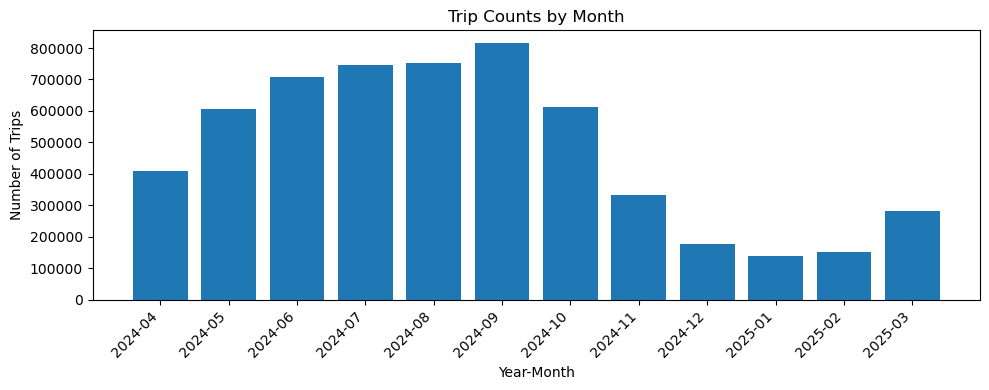

In [14]:
# ============================
# STEP 2.4: TRIP COUNTS BY MONTH (YEAR + MONTH)
# ============================

import matplotlib.pyplot as plt
import pandas as pd

# 2.4.1 Ensure we have 'year' and 'month' columns
if "year" not in df.columns or "month" not in df.columns:
    logger.info("'year' or 'month' not found; deriving from 'started_at'.")
    df["started_at"] = pd.to_datetime(df["started_at"])
    df["year"] = df["started_at"].dt.year
    df["month"] = df["started_at"].dt.month
else:
    logger.info("'year' and 'month' already present; using existing values.")

# 2.4.2 Compute trip counts per (year, month)
count_col = "ride_id" if "ride_id" in df.columns else df.columns[0]

month_counts = (
    df.groupby(["year", "month"])[count_col]
    .count()
    .rename("trip_count")
    .reset_index()
)

# Create a proper datetime for sorting and nice labels (1st of each month)
month_counts["year_month"] = pd.to_datetime(
    month_counts["year"].astype(str) + "-" + month_counts["month"].astype(str) + "-01"
)

# Sort chronologically
month_counts = month_counts.sort_values("year_month")

# Compute percentage of total trips
total_trips = month_counts["trip_count"].sum()
month_counts["trip_pct"] = 100 * month_counts["trip_count"] / total_trips

print("=== TRIP COUNTS BY YEAR-MONTH ===")
display(month_counts[["year", "month", "trip_count", "trip_pct"]])

logger.info(
    "Monthly trips range from %d to %d",
    month_counts["trip_count"].min(),
    month_counts["trip_count"].max()
)

# 2.4.3 Plot bar chart (chronological)
plt.figure(figsize=(10, 4))
plt.bar(month_counts["year_month"].dt.strftime("%Y-%m"), month_counts["trip_count"])
plt.xlabel("Year-Month")
plt.ylabel("Number of Trips")
plt.title("Trip Counts by Month")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


## 2.5 Average duration_min and distance_km by:
- hour of day
- weekday vs weekend


=== AVERAGE DURATION & DISTANCE BY HOUR ===

1. Duration Pattern by Hour
   - Early Morning (0-5h):
     * Average: 13-15 min
     * Median: 7-8.5 min
     * Moderate duration with low trip counts
   
   - Morning Commute (6-8h):
     * Average: 11-12 min (shorter than other times)
     * Distance: 2.17-2.24 km
     * Direct, purposeful commute trips (faster rides)
   
   - Late Morning to Early Afternoon (9-14h):
     * Average: 14-17.5 min
     * Median: 9.5-10.6 min
     * Distance: ~2.05-2.17 km
     * Longer time but similar distance (leisure/errand trips)
   
   - Evening Commute (15-18h):
     * Average: 15-16.5 min
     * Median: 10.2-10.5 min
     * Distance: 2.21-2.29 km (highest)
     * Longer distance but similar time (commute behavior)
   
   - Night (19-23h):
     * Average: 14.4-15.0 min
     * Distance: 2.03-2.12 km
     * Typical short urban rides with lower volume

2. Project Implications
   - Hour-of-day significantly changes rider behavior:
     * Commute hours (6-8, 15-18): Shorter time, longer distance (direct trips)
     * Midday (10-14): Longer time, similar distance (slower/stop-heavy usage)
   - Recommendations:
     * Use hour as core feature in duration model
     * Consider time-of-day in anomaly detection
     * Factor in commute hours for fairness analysis (more "critical" periods)

=== AVERAGE DURATION & DISTANCE: WEEKDAY VS WEEKEND ===
1. Weekday vs Weekend Patterns
   - Weekdays:
     * Average duration: 14.1 min
     * Median duration: 9.1 min
     * Average distance: 2.13 km
     * Median distance: 1.55 km
     * Trips: 4.05M (~71%)
   
   - Weekends:
     * Average duration: 18.4 min
     * Median duration: 11.3 min
     * Average distance: 2.23 km
     * Median distance: 1.65 km
     * Trips: 1.68M (~29%)

2. Key Differences
   - Weekends: Longer rides (~4 extra minutes) and slightly farther (~0.1 km)
     * Indicates leisure/recreational usage
   - Weekdays: Shorter, more direct trips
     * Suggests point A→B commuting behavior

3. Project Implications
   - is_weekend affects both volume and trip characteristics
   - Weekend and weekday patterns are fundamentally different
   - Recommendations:
     * Include is_weekend as core feature in all models
     * Consider different regimes for weekdays vs weekends
     * Use for fairness analysis (commuter access vs leisure access)

=== AVERAGE DURATION & DISTANCE BY HOUR ===


,hour,avg_duration_min,median_duration_min,avg_distance_km,median_distance_km,trip_count
0,0,14.581001,8.543450,1.987454,1.468977,67492
1,1,14.773742,8.484133,1.968673,1.424870,43480
2,2,14.592398,8.270117,1.985311,1.421374,26004
3,3,14.857387,8.250883,2.148536,1.522514,15975
4,4,13.223824,7.287492,2.158075,1.462291,15046
5,5,11.226083,7.361233,2.220312,1.591284,45673
6,6,11.225381,7.613183,2.203079,1.611882,129493
7,7,11.858062,8.311975,2.244108,1.644367,249000
8,8,12.160885,8.496133,2.167506,1.561623,325327
9,9,14.266033,8.543350,2.072425,1.462291,246459


2025-11-08 12:01:59,270 | INFO | eda_step1 | Hourly avg duration ranges from 11.23 to 17.49 minutes
2025-11-08 12:01:59,270 | INFO | eda_step1 | Hourly avg distance ranges from 1.97 to 2.29 km


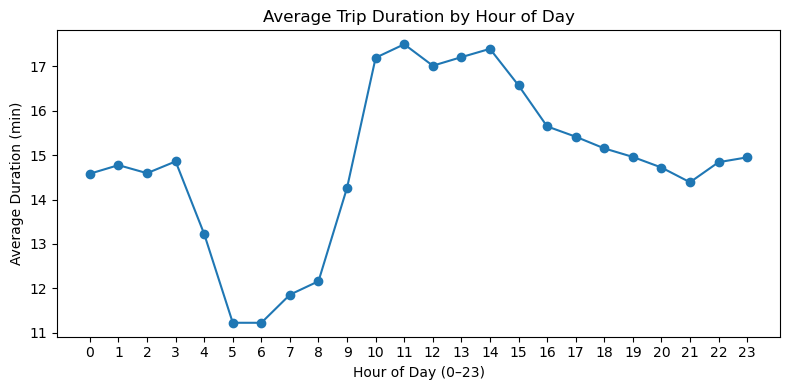

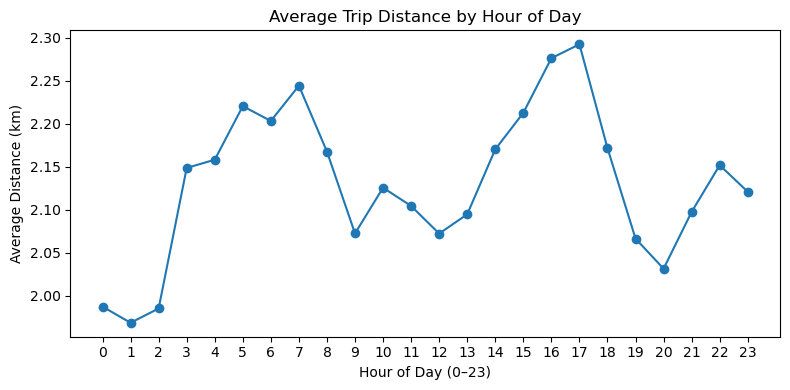


=== AVERAGE DURATION & DISTANCE: WEEKDAY VS WEEKEND ===


,label,avg_duration_min,avg_distance_km,median_duration_min,median_distance_km,trip_count
0,Weekday,14.071592,2.129160,9.130850,1.552084,4052372
1,Weekend,18.412780,2.232772,11.306217,1.652433,1680561


2025-11-08 12:02:00,032 | INFO | eda_step1 | Computed weekday vs weekend averages for duration and distance.


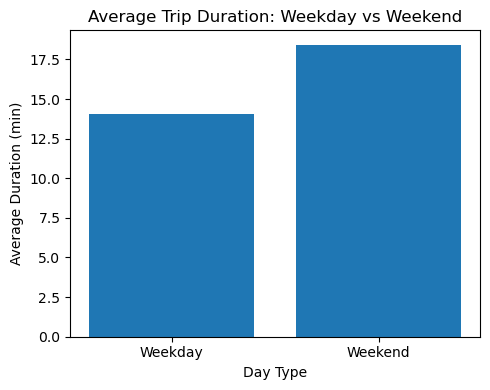

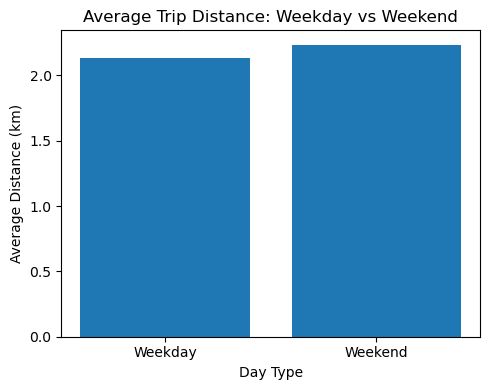

In [15]:
# ============================
# STEP 2.5: AVERAGE DURATION & DISTANCE
#   - by hour of day
#   - by weekday vs weekend
# ============================

import matplotlib.pyplot as plt
import pandas as pd

# Make sure needed columns exist
for col in ["duration_min", "distance_km"]:
    if col not in df.columns:
        raise KeyError(f"Required column '{col}' not found in df.")

# 2.5.1 Averages by HOUR OF DAY
if "hour" not in df.columns:
    logger.info("'hour' not found; deriving from 'started_at'.")
    df["started_at"] = pd.to_datetime(df["started_at"])
    df["hour"] = df["started_at"].dt.hour

count_col = "ride_id" if "ride_id" in df.columns else df.columns[0]

hour_agg = (
    df.groupby("hour")
    .agg(
        avg_duration_min=("duration_min", "mean"),
        median_duration_min=("duration_min", "median"),
        avg_distance_km=("distance_km", "mean"),
        median_distance_km=("distance_km", "median"),
        trip_count=(count_col, "count"),
    )
    .reset_index()
    .sort_values("hour")
)

print("=== AVERAGE DURATION & DISTANCE BY HOUR ===")
display(hour_agg)

logger.info(
    "Hourly avg duration ranges from %.2f to %.2f minutes",
    hour_agg["avg_duration_min"].min(),
    hour_agg["avg_duration_min"].max()
)
logger.info(
    "Hourly avg distance ranges from %.2f to %.2f km",
    hour_agg["avg_distance_km"].min(),
    hour_agg["avg_distance_km"].max()
)

# Plot: average duration by hour
plt.figure(figsize=(8, 4))
plt.plot(hour_agg["hour"], hour_agg["avg_duration_min"], marker="o")
plt.xlabel("Hour of Day (0–23)")
plt.ylabel("Average Duration (min)")
plt.title("Average Trip Duration by Hour of Day")
plt.xticks(range(0, 24))
plt.tight_layout()
plt.show()

# Plot: average distance by hour
plt.figure(figsize=(8, 4))
plt.plot(hour_agg["hour"], hour_agg["avg_distance_km"], marker="o")
plt.xlabel("Hour of Day (0–23)")
plt.ylabel("Average Distance (km)")
plt.title("Average Trip Distance by Hour of Day")
plt.xticks(range(0, 24))
plt.tight_layout()
plt.show()


# 2.5.2 Averages by WEEKDAY vs WEEKEND
if "weekday" not in df.columns:
    logger.info("'weekday' not found; deriving from 'started_at'.")
    df["started_at"] = pd.to_datetime(df["started_at"])
    df["weekday"] = df["started_at"].dt.weekday  # 0=Mon, 6=Sun

if "is_weekend" not in df.columns:
    logger.info("'is_weekend' not found; creating (Sat/Sun as weekend).")
    df["is_weekend"] = df["weekday"].isin([5, 6])

weekend_agg = (
    df.groupby("is_weekend")
    .agg(
        avg_duration_min=("duration_min", "mean"),
        median_duration_min=("duration_min", "median"),
        avg_distance_km=("distance_km", "mean"),
        median_distance_km=("distance_km", "median"),
        trip_count=(count_col, "count"),
    )
    .reset_index()
)

weekend_agg["label"] = weekend_agg["is_weekend"].map(
    {False: "Weekday", True: "Weekend"}
)

print("\n=== AVERAGE DURATION & DISTANCE: WEEKDAY VS WEEKEND ===")
display(weekend_agg[["label", "avg_duration_min", "avg_distance_km",
                     "median_duration_min", "median_distance_km", "trip_count"]])

logger.info("Computed weekday vs weekend averages for duration and distance.")

# Bar plot: average duration weekday vs weekend
plt.figure(figsize=(5, 4))
plt.bar(weekend_agg["label"], weekend_agg["avg_duration_min"])
plt.xlabel("Day Type")
plt.ylabel("Average Duration (min)")
plt.title("Average Trip Duration: Weekday vs Weekend")
plt.tight_layout()
plt.show()

# Bar plot: average distance weekday vs weekend
plt.figure(figsize=(5, 4))
plt.bar(weekend_agg["label"], weekend_agg["avg_distance_km"])
plt.xlabel("Day Type")
plt.ylabel("Average Distance (km)")
plt.title("Average Trip Distance: Weekday vs Weekend")
plt.tight_layout()
plt.show()


# 3. Multi-Task Relationships (“Shared Intent” Evidence)

## 3.1 Correlation matrix for numeric features: duration, distance, speed, hour, etc.

1. Duration, Distance, Speed Relationships
   - Duration ↔ Distance: 0.23 (positive, modest)
     * Longer rides usually go farther, but not perfectly
   - Duration ↔ Speed: -0.23 (negative)
     * Longer rides often slower (leisure, traffic, stops)
   - Distance ↔ Speed: 0.37 (positive)
     * Longer distances typically covered at higher speeds
   - These metrics are related but not redundant → useful as separate signals

2. Time Feature Correlations
   - Hour correlations with others are small (|r| < 0.08)
   - Hour has slight negative relationship with speed
   - Nonlinear patterns dominate (commute vs midday)
   - Pearson correlation can't capture these complex patterns

3. Weekday/Weekend & Calendar
   - Weekday ↔ is_weekend_int: 0.79 (almost same information)
   - is_weekend_int ↔ duration: 0.066 (slight positive)
     * Weekends have slightly longer durations
   - is_weekend_int ↔ speed: -0.10 (small negative)
     * Weekends are slightly slower overall
   - Month has near-zero correlation with everything
     * Seasonality affects volume more than trip characteristics

4. "Shared Intent" Evidence
   - Modest correlations (normal for behavioral data)
   - Duration, distance, and speed are jointly entangled
   - These shift systematically with context (hour, weekday/weekend)
   - Perfect case for shared latent representation ("trip intent"):
     * Same hidden state explains patterns like "long but slow weekend ride"
     * Jointly affects duration, distance, speed, and destinations
   - Justifies multi-task neural model over separate simple regressions

2025-11-08 12:02:00,452 | INFO | eda_step1 | Computing correlation matrix on 5732914 rows.


=== CORRELATION MATRIX (PEARSON) ===


,duration_min,distance_km,speed_kmh,hour,weekday,month,is_weekend_int
duration_min,1.000000,0.225610,-0.229800,0.015086,0.056881,-0.002357,0.066070
distance_km,0.225610,1.000000,0.371267,0.005344,0.022437,0.000510,0.024074
speed_kmh,-0.229800,0.371267,1.000000,-0.074259,-0.090790,-0.007327,-0.103758
hour,0.015086,0.005344,-0.074259,1.000000,-0.020194,-0.008716,-0.038720
weekday,0.056881,0.022437,-0.090790,-0.020194,1.000000,0.006626,0.787174
month,-0.002357,0.000510,-0.007327,-0.008716,0.006626,1.000000,0.010360
is_weekend_int,0.066070,0.024074,-0.103758,-0.038720,0.787174,0.010360,1.000000


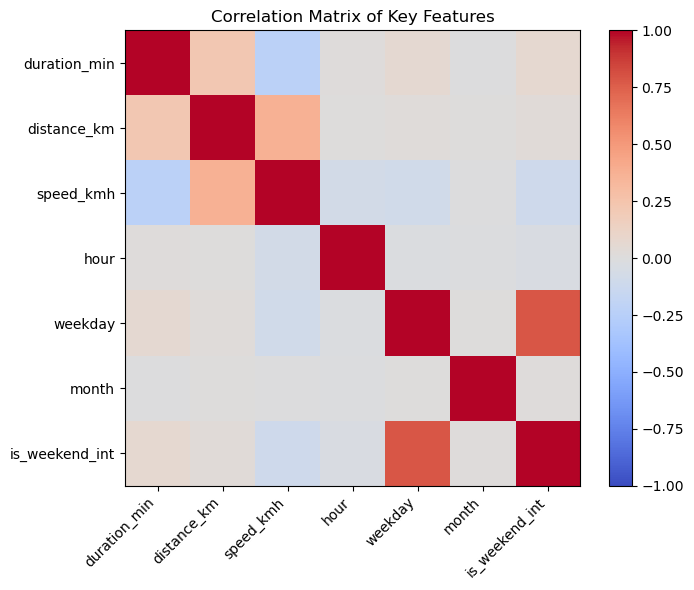

In [16]:
# ============================
# STEP 3.1: CORRELATION MATRIX
#  - duration_min
#  - distance_km
#  - speed_kmh
#  - hour
#  - weekday
#  - month
#  - is_weekend (as 0/1)
# ============================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 3.1.1 Ensure required columns exist
required_cols = ["duration_min", "distance_km", "speed_kmh", "hour", "weekday", "month"]

missing = [c for c in required_cols if c not in df.columns]
if missing:
    raise KeyError(f"Missing required columns for correlation: {missing}")

# Make sure is_weekend exists and is numeric
if "is_weekend" not in df.columns:
    logger.info("'is_weekend' not found; creating (Sat/Sun as weekend).")
    df["weekday"] = df["weekday"].astype(int)
    df["is_weekend"] = df["weekday"].isin([5, 6])

df["is_weekend_int"] = df["is_weekend"].astype(int)

# 3.1.2 Select features for correlation
corr_features = [
    "duration_min",
    "distance_km",
    "speed_kmh",
    "hour",
    "weekday",
    "month",
    "is_weekend_int",
]

corr_df = df[corr_features].copy()

# Optionally drop rows with any NA in these columns (should be rare)
corr_df = corr_df.dropna()

logger.info(f"Computing correlation matrix on {len(corr_df)} rows.")

# 3.1.3 Compute Pearson correlation matrix
corr_matrix = corr_df.corr(method="pearson")

print("=== CORRELATION MATRIX (PEARSON) ===")
display(corr_matrix)

# 3.1.4 Plot heatmap with matplotlib
plt.figure(figsize=(8, 6))
im = plt.imshow(corr_matrix.values, cmap="coolwarm", vmin=-1, vmax=1)

plt.colorbar(im, fraction=0.046, pad=0.04)
plt.xticks(ticks=np.arange(len(corr_features)), labels=corr_features, rotation=45, ha="right")
plt.yticks(ticks=np.arange(len(corr_features)), labels=corr_features)

plt.title("Correlation Matrix of Key Features")
plt.tight_layout()
plt.show()


## 3.2 Duration vs hour plots, split by: - member vs casual - classic vs electric


### 1) Member vs Casual Riders

**Casual Riders (blue):**
* Much longer trips at every hour
* Night/early morning (0-3h): ~17-18 min
* Early morning (4-6h): dips slightly (still longer than members)
* Big spike at 10-12h: ~25-26 min average (mid-day leisure/tourist rides)
* Evening (16-20h): still long (19-21 min), then gradually drops

**Members (orange):**
* Very flat and short: ~11-13 min across the day
* Slight bumps at 9-10h and 16-18h (commute times)
* Classic commuter/regular-use behavior

**Key Takeaway:** Rider type strongly predicts duration; casual riders and members have fundamentally different trip intentions.

---

### 2) Classic vs Electric Bikes and Scooters

**Classic Bikes (blue):**
* Longest trips overall: ~19-24 min
* Very long at night (0-3h, >21 min)
* Elevated during mid-day and early evening
* Slower, more "effortful" rides

**Electric Bikes (orange):**
* Shorter than classic: ~9-14 min
* Shortest in early morning, peaks at 10-15h (~13-14 min)
* More convenient/faster, similar usage but shorter time

**Electric Scooters (green):**
* Shortest durations (~7-12 min), rising during day
* Used for very quick hops

**Key Takeaway:** Vehicle type encodes trip intent:
* Classic = longer, possibly leisure/fitness
* Electric/scooter = quicker, convenience-focused

---

### Why This Supports "Shared Intent"

Duration co-varies with:
* Rider type (member vs casual)
* Vehicle type (classic vs electric/scooter)
* Hour of day (commute vs leisure)

A shared latent "trip intent" learned from these contextual factors provides meaningful joint signal for:
* Duration prediction
* Destination modeling
* Rider type classification
* Anomaly detection

=== DURATION VS HOUR BY MEMBER TYPE ===


,hour,member_casual,avg_duration_min,median_duration_min,trip_count
0,0,casual,17.602791,9.179633,35371
2,1,casual,17.576677,9.411117,23727
4,2,casual,16.945467,8.895400,14765
6,3,casual,18.002738,8.645283,8250
8,4,casual,15.151712,7.467058,6596


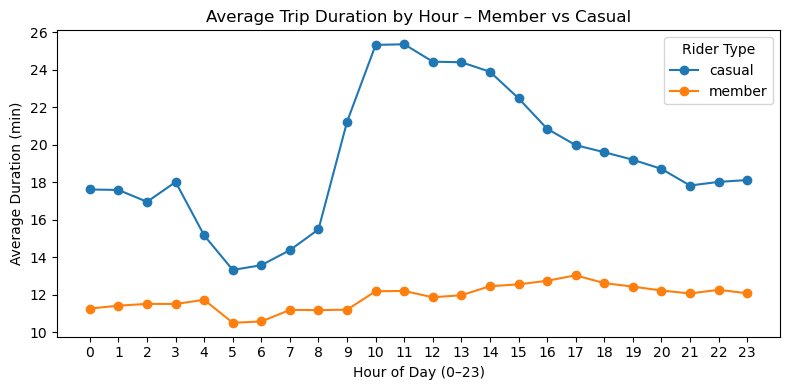


=== DURATION VS HOUR BY BIKE TYPE ===


,hour,rideable_type,avg_duration_min,median_duration_min,trip_count
0,0,classic_bike,21.234338,10.615942,23502
3,1,classic_bike,21.316072,10.323133,14930
5,2,classic_bike,22.346014,10.248533,8233
7,3,classic_bike,23.736935,10.190267,4540
9,4,classic_bike,19.393390,8.727500,4726


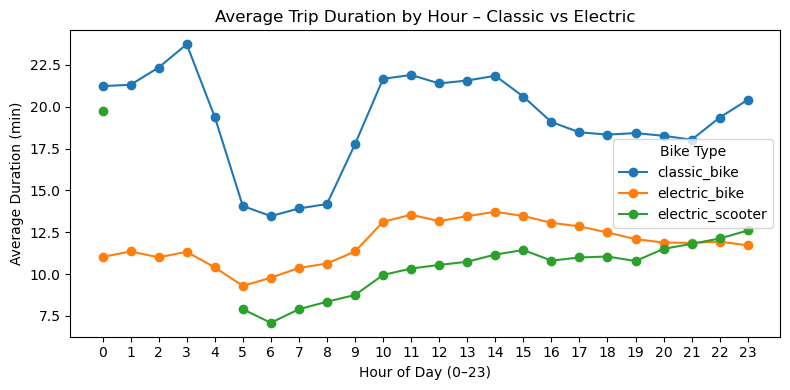

In [17]:
# ============================
# STEP 3.2: DURATION VS HOUR
#   - split by member vs casual
#   - split by classic vs electric
# ============================

import matplotlib.pyplot as plt
import pandas as pd

# Sanity checks
for col in ["duration_min", "hour", "member_casual", "rideable_type"]:
    if col not in df.columns:
        raise KeyError(f"Required column '{col}' not found in df.")

# 3.2.1 Duration vs hour by MEMBER TYPE
member_hour_agg = (
    df.groupby(["hour", "member_casual"])
    .agg(
        avg_duration_min=("duration_min", "mean"),
        median_duration_min=("duration_min", "median"),
        trip_count=("ride_id", "count"),
    )
    .reset_index()
    .sort_values(["member_casual", "hour"])
)

print("=== DURATION VS HOUR BY MEMBER TYPE ===")
display(member_hour_agg.head())

# Pivot for plotting (average duration)
member_pivot = member_hour_agg.pivot(
    index="hour", columns="member_casual", values="avg_duration_min"
)

plt.figure(figsize=(8, 4))
for col in member_pivot.columns:
    plt.plot(member_pivot.index, member_pivot[col], marker="o", label=str(col))

plt.xlabel("Hour of Day (0–23)")
plt.ylabel("Average Duration (min)")
plt.title("Average Trip Duration by Hour – Member vs Casual")
plt.xticks(range(0, 24))
plt.legend(title="Rider Type")
plt.tight_layout()
plt.show()


# 3.2.2 Duration vs hour by BIKE TYPE
bike_hour_agg = (
    df.groupby(["hour", "rideable_type"])
    .agg(
        avg_duration_min=("duration_min", "mean"),
        median_duration_min=("duration_min", "median"),
        trip_count=("ride_id", "count"),
    )
    .reset_index()
    .sort_values(["rideable_type", "hour"])
)

print("\n=== DURATION VS HOUR BY BIKE TYPE ===")
display(bike_hour_agg.head())

bike_pivot = bike_hour_agg.pivot(
    index="hour", columns="rideable_type", values="avg_duration_min"
)

plt.figure(figsize=(8, 4))
for col in bike_pivot.columns:
    plt.plot(bike_pivot.index, bike_pivot[col], marker="o", label=str(col))

plt.xlabel("Hour of Day (0–23)")
plt.ylabel("Average Duration (min)")
plt.title("Average Trip Duration by Hour – Classic vs Electric")
plt.xticks(range(0, 24))
plt.legend(title="Bike Type")
plt.tight_layout()
plt.show()


## 3.3 Distance vs hour plots, split by bike type.

### 1) Relative Distances by Bike Type

**Electric Bikes (orange):**
* Always the longest distance at any hour
* Mostly 2.2-2.45 km
* Peak distances during early morning (6-8h) and late afternoon (15-17h)

**Classic Bikes (blue):**
* Middle band: 1.8-2.1 km
* Distances grow during day, peak around commute/late afternoon (16-17h)

**Electric Scooters (green):**
* Shortest: about 1.3-1.6 km
* Used for very short hops
* Small bump around commute/afternoon, but still well below bikes

**Key Pattern:** Vehicle choice encodes trip length: scooters < classic < e-bikes

---

### 2) Daily Distance Patterns

* All three types show distance bumps during commute hours (morning and especially afternoon)
* Midday distances only slightly shorter, rising again late afternoon

---

### 3) Model Implications

* `rideable_type` is a strong predictor of distance
* Combined with `hour`, helps infer trip intent:
  * e-bike + commute hour → longer, purposeful trips
  * scooter + late night → short, convenience hops
* Reinforces multi-task approach: same latent "intent" influences:
  * Bike type selection
  * Departure time
  * Distance
  * Duration
  * Likely destination

=== DISTANCE VS HOUR BY BIKE TYPE ===


,hour,rideable_type,avg_distance_km,median_distance_km,trip_count
0,0,classic_bike,1.765298,1.349439,23502
3,1,classic_bike,1.708677,1.296296,14930
5,2,classic_bike,1.711033,1.267493,8233
7,3,classic_bike,1.727944,1.306174,4540
9,4,classic_bike,1.963577,1.238958,4726


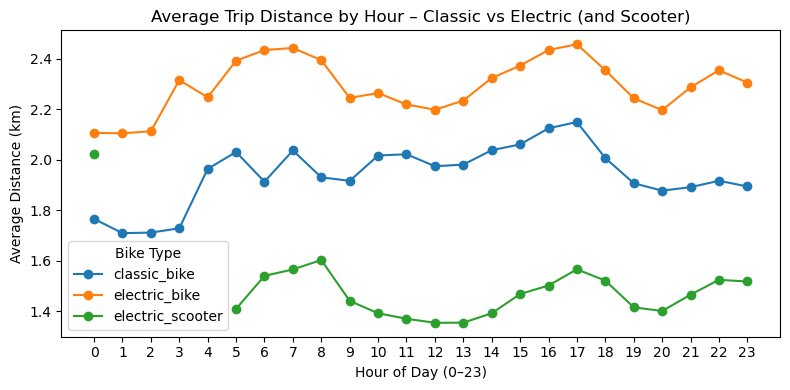

In [18]:
# ============================
# STEP 3.3: DISTANCE VS HOUR
#   - split by bike type (rideable_type)
# ============================

import matplotlib.pyplot as plt
import pandas as pd

# Sanity checks
for col in ["distance_km", "hour", "rideable_type"]:
    if col not in df.columns:
        raise KeyError(f"Required column '{col}' not found in df.")

# 3.3.1 Distance vs hour by BIKE TYPE
dist_bike_hour_agg = (
    df.groupby(["hour", "rideable_type"])
    .agg(
        avg_distance_km=("distance_km", "mean"),
        median_distance_km=("distance_km", "median"),
        trip_count=("ride_id", "count"),
    )
    .reset_index()
    .sort_values(["rideable_type", "hour"])
)

print("=== DISTANCE VS HOUR BY BIKE TYPE ===")
display(dist_bike_hour_agg.head())

# Pivot for plotting average distance vs hour
dist_bike_pivot = dist_bike_hour_agg.pivot(
    index="hour", columns="rideable_type", values="avg_distance_km"
)

plt.figure(figsize=(8, 4))
for col in dist_bike_pivot.columns:
    plt.plot(dist_bike_pivot.index, dist_bike_pivot[col], marker="o", label=str(col))

plt.xlabel("Hour of Day (0–23)")
plt.ylabel("Average Distance (km)")
plt.title("Average Trip Distance by Hour – Classic vs Electric (and Scooter)")
plt.xticks(range(0, 24))
plt.legend(title="Bike Type")
plt.tight_layout()
plt.show()


## 3.4 Trip counts and distributions (duration, distance) by rider type (member_casual).

### 1. Trip Counts
* **Members:** 3,618,583 rides (63.1%)
* **Casual:** 2,114,350 rides (36.9%)
* System is member-dominated, but casual riders represent a significant portion

---

### 2. Duration by Rider Type
* **Casual:**
  * Average: 20.85 min
  * Median: 12.0 min
* **Member:**
  * Average: 12.13 min
  * Median: 8.69 min
* Both groups show right-skewed distribution with long tail
* Casual curve shifted farther right → longer trips overall
* Member curve compressed toward shorter durations

**Interpretation:** Casual = leisure/tourist/slow rides; Member = commute/regular quick trips

---

### 3. Distance by Rider Type
* **Casual:**
  * Average: 2.12 km
  * Median: 1.59 km
* **Member:**
  * Average: 2.18 km
  * Median: 1.58 km
* Distance distributions are very similar
* Key behavioral difference is time, not distance:
  * Casual riders take more time to cover similar distance (more stops, slower pace)

---

### 4. Model Implications
* `member_casual` is strong signal for duration but weak signal for distance
* Perfect pattern for multi-task model:
  * Same latent "trip intent" predicts rider type and duration
  * Helps predict trip length even when distance is similar

=== TRIP COUNTS BY RIDER TYPE ===


,member_casual,trip_count,trip_pct
0,casual,2114350,36.880773
1,member,3618583,63.119227


2025-11-08 12:02:05,435 | INFO | eda_step1 | Rider type counts: [{'member_casual': 'casual', 'trip_count': 2114350, 'trip_pct': 36.880772895828365}, {'member_casual': 'member', 'trip_count': 3618583, 'trip_pct': 63.119227104171635}]



=== SUMMARY STATS BY RIDER TYPE ===


,member_casual,avg_duration_min,median_duration_min,avg_distance_km,median_distance_km
0,casual,20.847190,12.0000,2.117243,1.593453
1,member,12.128745,8.6888,2.184243,1.578242


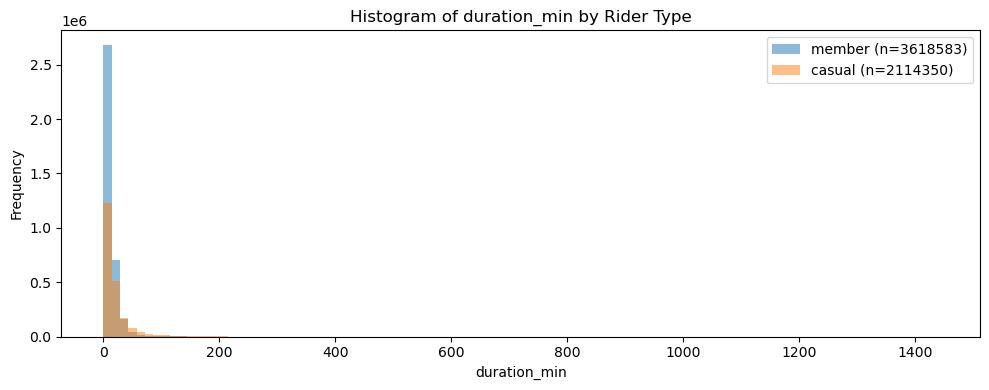

C:\Users\bnsev\AppData\Local\Temp\ipykernel_69664\2202260136.py:79: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_to_plot, labels=df["member_casual"].unique(), showfliers=True)


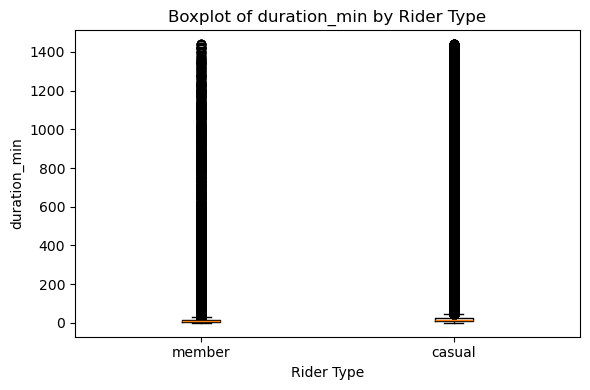

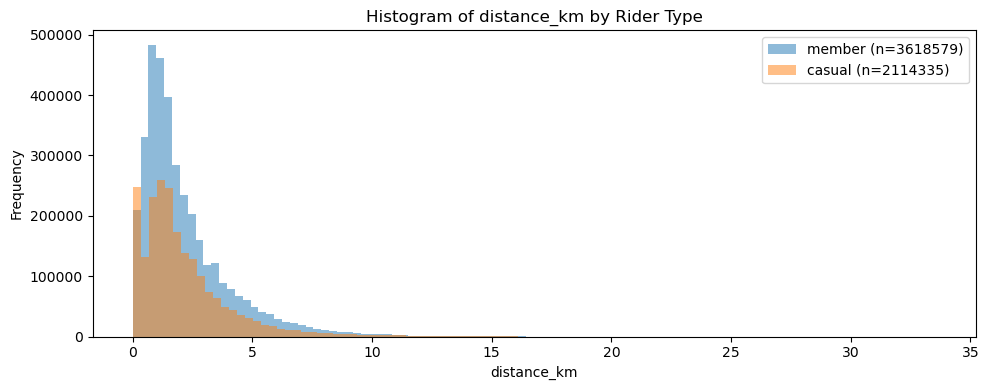

C:\Users\bnsev\AppData\Local\Temp\ipykernel_69664\2202260136.py:79: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_to_plot, labels=df["member_casual"].unique(), showfliers=True)


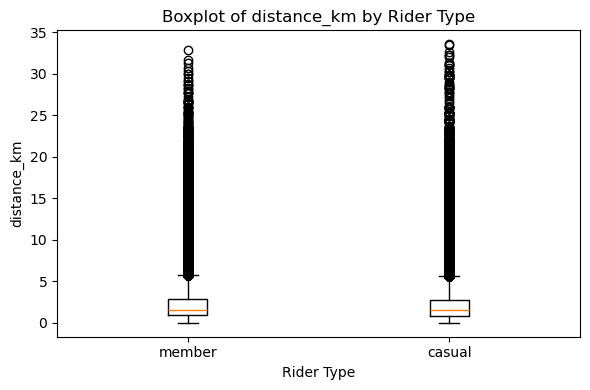

In [19]:
# ============================
# STEP 3.4: RIDER TYPE ANALYSIS
#   - Trip counts by member_casual
#   - Duration & distance distributions per rider type
# ============================

import matplotlib.pyplot as plt
import pandas as pd

# 3.4.1 Trip counts by rider type
if "member_casual" not in df.columns:
    raise KeyError("Column 'member_casual' not found in df.")

count_col = "ride_id" if "ride_id" in df.columns else df.columns[0]

rider_counts = (
    df.groupby("member_casual")[count_col]
    .count()
    .rename("trip_count")
    .reset_index()
)

total_trips = rider_counts["trip_count"].sum()
rider_counts["trip_pct"] = 100 * rider_counts["trip_count"] / total_trips

print("=== TRIP COUNTS BY RIDER TYPE ===")
display(rider_counts)

logger.info(
    "Rider type counts: %s",
    rider_counts.to_dict(orient="records")
)

# 3.4.2 Summary stats for duration & distance by rider type
summary = (
    df.groupby("member_casual")
    .agg(
        avg_duration_min=("duration_min", "mean"),
        median_duration_min=("duration_min", "median"),
        avg_distance_km=("distance_km", "mean"),
        median_distance_km=("distance_km", "median"),
    )
    .reset_index()
)

print("\n=== SUMMARY STATS BY RIDER TYPE ===")
display(summary)

# 3.4.3 Histograms & boxplots for each rider type
features = ["duration_min", "distance_km"]

for feat in features:
    if feat not in df.columns:
        logger.warning(f"Column '{feat}' not found; skipping.")
        continue

    plt.figure(figsize=(10, 4))
    for i, rider in enumerate(df["member_casual"].unique()):
        subset = df.loc[df["member_casual"] == rider, feat].dropna()
        plt.hist(
            subset,
            bins=100,
            alpha=0.5,
            label=f"{rider} (n={len(subset)})",
        )
    plt.xlabel(feat)
    plt.ylabel("Frequency")
    plt.title(f"Histogram of {feat} by Rider Type")
    plt.legend()
    plt.tight_layout()
    plt.show()

    # Boxplot
    plt.figure(figsize=(6, 4))
    data_to_plot = [
        df.loc[df["member_casual"] == rider, feat].dropna()
        for rider in df["member_casual"].unique()
    ]
    plt.boxplot(data_to_plot, labels=df["member_casual"].unique(), showfliers=True)
    plt.xlabel("Rider Type")
    plt.ylabel(feat)
    plt.title(f"Boxplot of {feat} by Rider Type")
    plt.tight_layout()
    plt.show()


## 3.5 Trip counts and distributions by bike type (rideable_type).

### 1. Usage Volumes
* **Classic bikes:** 2,568,026 trips (44.8%)
* **Electric bikes:** 3,022,787 trips (52.7%)
* **Electric scooters:** ~142k trips (small share)
* System is now electric-bike dominated, with classic bikes still significant

---

### 2. Duration by Bike Type
* **Classic bike:**
  * Average: 19.1 min
  * Median: 11.2 min
  * Longest trips overall with fat right tail
* **Electric bike:**
  * Average: 12.4 min
  * Median: 8.8 min
  * Shorter in time than classic but still substantial
* **Electric scooter:**
  * Average: 10.6 min
  * Median: 7.6 min
  * Shortest duration with compact distribution

**Interpretation:** Classic = longer/slower rides; e-bikes/scooters = quicker hops

---

### 3. Distance by Bike Type
* **Classic bike:** avg 2.00 km, median 1.46 km
* **Electric bike:** avg 2.33 km, median 1.73 km
* **Electric scooter:** avg 1.47 km, median 1.18 km

**Key Patterns:**
* Electric bikes go farthest on average
* Classic bikes are medium distance
* Scooters are shortest
* E-bikes: longer distance but shorter time → higher effective speed
* Classics: shorter distance but longer time → leisure/effortful rides
* Scooters: short & quick hops

---

### 4. Model Implications
* `rideable_type` clearly encodes trip intent:
  * e-bike → "go farther, faster"
  * classic → "ride longer, maybe enjoy/exercise"
  * scooter → "short convenience trips"
* Same latent intent influences:
  * Destination choice
  * Rider type preference
  * Anomaly risk
* Perfect for shared encoder approach in multi-task model

=== TRIP COUNTS BY BIKE TYPE ===


,rideable_type,trip_count,trip_pct
0,classic_bike,2568026,44.794279
1,electric_bike,3022787,52.726711
2,electric_scooter,142120,2.479010


2025-11-08 12:02:12,477 | INFO | eda_step1 | Bike type counts: [{'rideable_type': 'classic_bike', 'trip_count': 2568026, 'trip_pct': 44.79427894936152}, {'rideable_type': 'electric_bike', 'trip_count': 3022787, 'trip_pct': 52.72671074300013}, {'rideable_type': 'electric_scooter', 'trip_count': 142120, 'trip_pct': 2.4790103076383416}]



=== SUMMARY STATS BY BIKE TYPE ===


,rideable_type,avg_duration_min,median_duration_min,avg_distance_km,median_distance_km
0,classic_bike,19.074885,11.211475,2.002489,1.457819
1,electric_bike,12.398640,8.791850,2.325403,1.726451
2,electric_scooter,10.581756,7.605392,1.469275,1.176632


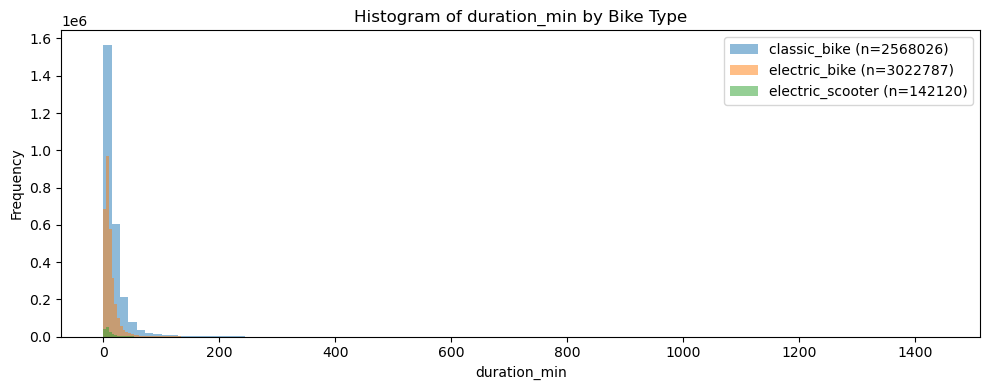

C:\Users\bnsev\AppData\Local\Temp\ipykernel_69664\87798794.py:80: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_to_plot, labels=df["rideable_type"].unique(), showfliers=True)


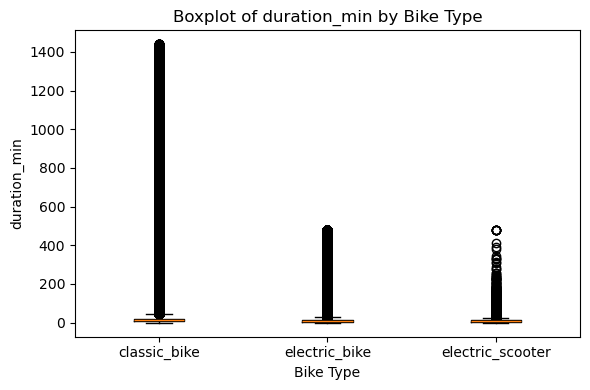

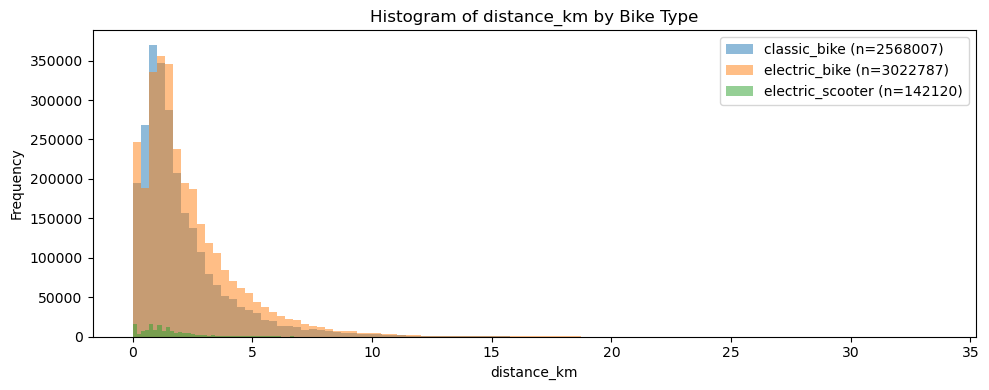

C:\Users\bnsev\AppData\Local\Temp\ipykernel_69664\87798794.py:80: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_to_plot, labels=df["rideable_type"].unique(), showfliers=True)


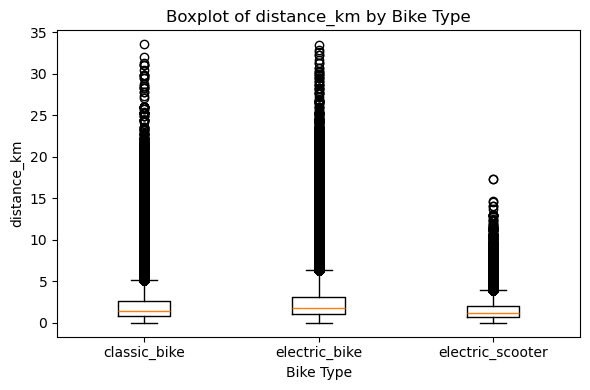

In [20]:
# ============================
# STEP 3.5: BIKE TYPE ANALYSIS
#   - Trip counts by rideable_type
#   - Duration & distance distributions per bike type
# ============================

import matplotlib.pyplot as plt
import pandas as pd

# 3.5.1 Trip counts by bike type
if "rideable_type" not in df.columns:
    raise KeyError("Column 'rideable_type' not found in df.")

count_col = "ride_id" if "ride_id" in df.columns else df.columns[0]

bike_counts = (
    df.groupby("rideable_type")[count_col]
    .count()
    .rename("trip_count")
    .reset_index()
)

total_trips = bike_counts["trip_count"].sum()
bike_counts["trip_pct"] = 100 * bike_counts["trip_count"] / total_trips

print("=== TRIP COUNTS BY BIKE TYPE ===")
display(bike_counts)

logger.info(
    "Bike type counts: %s",
    bike_counts.to_dict(orient='records')
)

# 3.5.2 Summary stats for duration & distance by bike type
bike_summary = (
    df.groupby("rideable_type")
    .agg(
        avg_duration_min=("duration_min", "mean"),
        median_duration_min=("duration_min", "median"),
        avg_distance_km=("distance_km", "mean"),
        median_distance_km=("distance_km", "median"),
    )
    .reset_index()
)

print("\n=== SUMMARY STATS BY BIKE TYPE ===")
display(bike_summary)

# 3.5.3 Histograms & boxplots for each bike type
features = ["duration_min", "distance_km"]

for feat in features:
    if feat not in df.columns:
        logger.warning(f"Column '{feat}' not found; skipping.")
        continue

    # Histogram
    plt.figure(figsize=(10, 4))
    for bike in df["rideable_type"].unique():
        subset = df.loc[df["rideable_type"] == bike, feat].dropna()
        plt.hist(
            subset,
            bins=100,
            alpha=0.5,
            label=f"{bike} (n={len(subset)})",
        )
    plt.xlabel(feat)
    plt.ylabel("Frequency")
    plt.title(f"Histogram of {feat} by Bike Type")
    plt.legend()
    plt.tight_layout()
    plt.show()

    # Boxplot
    plt.figure(figsize=(6, 4))
    data_to_plot = [
        df.loc[df["rideable_type"] == bike, feat].dropna()
        for bike in df["rideable_type"].unique()
    ]
    plt.boxplot(data_to_plot, labels=df["rideable_type"].unique(), showfliers=True)
    plt.xlabel("Bike Type")
    plt.ylabel(feat)
    plt.title(f"Boxplot of {feat} by Bike Type")
    plt.tight_layout()
    plt.show()


## 3.6 For top N start stations: - share of members vs casual - mean duration and distance


### 1. Station User Types

**Tourist/Leisure Hubs (Casual-Heavy):**
* Streeter Dr & Grand Ave – 77.5% casual
* DuSable Lake Shore Dr & Monroe St – 77.7% casual
* Millennium Park – 68.5% casual
* Michigan Ave & Oak St – 63.6% casual
* Shedd Aquarium – 81.5% casual
* Dusable Harbor – 73.4% casual
* Theater on the Lake – 57.0% casual
→ All lakefront/museum/tourist locations

**Commuter Hubs (Member-Heavy):**
* Clinton St & Washington Blvd – 79.6% member
* Clinton St & Jackson Blvd – 76.4% member
* Clinton St & Madison St – 74.8% member
* Kingsbury St & Kinzie St – 74.6% member
* State St & Chicago Ave – 70.5% member
* Dearborn St & Erie St – 69.9% member
* Clark St & Elm St – 69.5% member
→ Downtown/transit-adjacent workday stations

**Key Pattern:** Top stations clearly split into tourist leisure vs daily commute

---

### 2. Duration & Distance Patterns

**Tourist/Leisure Lakefront Stations:**
* Streeter Dr & Grand Ave: 31.8 min, 2.45 km
* Millennium Park: 31.3 min, 2.12 km
* Michigan Ave & Oak St: 30.3 min, 2.69 km
* Dusable Harbor: 30.3 min, 2.32 km
* Theater on the Lake: 25.9 min, 2.90 km
→ Long trips (25-32 min) and ~2-3 km distances (slow, scenic rides)

**Commuter Downtown Stations:**
* Clinton & Madison: 12.9 min, 1.83 km
* Clinton & Jackson: 13.1 min, 2.00 km
* Clinton & Washington: 11.8 min, 2.02 km
* Kingsbury & Kinzie: 10.0 min, 1.60 km
* State & Chicago: 12.5 min, 1.73 km
→ Shorter trips (~10-13 min) with ~1.6-2 km (quick, direct commutes)

---

### 3. Project Implications

* Station ID/zone is highly informative about:
  * Rider type mix
  * Typical duration
  * Distance patterns
* Shared latent "trip intent" should incorporate start_station embedding:
  * Some stations predict "tourist long ride" behavior
  * Others predict "short commuter hop" behavior
* For fairness analysis:
  * Can check if commuter-heavy zones get better availability
  * Compare with tourist/leisure zones
  * Evaluate how reallocations change risk profiles

In [21]:
# ============================
# STEP 3.6: TOP N START STATIONS
#   - member vs casual share
#   - mean duration & distance
# ============================

import pandas as pd

TOP_N = 20  # change if you want more/less

# Sanity checks
for col in ["start_station_id", "start_station_name", "member_casual",
            "duration_min", "distance_km"]:
    if col not in df.columns:
        raise KeyError(f"Required column '{col}' not found in df.")

# 3.6.1 Filter out rows with missing start station
df_st = df.dropna(subset=["start_station_id"])

# 3.6.2 Find top N start stations by trip count
count_col = "ride_id" if "ride_id" in df_st.columns else df_st.columns[0]

station_counts = (
    df_st.groupby(["start_station_id", "start_station_name"])[count_col]
    .count()
    .rename("trip_count")
    .reset_index()
    .sort_values("trip_count", ascending=False)
)

top_stations = station_counts.head(TOP_N)
top_ids = top_stations["start_station_id"].tolist()

print(f"=== TOP {TOP_N} START STATIONS BY TRIP COUNT ===")
display(top_stations)

# 3.6.3 Member vs casual share for these stations
station_rider = (
    df_st[df_st["start_station_id"].isin(top_ids)]
    .groupby(["start_station_id", "start_station_name", "member_casual"])[count_col]
    .count()
    .rename("trip_count")
    .reset_index()
)

# Compute shares within each station
station_rider["station_total"] = station_rider.groupby(
    ["start_station_id", "start_station_name"]
)["trip_count"].transform("sum")

station_rider["trip_pct"] = 100 * station_rider["trip_count"] / station_rider["station_total"]

print(f"\n=== MEMBER VS CASUAL SHARE FOR TOP {TOP_N} START STATIONS ===")
station_rider_pivot = station_rider.pivot_table(
    index=["start_station_id", "start_station_name"],
    columns="member_casual",
    values="trip_pct",
    fill_value=0,
)
station_rider_pivot = station_rider_pivot.rename_axis(None, axis=1)  # cleaner columns
display(station_rider_pivot)

# 3.6.4 Mean duration & distance for these stations
station_stats = (
    df_st[df_st["start_station_id"].isin(top_ids)]
    .groupby(["start_station_id", "start_station_name"])
    .agg(
        avg_duration_min=("duration_min", "mean"),
        avg_distance_km=("distance_km", "mean")
    )
    .reset_index()
)

print(f"\n=== MEAN DURATION & DISTANCE FOR TOP {TOP_N} START STATIONS ===")
display(station_stats)


=== TOP 20 START STATIONS BY TRIP COUNT ===


,start_station_id,start_station_name,trip_count
368,13022,Streeter Dr & Grand Ave,64576
479,13300,DuSable Lake Shore Dr & Monroe St,43006
1750,KA1503000043,Kingsbury St & Kinzie St,40273
1833,LF-005,DuSable Lake Shore Dr & North Blvd,38941
375,13042,Michigan Ave & Oak St,38861
1901,TA1307000039,Clark St & Elm St,35110
2016,WL-012,Clinton St & Washington Blvd,33158
362,13008,Millennium Park,32288
1872,TA1305000032,Clinton St & Madison St,31923
1970,TA1308000050,Wells St & Concord Ln,31479



=== MEMBER VS CASUAL SHARE FOR TOP 20 START STATIONS ===


,,casual,member
start_station_id,start_station_name,,
13008,Millennium Park,68.517716,31.482284
13022,Streeter Dr & Grand Ave,77.536546,22.463454
13042,Michigan Ave & Oak St,63.572734,36.427266
13045,Dearborn St & Erie St,30.120482,69.879518
13300,DuSable Lake Shore Dr & Monroe St,77.689160,22.310840
13341,Canal St & Madison St,26.709033,73.290967
15544,Shedd Aquarium,81.531874,18.468126
21544,State St & Chicago Ave,29.511473,70.488527
638,Clinton St & Jackson Blvd,23.636643,76.363357



=== MEAN DURATION & DISTANCE FOR TOP 20 START STATIONS ===


,start_station_id,start_station_name,avg_duration_min,avg_distance_km
0,13008,Millennium Park,31.255821,2.115500
1,13022,Streeter Dr & Grand Ave,31.824497,2.451051
2,13042,Michigan Ave & Oak St,30.282297,2.693312
3,13045,Dearborn St & Erie St,15.943476,1.724737
4,13300,DuSable Lake Shore Dr & Monroe St,31.451384,2.154340
5,13341,Canal St & Madison St,13.169860,2.000720
6,15544,Shedd Aquarium,27.288409,2.349541
7,21544,State St & Chicago Ave,12.510620,1.731001
8,638,Clinton St & Jackson Blvd,13.052824,1.996502
9,638,Public Rack - Ewing Ave & Indianapolis Ave,9.248351,2.544327


# 4. Station Demand Time Series (For Trajectory Models)

## 4.1 For all stations combined: plot total departures per hour of day (weekday vs weekend).


### Weekday vs Weekend Hourly Demand

**Weekdays (blue):**
* Night (0-4h): Very low departures, near zero by 3-4h
* Sharp morning commute peak:
  * Rises fast from 5-7h
  * Local peak around 8h (work/school start)
* Midday plateau:
  * 11-14h: Relatively flat but high (~200k+ trips)
* Huge evening commute peak:
  * 16-18h: Global maximum at 17h (massive demand)
  * Decays through 19-23h

**Weekends (orange):**
* No sharp early spike
* Slow build from 7-11h
* Broad midday/afternoon hump (11-16h), then gentle decline
* Evening (17-21h) active but never reaches weekday peak levels

---

### Model Implications

* Weekday demand is strongly bimodal (commute AM + PM)
* Weekend demand is single-humped and shifted later (late morning → afternoon leisure)
* Station trajectory model should:
  * Condition on `is_weekend` and `hour`
  * Expect very different shapes for weekday vs weekend sequences
  * Treat 7-9h and 16-18h on weekdays as critical high-risk windows for:
    * Stock-outs
    * Full stations
    * Fairness and risk calculations

=== HOURLY DEPARTURES BY DAY TYPE ===


,hour,is_weekend,trip_count,day_type
0,0,False,31544,Weekday
1,0,True,35948,Weekend
2,1,False,17761,Weekday
3,1,True,25719,Weekend
4,2,False,10353,Weekday


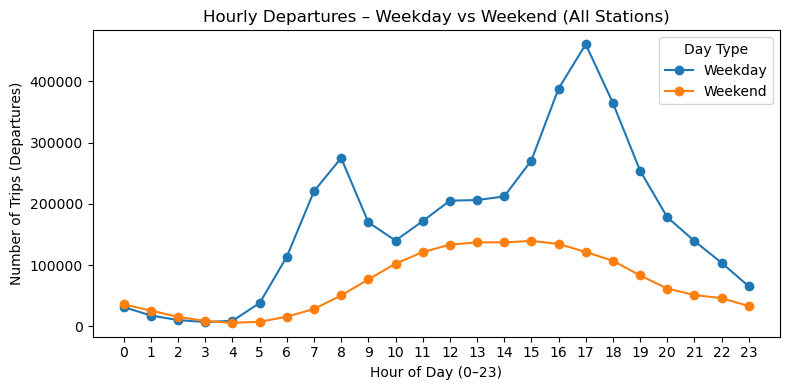

In [22]:
# ============================
# STEP 4.1: HOURLY DEPARTURES
#   All stations combined
#   Split by weekday vs weekend
# ============================

import pandas as pd
import matplotlib.pyplot as plt

# Ensure 'started_at', 'hour', 'weekday', 'is_weekend' exist
if "started_at" not in df.columns:
    raise KeyError("'started_at' column not found in df.")

df["started_at"] = pd.to_datetime(df["started_at"])

if "hour" not in df.columns:
    logger.info("'hour' column not found; deriving from 'started_at'.")
    df["hour"] = df["started_at"].dt.hour

if "weekday" not in df.columns:
    logger.info("'weekday' column not found; deriving from 'started_at'.")
    df["weekday"] = df["started_at"].dt.weekday  # 0=Mon, 6=Sun

if "is_weekend" not in df.columns:
    logger.info("'is_weekend' column not found; creating (Sat/Sun as weekend).")
    df["is_weekend"] = df["weekday"].isin([5, 6])

count_col = "ride_id" if "ride_id" in df.columns else df.columns[0]

# 4.1.1 Aggregate departures per hour & weekend flag
hour_weekend_counts = (
    df.groupby(["hour", "is_weekend"])[count_col]
    .count()
    .rename("trip_count")
    .reset_index()
)

# Add labels
hour_weekend_counts["day_type"] = hour_weekend_counts["is_weekend"].map(
    {False: "Weekday", True: "Weekend"}
)

print("=== HOURLY DEPARTURES BY DAY TYPE ===")
display(hour_weekend_counts.head())

# 4.1.2 Pivot for plotting
pivot_hw = hour_weekend_counts.pivot(
    index="hour", columns="day_type", values="trip_count"
).sort_index()

# 4.1.3 Line plot
plt.figure(figsize=(8, 4))
for col in pivot_hw.columns:
    plt.plot(pivot_hw.index, pivot_hw[col], marker="o", label=col)

plt.xlabel("Hour of Day (0–23)")
plt.ylabel("Number of Trips (Departures)")
plt.title("Hourly Departures – Weekday vs Weekend (All Stations)")
plt.xticks(range(0, 24))
plt.legend(title="Day Type")
plt.tight_layout()
plt.show()


## 4.2 For top K busy stations: hourly departures over a typical day (weekday vs weekend).


### Station Demand Patterns by Type

**Lakefront/Tourist Stations**
("Streeter Dr & Grand Ave", "DuSable Lake Shore Dr & Monroe St", "DuSable Lake Shore Dr & North Blvd", "Michigan Ave & Oak St")

* **Weekdays:**
  * Slow ramp from ~7-10h
  * Big midday/afternoon peak (~11-16h)
  * Busy into early evening, no sharp bimodal pattern
* **Weekends:**
  * Similar shape but flatter and shifted later
  * No sharp rush-hour spikes
  * Pure tourist/leisure usage pattern

**Downtown/Commuter Stations**
("Kingsbury St & Kinzie St", "Clark St & Elm St")

* **Weekdays:**
  * Clear AM peak (7-9h)
  * Strong PM peak (16-18h)
  * Classic two-hump commute profile
* **Weekends:**
  * Lower volume overall
  * Single broad hump in late morning/afternoon

---

### Model Implications

* Stations naturally cluster into commuter vs leisure/tourist profiles
* Station trajectory model should:
  * Condition on station identity/embedding to learn different shapes
  * Use weekday vs weekend as key covariate (curves differ significantly)
* For fairness/counterfactual analysis:
  * Commuter-heavy vs tourist-heavy stations have different risk profiles
  * These patterns provide structure for equity evaluations

=== TOP 6 BUSY START STATIONS ===


,start_station_id,start_station_name,trip_count
368,13022,Streeter Dr & Grand Ave,64576
479,13300,DuSable Lake Shore Dr & Monroe St,43006
1750,KA1503000043,Kingsbury St & Kinzie St,40273
1833,LF-005,DuSable Lake Shore Dr & North Blvd,38941
375,13042,Michigan Ave & Oak St,38861
1901,TA1307000039,Clark St & Elm St,35110



=== SAMPLE OF HOURLY COUNTS (TOP STATIONS) ===


,start_station_id,start_station_name,hour,is_weekend,trip_count,day_type
0,13022,Streeter Dr & Grand Ave,0,False,99,Weekday
1,13022,Streeter Dr & Grand Ave,0,True,121,Weekend
2,13022,Streeter Dr & Grand Ave,1,False,48,Weekday
3,13022,Streeter Dr & Grand Ave,1,True,53,Weekend
4,13022,Streeter Dr & Grand Ave,2,False,20,Weekday


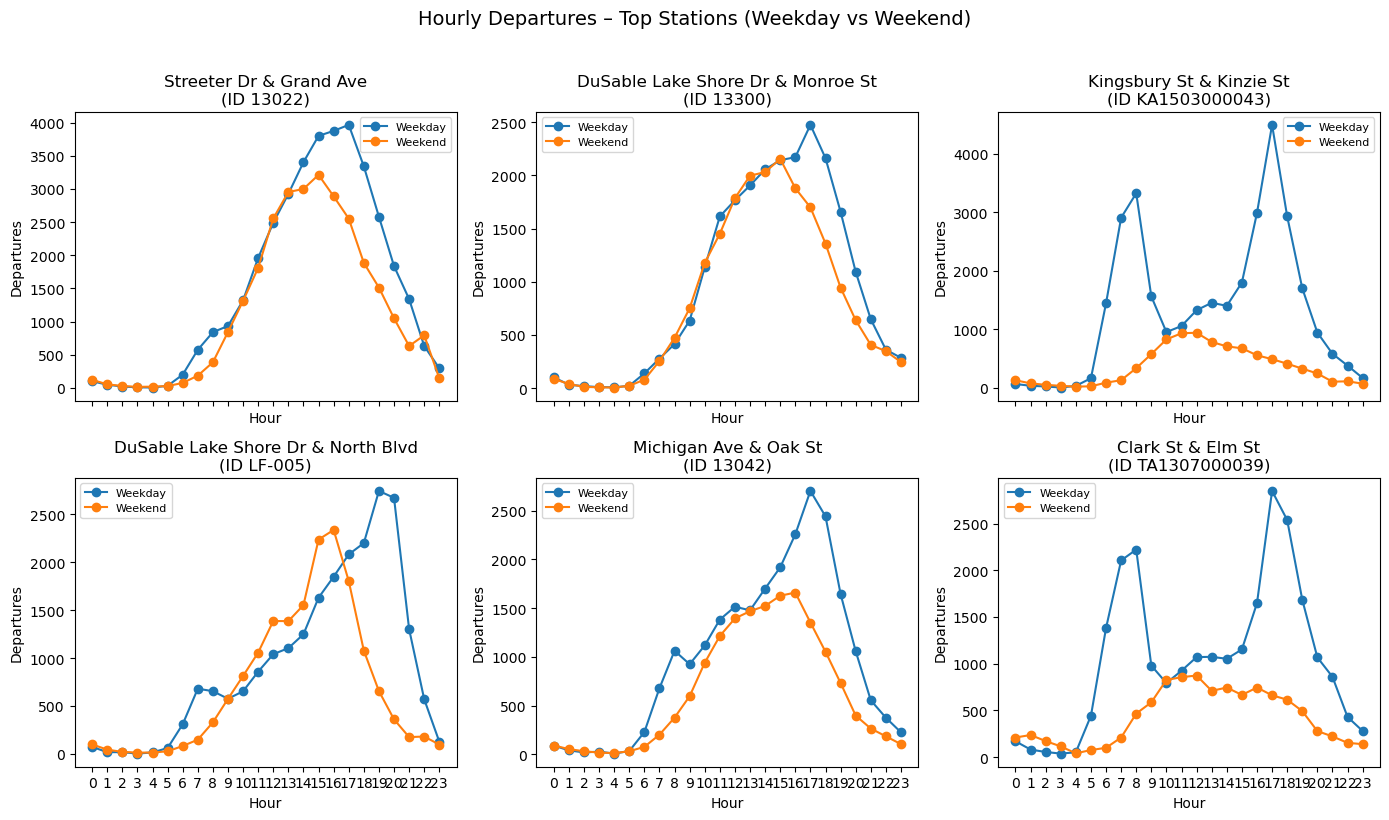

In [23]:
# ============================
# STEP 4.2: HOURLY DEPARTURES
#   Top K busy stations
#   Weekday vs Weekend
# ============================

import pandas as pd
import matplotlib.pyplot as plt
import math

TOP_K = 6  # change this to see more/less stations

# Sanity checks
for col in ["start_station_id", "start_station_name", "started_at"]:
    if col not in df.columns:
        raise KeyError(f"Required column '{col}' not found in df.")

df["started_at"] = pd.to_datetime(df["started_at"])

if "hour" not in df.columns:
    df["hour"] = df["started_at"].dt.hour

if "weekday" not in df.columns:
    df["weekday"] = df["started_at"].dt.weekday  # 0=Mon, 6=Sun

if "is_weekend" not in df.columns:
    df["is_weekend"] = df["weekday"].isin([5, 6])

# Use only rows with a known start station
df_st = df.dropna(subset=["start_station_id"])

count_col = "ride_id" if "ride_id" in df_st.columns else df_st.columns[0]

# 4.2.1 Find top K busy start stations by total trips
station_counts = (
    df_st.groupby(["start_station_id", "start_station_name"])[count_col]
    .count()
    .rename("trip_count")
    .reset_index()
    .sort_values("trip_count", ascending=False)
)

top_stations = station_counts.head(TOP_K)
top_ids = top_stations["start_station_id"].tolist()

print(f"=== TOP {TOP_K} BUSY START STATIONS ===")
display(top_stations)

# 4.2.2 Aggregate hourly departures by station and weekend flag
hour_station = (
    df_st[df_st["start_station_id"].isin(top_ids)]
    .groupby(["start_station_id", "start_station_name", "hour", "is_weekend"])[count_col]
    .count()
    .rename("trip_count")
    .reset_index()
)

hour_station["day_type"] = hour_station["is_weekend"].map(
    {False: "Weekday", True: "Weekend"}
)

print("\n=== SAMPLE OF HOURLY COUNTS (TOP STATIONS) ===")
display(hour_station.head())

# 4.2.3 Plot: one small chart per station
n_rows = math.ceil(TOP_K / 3)
n_cols = 3

fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, 4 * n_rows), sharex=True, sharey=False)
axes = axes.flatten()

for idx, (station_id, station_name) in enumerate(
    zip(top_stations["start_station_id"], top_stations["start_station_name"])
):
    ax = axes[idx]
    sub = hour_station[hour_station["start_station_id"] == station_id]

    # pivot to hour x day_type
    pivot = sub.pivot(index="hour", columns="day_type", values="trip_count").fillna(0)
    pivot = pivot.sort_index()

    for col in pivot.columns:
        ax.plot(pivot.index, pivot[col], marker="o", label=col)

    ax.set_title(f"{station_name}\n(ID {station_id})")
    ax.set_xlabel("Hour")
    ax.set_ylabel("Departures")
    ax.set_xticks(range(0, 24))
    ax.legend(fontsize=8)

# Hide any unused subplots
for j in range(idx + 1, len(axes)):
    fig.delaxes(axes[j])

fig.suptitle("Hourly Departures – Top Stations (Weekday vs Weekend)", y=1.02, fontsize=14)
plt.tight_layout()
plt.show()


## 4.3 Compute per-station stats: -mean hourly departures -variance of hourly departures


In [24]:
# ============================
# STEP 4.3: PER-STATION HOURLY STATS
#   - mean hourly departures
#   - variance of hourly departures
# ============================

import pandas as pd

# Need started_at and start_station_id
for col in ["started_at", "start_station_id", "start_station_name"]:
    if col not in df.columns:
        raise KeyError(f"Required column '{col}' not found in df.")

df["started_at"] = pd.to_datetime(df["started_at"])

# Drop rows with missing station
df_st = df.dropna(subset=["start_station_id"]).copy()

count_col = "ride_id" if "ride_id" in df_st.columns else df_st.columns[0]

# 4.3.1 Build hourly time index per station
# floor timestamps to hour (e.g., 2024-05-01 08:37 -> 2024-05-01 08:00)
df_st["ts_hour"] = df_st["started_at"].dt.floor("H")

# Count departures per (station, hour timestamp)
hourly_counts = (
    df_st.groupby(["start_station_id", "start_station_name", "ts_hour"])[count_col]
    .count()
    .rename("departures")
    .reset_index()
)

print("=== SAMPLE OF HOURLY DEPARTURE COUNTS ===")
display(hourly_counts.head())

# 4.3.2 For each station, compute mean and variance of hourly departures
station_hour_stats = (
    hourly_counts.groupby(["start_station_id", "start_station_name"])["departures"]
    .agg(
        mean_hourly_departures="mean",
        var_hourly_departures="var",   # sample variance
        max_hourly_departures="max",
        min_hourly_departures="min",
        num_hours_observed="count",
    )
    .reset_index()
)

print("\n=== PER-STATION HOURLY STATS (FIRST 20) ===")
display(station_hour_stats.head(20))

# Optional: sort by busiest / most volatile stations
station_hour_stats_sorted = station_hour_stats.sort_values(
    "mean_hourly_departures", ascending=False
)

print("\n=== TOP 20 STATIONS BY MEAN HOURLY DEPARTURES ===")
display(station_hour_stats_sorted.head(20))


C:\Users\bnsev\AppData\Local\Temp\ipykernel_69664\1345394617.py:23: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_st["ts_hour"] = df_st["started_at"].dt.floor("H")


=== SAMPLE OF HOURLY DEPARTURE COUNTS ===


,start_station_id,start_station_name,ts_hour,departures
0,24321,Oconto Ave & Belmont Ave,2024-06-30 15:00:00,1
1,24321,Oconto Ave & Belmont Ave,2024-07-06 17:00:00,1
2,24321,Oconto Ave & Belmont Ave,2024-08-15 03:00:00,1
3,24321,Oconto Ave & Belmont Ave,2024-08-21 09:00:00,1
4,24321,Oconto Ave & Belmont Ave,2024-08-24 11:00:00,1



=== PER-STATION HOURLY STATS (FIRST 20) ===


,start_station_id,start_station_name,mean_hourly_departures,var_hourly_departures,max_hourly_departures,min_hourly_departures,num_hours_observed
0,24321,Oconto Ave & Belmont Ave,1.000000,0.000000,1,1,44
1,021320,MTV Hubbard St,1.309524,0.316492,3,1,42
2,1011,Public Rack - Fullerton Ave & Narragansett Ave,1.050000,0.048718,2,1,40
3,1012,Public Rack - Langley Ave & 49th St,1.058480,0.078913,3,1,171
4,1013,Public Rack - Pulaski Rd & Lake St,1.130435,0.118577,2,1,23
5,1014,Public Rack - Richmond St & Thorndale Ave,1.125000,0.125000,2,1,8
6,1015,Public Rack - Peterson Ave & Drake Ave,1.000000,0.000000,1,1,30
7,1016,Public Rack - Peterson Ave & Bernard Ave,1.000000,0.000000,1,1,4
8,1017,Public Rack - Foster Ave & Drake Ave,1.000000,0.000000,1,1,5
9,1018,Public Rack - Kostner Ave & Wrightwood Ave,1.222222,0.194444,2,1,9



=== TOP 20 STATIONS BY MEAN HOURLY DEPARTURES ===


,start_station_id,start_station_name,mean_hourly_departures,var_hourly_departures,max_hourly_departures,min_hourly_departures,num_hours_observed
368,13022,Streeter Dr & Grand Ave,13.006244,230.911524,124,1,4965
479,13300,DuSable Lake Shore Dr & Monroe St,9.877354,116.630946,75,1,4354
1833,LF-005,DuSable Lake Shore Dr & North Blvd,8.699955,133.525819,129,1,4476
375,13042,Michigan Ave & Oak St,8.025816,74.481672,71,1,4842
1946,TA1308000001,Theater on the Lake,7.191558,79.012259,141,1,4004
522,15544,Shedd Aquarium,7.019382,59.102462,71,1,3560
2016,WL-012,Clinton St & Washington Blvd,6.903602,63.945932,56,1,4803
1750,KA1503000043,Kingsbury St & Kinzie St,6.521943,33.564752,44,1,6175
362,13008,Millennium Park,6.458892,45.019468,42,1,4999
1762,KA1503000064,Dusable Harbor,6.208448,41.564039,48,1,4001


## 4.4 Identify: - busiest stations (top by trips) - quietest but still active stations


### Station Activity Levels

**Busiest Stations (Top by Trips):**

* **Lakefront/Tourist Magnets:**
  * Streeter Dr & Grand Ave
  * Millennium Park
  * Michigan Ave & Oak St
  * Theater on the Lake
  * Shedd Aquarium
  * Dusable Harbor
  * DuSable Lake Shore Dr & Monroe/North Blvd
  * Characteristics: High volume, casual-heavy, long trips

* **Downtown Commuter Hubs:**
  * Clinton & Washington/Madison/Jackson
  * Kingsbury & Kinzie
  * State & Chicago
  * Wells & Elm/Concord
  * Clark & Elm
  * Wabash & Grand
  * Indiana & Roosevelt
  * Characteristics: High volume, member-heavy, short trips

**Quietest but Active Stations:**

* **Characteristics:**
  * Mean hourly departures ≈ 1
  * Only 24-88 hours observed across the year
  * Names like "Oconto Ave & Belmont Ave", "MLK Dr & 87th St", many Public Rack sites
  * Located in peripheral/lower-demand areas (south/west-side neighborhoods)
  * Still active but with sparse usage

---

### Project Implications

* **Forecasting has two distinct regimes:**
  * High-volume, stable stations (downtown/lakefront) with rich time series
  * Low-volume, data-poor stations requiring uncertainty modeling and pooling

* **Fairness & Access Considerations:**
  * Many quiet stations are in less central neighborhoods
  * These are prime candidates for equity analysis:
    * "How much extra stock or redistribution would reduce denial risk gaps between busy downtown hubs and under-served outer stations?"
  * Critical to ensure trajectory and capacity models perform well across both station types

In [25]:
# ============================
# STEP 4.4: BUSIEST VS QUIETEST STATIONS
#   - busiest stations (by total trips)
#   - quietest but still active (smallest mean hourly departures)
# ============================

import pandas as pd

TOP_K = 20  # how many to show

for col in ["started_at", "start_station_id", "start_station_name"]:
    if col not in df.columns:
        raise KeyError(f"Required column '{col}' not found in df.")

df["started_at"] = pd.to_datetime(df["started_at"])
df_st = df.dropna(subset=["start_station_id"]).copy()
count_col = "ride_id" if "ride_id" in df_st.columns else df_st.columns[0]

# 4.4.1 Total trips per station  (busiest)
station_totals = (
    df_st.groupby(["start_station_id", "start_station_name"])[count_col]
    .count()
    .rename("trip_count")
    .reset_index()
)

busiest = station_totals.sort_values("trip_count", ascending=False).head(TOP_K)
print(f"=== TOP {TOP_K} BUSIEST STATIONS BY TOTAL TRIPS ===")
display(busiest)

# 4.4.2 Mean hourly departures per station (quietest but active)

# floor to hour
df_st["ts_hour"] = df_st["started_at"].dt.floor("H")

hourly_counts = (
    df_st.groupby(["start_station_id", "start_station_name", "ts_hour"])[count_col]
    .count()
    .rename("departures")
    .reset_index()
)

station_hour_stats = (
    hourly_counts.groupby(["start_station_id", "start_station_name"])["departures"]
    .agg(mean_hourly_departures="mean", num_hours_observed="count")
    .reset_index()
)

# keep only stations that appear in at least a few hours (e.g., > 24) to avoid ultra-rare artifacts
min_hours = 24
active_stations = station_hour_stats[station_hour_stats["num_hours_observed"] >= min_hours]

quietest = active_stations.sort_values("mean_hourly_departures", ascending=True).head(TOP_K)

print(f"\n=== TOP {TOP_K} QUIETEST (BUT ACTIVE) STATIONS ===")
display(quietest)


=== TOP 20 BUSIEST STATIONS BY TOTAL TRIPS ===


,start_station_id,start_station_name,trip_count
368,13022,Streeter Dr & Grand Ave,64576
479,13300,DuSable Lake Shore Dr & Monroe St,43006
1750,KA1503000043,Kingsbury St & Kinzie St,40273
1833,LF-005,DuSable Lake Shore Dr & North Blvd,38941
375,13042,Michigan Ave & Oak St,38861
1901,TA1307000039,Clark St & Elm St,35110
2016,WL-012,Clinton St & Washington Blvd,33158
362,13008,Millennium Park,32288
1872,TA1305000032,Clinton St & Madison St,31923
1970,TA1308000050,Wells St & Concord Ln,31479


C:\Users\bnsev\AppData\Local\Temp\ipykernel_69664\2916283321.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_st["ts_hour"] = df_st["started_at"].dt.floor("H")



=== TOP 20 QUIETEST (BUT ACTIVE) STATIONS ===


,start_station_id,start_station_name,mean_hourly_departures,num_hours_observed
0,24321,Oconto Ave & Belmont Ave,1.0,44
933,24379,Martin Luther King Dr & 87th St,1.0,25
913,24347,Hamilton Park,1.0,39
1211,554,Damen Ave & 51st St,1.0,38
635,20134,Maryland Ave & 104th St,1.0,28
1187,537,Kenton Ave & Madison St,1.0,51
573,16913,Cicero Ave & Quincy St,1.0,50
679,20244,Halsted St & 73rd St,1.0,33
1270,588,South Chicago Ave & 83rd St,1.0,27
874,24220,Homan Ave & Arthington Ave,1.0,24


# 5. Spatial & Zone-Level Patterns

## 5.1 Scatter plot of start_lat vs start_lng (and similarly for end).


### Geographic Distribution Analysis

**Geographic Footprint:**
* Points cluster around lat ~41.7-42.1, lng ~-87.85 to -87.55
* Covers Chicago core plus some outlying neighborhoods
* Forms diagonal band SW↔NE, matching city's shape and transit corridors

**Spatial Patterns:**
* **Strong downtown/lakefront core:**
  * Very dense blob around (~41.89, -87.63): Loop/River North/Streeterville
  * Dense streak along lakefront (tourist/leisure stations)
* **Outlying coverage:**
  * Sparser points extend south/southwest and northwest
  * Represents suburban/neighborhood docks and public racks
  * Low density at edges (matches quiet stations from earlier analysis)

**Starts vs Ends:**
* Start and end plots look very similar
* Indicates bikes mostly circulate within same spatial footprint
* Small density differences reveal inflow/outflow imbalances

---

### Project Implications

* **Spatial features (lat/lng or station zones) are crucial**
* Clear central "high-intent" region with lower-demand periphery
* Perfect structure for:
  * Zone clustering
  * Spatial fairness analysis
  * Identifying service gaps between core and peripheral areas
* Geographic patterns will be key for:
  * Station trajectory modeling
  * Capacity planning
  * Equity-focused redistribution strategies

Start points plotted: 200000
End points plotted:   200000


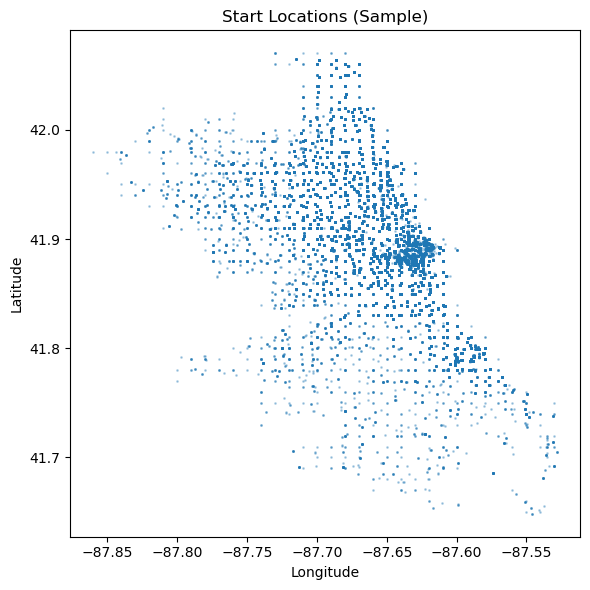

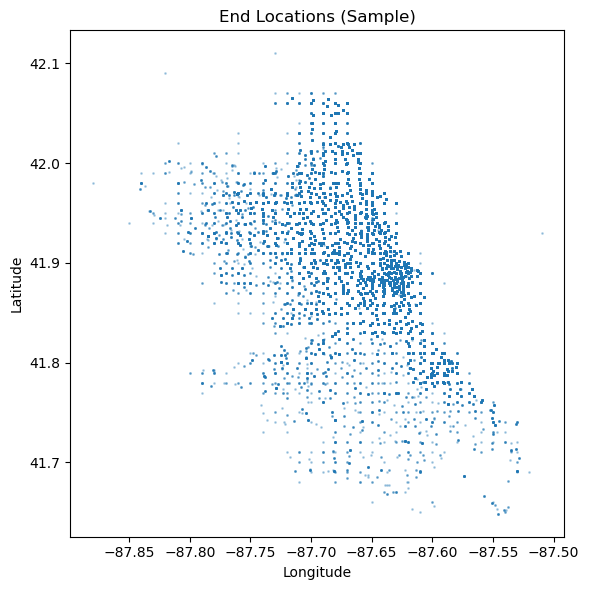

In [26]:
# ============================
# STEP 5.1: SPATIAL SCATTER PLOTS
#   - start_lat vs start_lng
#   - end_lat vs end_lng
# ============================

import matplotlib.pyplot as plt
import numpy as np

# Sanity checks
for col in ["start_lat", "start_lng", "end_lat", "end_lng"]:
    if col not in df.columns:
        raise KeyError(f"Required column '{col}' not found in df.")

# To keep the plot readable, sample points (e.g., 200k)
MAX_POINTS = 200_000

def sample_points(lat_col, lng_col, max_points=MAX_POINTS):
    sub = df[[lat_col, lng_col]].dropna()
    if len(sub) > max_points:
        sub = sub.sample(n=max_points, random_state=42)
    return sub

start_sample = sample_points("start_lat", "start_lng")
end_sample   = sample_points("end_lat", "end_lng")

print(f"Start points plotted: {len(start_sample)}")
print(f"End points plotted:   {len(end_sample)}")

# 5.1.1 Start locations
plt.figure(figsize=(6, 6))
plt.scatter(
    start_sample["start_lng"],
    start_sample["start_lat"],
    s=1,
    alpha=0.3,
)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Start Locations (Sample)")
plt.tight_layout()
plt.show()

# 5.1.2 End locations
plt.figure(figsize=(6, 6))
plt.scatter(
    end_sample["end_lng"],
    end_sample["end_lat"],
    s=1,
    alpha=0.3,
)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("End Locations (Sample)")
plt.tight_layout()
plt.show()


## 5.2 Cluster stations into zones (e.g., k-means).

### Zone Cluster Analysis

**Zone Summary (10 clusters):**
* **Zone 0 (41.88, -87.64):** Dense downtown/Loop-River North core (main commuter + tourist hub)
* **Zone 8 (41.93, -87.67):** North-side dense corridor (Lakeview/Lincoln Park area)
* **Zone 1 (41.99, -87.70) & Zone 6 (41.97, -87.79):** Further north and northwest neighborhoods
* **Zone 5 (41.86, -87.71) & Zone 9 (41.92, -87.75):** West-side corridors
* **Zone 7 (41.79, -87.63):** South-side near lake (Bronzeville/mid-south)
* **Zone 2 (41.78, -87.73):** Deeper southwest/south-central neighborhoods
* **Zone 4 (41.72, -87.57):** Far south lakefront (South Shore area)
* **Zone 3 (41.71, -87.66):** Far south inland

---

### Project Applications

Now that `start_zone` and `end_zone` are available:

**1. Data Analysis:**
* Aggregate demand, duration, and member/casual mix by zone
* Compare usage patterns across geographic areas
* Identify zone-specific trip characteristics

**2. Model Features:**
* Use `zone_id` as input feature in multi-task model
* Capture geographic effects on trip behavior
* Improve predictions with spatial context

**3. Fairness Evaluation:**
* Compute denial risk per zone
* Monitor stock levels across zones
* Identify service gaps between core and peripheral areas
* Support equity-focused redistribution strategies

Unique start stations used for clustering: 1916


c:\Users\bnsev\anaconda3\envs\cyclistic-ml-2024\lib\site-packages\threadpoolctl.py:1226: RuntimeWarning: 
Found Intel OpenMP ('libiomp') and LLVM OpenMP ('libomp') loaded at
the same time. Both libraries are known to be incompatible and this
can cause random crashes or deadlocks on Linux when loaded in the
same Python program.
Using threadpoolctl may cause crashes or deadlocks. For more
information and possible workarounds, please see
    https://github.com/joblib/threadpoolctl/blob/master/multiple_openmp.md

  warnings.warn(msg, RuntimeWarning)
c:\Users\bnsev\anaconda3\envs\cyclistic-ml-2024\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(
2025-11-08 12:02:42,870 | INFO | eda_step1 | K-means fitted with 10 zones.



=== STATION COUNTS PER ZONE ===


,num_stations
zone_id,
0,206
1,182
2,234
3,200
4,147
5,173
6,213
7,189
8,191



=== ZONE CENTERS (LAT/LNG) ===


,center_lat,center_lng,zone_id
0,41.880071,-87.638257,0
1,41.990091,-87.704428,1
2,41.783114,-87.725248,2
3,41.710931,-87.655113,3
4,41.724910,-87.569380,4
5,41.863929,-87.706731,5
6,41.974924,-87.785500,6
7,41.794027,-87.626802,7
8,41.934623,-87.667640,8
9,41.920360,-87.753844,9


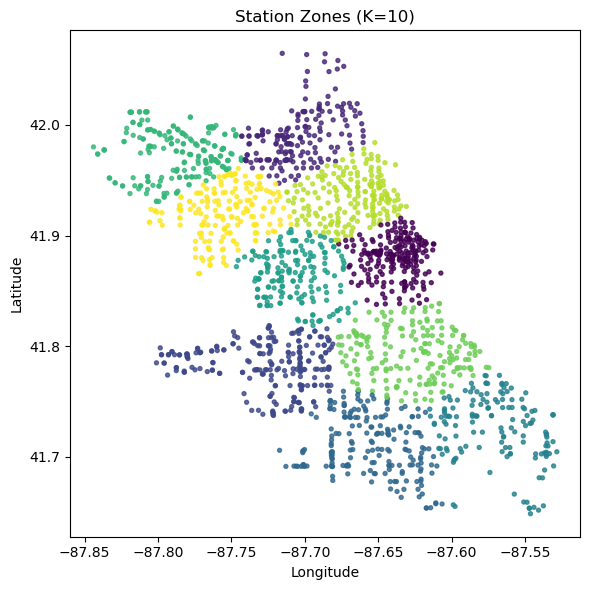


Added 'start_zone' (and 'end_zone' if possible) to df.


In [27]:
# ============================
# STEP 5.2: SPATIAL ZONES VIA K-MEANS
#   - cluster stations into K zones
#   - add start_zone / end_zone to df
# ============================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Choose number of zones
K_ZONES = 10  # you can change this (e.g., 8, 12, 15)

# 5.2.1 Build station-level table with coordinates
# We'll use start station coordinates (stations are fixed in space)
required_cols = ["start_station_id", "start_station_name", "start_lat", "start_lng"]
for c in required_cols:
    if c not in df.columns:
        raise KeyError(f"Missing column {c} needed for clustering.")

stations = (
    df[required_cols]
    .dropna(subset=["start_station_id", "start_lat", "start_lng"])
    .drop_duplicates(subset=["start_station_id"])
    .reset_index(drop=True)
)

print(f"Unique start stations used for clustering: {len(stations)}")

X = stations[["start_lat", "start_lng"]].values

# 5.2.2 Fit k-means
kmeans = KMeans(n_clusters=K_ZONES, random_state=42, n_init=10)
stations["zone_id"] = kmeans.fit_predict(X)

logger.info("K-means fitted with %d zones.", K_ZONES)

# 5.2.3 Inspect zones: counts and centers
zone_counts = stations["zone_id"].value_counts().sort_index()
print("\n=== STATION COUNTS PER ZONE ===")
display(zone_counts.to_frame("num_stations"))

centers = pd.DataFrame(
    kmeans.cluster_centers_,
    columns=["center_lat", "center_lng"]
)
centers["zone_id"] = centers.index
print("\n=== ZONE CENTERS (LAT/LNG) ===")
display(centers)

# 5.2.4 Plot stations colored by zone
plt.figure(figsize=(6, 6))
scatter = plt.scatter(
    stations["start_lng"],
    stations["start_lat"],
    c=stations["zone_id"],
    s=8,
    alpha=0.8,
)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title(f"Station Zones (K={K_ZONES})")
plt.tight_layout()
plt.show()

# 5.2.5 Attach zone_id back to full trip dataframe as start_zone
zone_map = stations.set_index("start_station_id")["zone_id"]

df["start_zone"] = df["start_station_id"].map(zone_map)

# Optional: end_zone as well (if end_station_id / coords exist)
if "end_station_id" in df.columns:
    df["end_zone"] = df["end_station_id"].map(zone_map)

print("\nAdded 'start_zone' (and 'end_zone' if possible) to df.")


## 5.3 For each zone:
•	total trips
•	trips per station
•	member vs casual share
•	average duration & distance


### Zone-by-Zone Analysis

**Big Picture:**
* **Zone 0 (downtown core):** 2.54M trips (46% of zoned trips), 12.3k trips/station
  * Member-leaning (62%), avg duration 16.6 min, distance ~2.0 km
* **Zone 8 (north side dense corridor):** 1.46M trips, 7.6k trips/station
  * Member-leaning (65%), shorter time (15.4 min) but longer distance (2.39 km)

**Mid Volume Zones:**
* **Zone 7 (mid-south near lake):** 280k trips, 1.48k/station
  * Strongly member (72%), shortest median duration (6.37 min) and distance (1.02 km)
* **Zone 1 (farther north/NW):** 194k trips, 1.07k/station
  * Member-leaning (64%), longer distance (2.52 km) and time (17.2 min)

**Low Volume/Sparse Zones:**
* **Zone 5 (west side):** 96.5k trips, 558/station
  * Member-leaning (68%), longer distances (2.54 km)
* **Zone 9 (west-northwest):** 44.5k trips, 246/station
  * Most casual-heavy (41% casual), longest avg distance (2.88 km) and duration (18.35 min)
* **Zones 2, 3, 4, 6 (south/southwest/far south):** Very low volume (8.7k-10.4k trips each)
  * Zone 2: Casual-dominant (62%), short medians (duration 8.9 min, distance 1.29 km)
  * Zone 4: Casual-heavy (51%), very long avg duration (28.0 min) but short median distance (1.29 km)
  * Zones 3 & 6: Mixed, longer durations (avg 21.0 and 18.5 min)

---

### Project Implications

**Demand Modeling:**
* Use `zone_id` as strong predictor (zones 0 & 8 carry most weight)
* For low-volume zones (2/3/4/6), rely on global pooling + uncertainty estimates

**Duration & Distance Modeling:**
* Zones show distinct regimes:
  * Zone 8: longer distance at similar/shorter time (faster corridors)
  * Zone 4: long time but short median distance (slow leisure)
* Shared latent "trip intent" should absorb these zone-based patterns

**Fairness & Access:**
* Compare denial risk between core zones (0/8) and peripheral zones (2/3/4/6)
* Zones 2 & 4 (higher casual share, low volume) are prime for counterfactual equity tests
* Small reallocations for peaks may materially reduce disparity

**Operations:**
* Use trips per station to identify:
  * Capacity constraints (zone 0/8)
  * Under-utilized stations (2/3/4/6)
* Good starting point for stock rebalancing scenarios in Phase 4

In [28]:
# ============================
# STEP 5.3: ZONE-LEVEL STATS
#   For each start_zone:
#     - total trips
#     - trips per station
#     - member vs casual share
#     - average duration & distance
# ============================

import pandas as pd

# Sanity checks
for col in ["start_zone", "start_station_id", "member_casual",
            "duration_min", "distance_km"]:
    if col not in df.columns:
        raise KeyError(f"Missing column '{col}' in df; make sure 5.2 ran.")

count_col = "ride_id" if "ride_id" in df.columns else df.columns[0]

# Work only on rows with a known zone
dfz = df.dropna(subset=["start_zone"]).copy()
dfz["start_zone"] = dfz["start_zone"].astype(int)

# 5.3.1 Total trips per zone
zone_totals = (
    dfz.groupby("start_zone")[count_col]
    .count()
    .rename("total_trips")
    .reset_index()
)

# 5.3.2 Number of stations per zone
zone_station_counts = (
    dfz[["start_zone", "start_station_id"]]
    .dropna()
    .drop_duplicates()
    .groupby("start_zone")["start_station_id"]
    .nunique()
    .rename("num_stations")
    .reset_index()
)

# 5.3.3 Member vs casual share per zone
zone_rider = (
    dfz.groupby(["start_zone", "member_casual"])[count_col]
    .count()
    .rename("trip_count")
    .reset_index()
)

zone_rider["zone_total"] = zone_rider.groupby("start_zone")["trip_count"].transform("sum")
zone_rider["trip_pct"] = 100 * zone_rider["trip_count"] / zone_rider["zone_total"]

zone_rider_pivot = zone_rider.pivot_table(
    index="start_zone",
    columns="member_casual",
    values="trip_pct",
    fill_value=0,
).rename_axis(None, axis=1)  # columns become 'casual', 'member'

# 5.3.4 Average duration & distance per zone
zone_stats = (
    dfz.groupby("start_zone")
    .agg(
        avg_duration_min=("duration_min", "mean"),
        avg_distance_km=("distance_km", "mean"),
        median_duration_min=("duration_min", "median"),
        median_distance_km=("distance_km", "median"),
    )
    .reset_index()
)

# 5.3.5 Combine everything
zone_summary = (
    zone_totals
    .merge(zone_station_counts, on="start_zone", how="left")
    .merge(zone_rider_pivot, on="start_zone", how="left")
    .merge(zone_stats, on="start_zone", how="left")
)

# Compute trips per station
zone_summary["trips_per_station"] = (
    zone_summary["total_trips"] / zone_summary["num_stations"]
)

print("=== ZONE-LEVEL SUMMARY (ONE ROW PER START_ZONE) ===")
display(zone_summary.sort_values("total_trips", ascending=False))


=== ZONE-LEVEL SUMMARY (ONE ROW PER START_ZONE) ===


,start_zone,total_trips,num_stations,casual,member,avg_duration_min,avg_distance_km,median_duration_min,median_distance_km,trips_per_station
0,0,2538453,206,38.209059,61.790941,16.641485,1.990038,10.099900,1.501330,12322.587379
8,8,1455776,191,35.262018,64.737982,15.377597,2.394260,10.281383,1.854060,7621.863874
7,7,279516,189,28.303568,71.696432,14.318712,1.670661,6.372975,1.023857,1478.920635
1,1,194208,182,36.299740,63.700260,17.227674,2.522406,10.616667,1.668651,1067.076923
5,5,96534,173,31.946257,68.053743,15.011206,2.537713,10.661192,2.022506,558.000000
9,9,44486,181,40.884773,59.115227,18.352408,2.878647,12.016667,2.100730,245.779006
4,4,10355,147,51.240946,48.759054,27.956875,2.503295,16.100000,1.286128,70.442177
2,2,10241,234,61.781076,38.218924,16.006945,1.933574,8.896333,1.294444,43.764957
3,3,9196,200,47.194432,52.805568,20.983782,2.089861,10.425917,1.255435,45.980000
6,6,8721,213,48.216948,51.783052,18.471995,2.765545,11.003500,1.745773,40.943662


## 5.4 Compare central vs peripheral zones on:
•	trip volume
•	rider type mix
•	typical duration/distance


### Central vs Peripheral Zone Analysis

**1. Trip Volume:**
* **Central zones (0, 8, 7):** 4,273,745 trips (dominate system usage)
* **Peripheral zones (6, 3, 2):** 28,158 trips (~0.7% of central volume)
* Central zones account for the vast majority of system usage

**2. Rider Type Mix:**
* **Central:** ~34% casual / 66% member
  * Strongly commuter/regular-use pattern
* **Peripheral:** ~52% casual / 48% member
  * More casual than member on average
* Peripheral areas see proportionally more leisure/occasional riders

**3. Trip Characteristics:**
* **Central:**
  * Avg duration: ~15.4 min
  * Avg distance: ~2.02 km
* **Peripheral:**
  * Avg duration: ~18.5 min (about 3 min longer)
  * Avg distance: ~2.26 km (slightly longer)
* Peripheral trips are longer and more likely to be casual

---

### Project Implications

**Forecasting:**
* Central zones carry almost all demand
* Peripheral zones have different behavior patterns:
  * Longer trips
  * More casual riders
  * Higher uncertainty
* Good testbed for probabilistic forecasting models

**Fairness & Equity:**
* Significant gap in access/usage between central and peripheral zones
* Counterfactual scenarios should focus on:
  * Increasing stock in peripheral zones
  * Improving service levels in underserved areas
  * Directly addressing this imbalance

=== FULL ZONE SUMMARY (FOR REFERENCE) ===


,start_zone,total_trips,avg_duration_min,avg_distance_km,median_duration_min,median_distance_km,casual,member
0,0,2538453,16.641485,1.990038,10.099900,1.501330,38.209059,61.790941
8,8,1455776,15.377597,2.394260,10.281383,1.854060,35.262018,64.737982
7,7,279516,14.318712,1.670661,6.372975,1.023857,28.303568,71.696432
1,1,194208,17.227674,2.522406,10.616667,1.668651,36.299740,63.700260
5,5,96534,15.011206,2.537713,10.661192,2.022506,31.946257,68.053743
9,9,44486,18.352408,2.878647,12.016667,2.100730,40.884773,59.115227
4,4,10355,27.956875,2.503295,16.100000,1.286128,51.240946,48.759054
2,2,10241,16.006945,1.933574,8.896333,1.294444,61.781076,38.218924
3,3,9196,20.983782,2.089861,10.425917,1.255435,47.194432,52.805568
6,6,8721,18.471995,2.765545,11.003500,1.745773,48.216948,51.783052



Central zones (top 3 by trips): [0, 8, 7]
Peripheral zones (bottom 3 by trips): [6, 3, 2]

=== CENTRAL VS PERIPHERAL ZONES – COMPARISON ===


,zone_group,total_trips,num_zones,avg_duration_min,avg_distance_km,casual_share,member_share
0,central,4273745,3,15.445931,2.018320,33.924882,66.075118
1,peripheral,28158,3,18.487574,2.262994,52.397485,47.602515


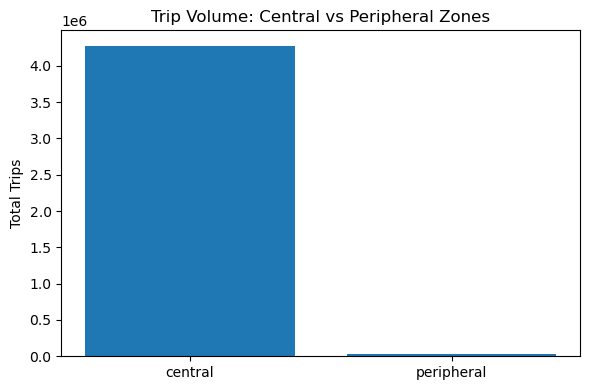

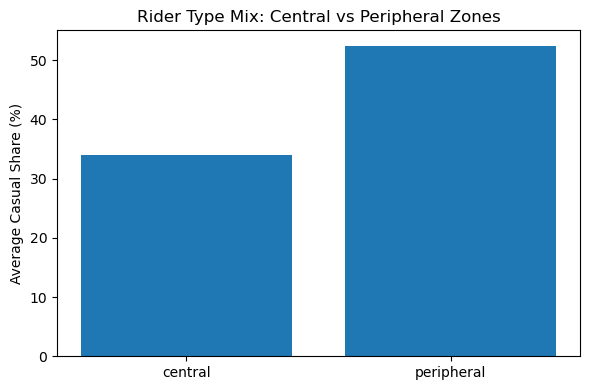

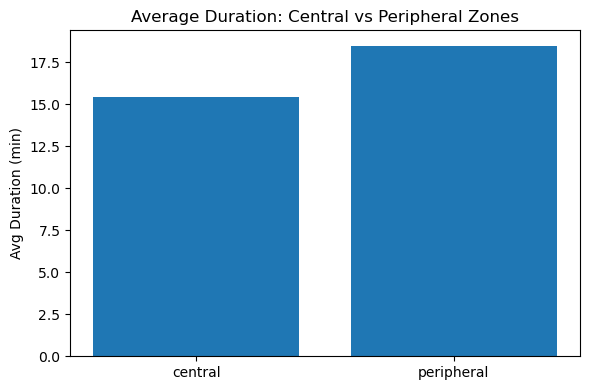

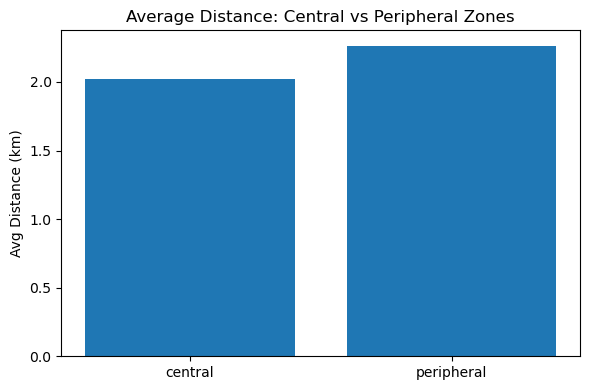

In [29]:
# ============================
# STEP 5.4: CENTRAL VS PERIPHERAL ZONES
#   Compare on:
#     - trip volume
#     - rider type mix
#     - typical duration / distance
# ============================

import pandas as pd
import matplotlib.pyplot as plt

# Sanity checks
for col in ["start_zone", "member_casual", "duration_min", "distance_km"]:
    if col not in df.columns:
        raise KeyError(f"Missing column '{col}' – make sure 5.2/5.3 ran.")

count_col = "ride_id" if "ride_id" in df.columns else df.columns[0]

dfz = df.dropna(subset=["start_zone"]).copy()
dfz["start_zone"] = dfz["start_zone"].astype(int)

# ---------- Rebuild basic zone summary (lightweight) ----------
zone_totals = (
    dfz.groupby("start_zone")[count_col]
    .count()
    .rename("total_trips")
    .reset_index()
)

zone_stats = (
    dfz.groupby("start_zone")
    .agg(
        avg_duration_min=("duration_min", "mean"),
        avg_distance_km=("distance_km", "mean"),
        median_duration_min=("duration_min", "median"),
        median_distance_km=("distance_km", "median"),
    )
    .reset_index()
)

zone_rider = (
    dfz.groupby(["start_zone", "member_casual"])[count_col]
    .count()
    .rename("trip_count")
    .reset_index()
)
zone_rider["zone_total"] = zone_rider.groupby("start_zone")["trip_count"].transform("sum")
zone_rider["trip_pct"] = 100 * zone_rider["trip_count"] / zone_rider["zone_total"]
zone_rider_pivot = zone_rider.pivot_table(
    index="start_zone",
    columns="member_casual",
    values="trip_pct",
    fill_value=0,
).rename_axis(None, axis=1)  # columns = 'casual','member'

zone_summary = (
    zone_totals
    .merge(zone_stats, on="start_zone", how="left")
    .merge(zone_rider_pivot, on="start_zone", how="left")
)

print("=== FULL ZONE SUMMARY (FOR REFERENCE) ===")
display(zone_summary.sort_values("total_trips", ascending=False))

# ---------- Define central vs peripheral ----------
TOP_K = 3  # how many zones to treat as "central" and "peripheral"

central_zones = (
    zone_summary.sort_values("total_trips", ascending=False)
    .head(TOP_K)["start_zone"]
    .tolist()
)
peripheral_zones = (
    zone_summary.sort_values("total_trips", ascending=True)
    .head(TOP_K)["start_zone"]
    .tolist()
)

print(f"\nCentral zones (top {TOP_K} by trips): {central_zones}")
print(f"Peripheral zones (bottom {TOP_K} by trips): {peripheral_zones}")

zone_summary["zone_group"] = zone_summary["start_zone"].apply(
    lambda z: "central" if z in central_zones else ("peripheral" if z in peripheral_zones else "middle")
)

# ---------- Aggregate comparison central vs peripheral ----------
group_summary = (
    zone_summary[zone_summary["zone_group"].isin(["central", "peripheral"])]
    .groupby("zone_group")
    .agg(
        total_trips=("total_trips", "sum"),
        num_zones=("start_zone", "nunique"),
        avg_duration_min=("avg_duration_min", "mean"),
        avg_distance_km=("avg_distance_km", "mean"),
        casual_share=("casual", "mean"),
        member_share=("member", "mean"),
    )
    .reset_index()
)

print("\n=== CENTRAL VS PERIPHERAL ZONES – COMPARISON ===")
display(group_summary)

# ---------- Simple bar plots ----------
# Trip volume
plt.figure(figsize=(6, 4))
plt.bar(group_summary["zone_group"], group_summary["total_trips"])
plt.ylabel("Total Trips")
plt.title("Trip Volume: Central vs Peripheral Zones")
plt.tight_layout()
plt.show()

# Rider type mix (average % casual)
plt.figure(figsize=(6, 4))
plt.bar(group_summary["zone_group"], group_summary["casual_share"])
plt.ylabel("Average Casual Share (%)")
plt.title("Rider Type Mix: Central vs Peripheral Zones")
plt.tight_layout()
plt.show()

# Typical duration
plt.figure(figsize=(6, 4))
plt.bar(group_summary["zone_group"], group_summary["avg_duration_min"])
plt.ylabel("Avg Duration (min)")
plt.title("Average Duration: Central vs Peripheral Zones")
plt.tight_layout()
plt.show()

# Typical distance
plt.figure(figsize=(6, 4))
plt.bar(group_summary["zone_group"], group_summary["avg_distance_km"])
plt.ylabel("Avg Distance (km)")
plt.title("Average Distance: Central vs Peripheral Zones")
plt.tight_layout()
plt.show()


# 6. Proto Service Denial / Equity Signals

## 6.1 For each station and each day (or peak window):
•	departures count
•	arrivals count
•	net inflow = arrivals − departures


### Station Flow Analysis

**1. Example Quiet Station (Oconto Ave & Belmont Ave):**
* Almost all days have 0-1 trips, occasionally 2
* Net inflow typically -1, 0, or +1
* Very low-activity neighborhood station
* Inventory changes slowly with single bikes drifting in/out
* Should be treated as data-sparse with high uncertainty and low system impact

**2. Biggest Positive Net Inflows:**
* Dominated by "DuSable Lake Shore Dr & North Blvd (LF-005)" and similar tourist/downtown spots
* Example: LF-005 on 2024-07-27: 480 departures, 696 arrivals → net inflow +216
* Many days show net inflow of +100 to +216
* These stations accumulate bikes over the day
* Likely popular destinations after long rides (lakefront, beach, parks)
* Risk going full without rebalancing, preventing returns

**3. Biggest Deficits (Negative Net Inflow):**
* Michigan Ave & Oak St on 2025-03-14: 164 departures, 49 arrivals → -115
* Clinton St & Jackson Blvd appears repeatedly with departures but zero arrivals (-70 to -109)
* Dusable Harbor also has large negative days (-100, -94)
* These are strong origin stations steadily draining bikes
* Risk going empty without rebalancing, causing service denial

---

### Project Implications

**Phase 2/3 Applications:**
* Daily station flows support demand forecasting
* Translate into risk of empty/full stations using stock + net inflow
* Identify stations with extreme imbalance patterns

**Phase 4 (Counterfactual Fairness):**
* Compare denial risk between:
  * Tourist/central stations that often fill up
  * Commuter stations that often empty out
  * Different zones with varying flow patterns

**Anomaly Detection:**
* Large |net_inflow| days at specific stations are candidate labels for operational anomalies
* Useful for anomaly-risk head and survival model
* Helps identify extreme imbalance events requiring intervention

In [30]:
# ============================
# STEP 6.1: DAILY STATION FLOWS
#   For each station & day:
#     - departures
#     - arrivals
#     - net inflow = arrivals - departures
#   (optional: only peak hours)
# ============================

import pandas as pd

# ---- CONFIG: set this if you want only peak hours ----
PEAK_ONLY = False          # True = filter to peak window
PEAK_HOURS = list(range(7, 10)) + list(range(16, 19))  # 7–9 & 16–18
# ------------------------------------------------------

for col in ["started_at", "ended_at", "start_station_id", "end_station_id"]:
    if col not in df.columns:
        raise KeyError(f"Missing column '{col}' needed for station flows.")

df["started_at"] = pd.to_datetime(df["started_at"])
df["ended_at"]   = pd.to_datetime(df["ended_at"])

# Derive dates & hours
df["start_date"] = df["started_at"].dt.date
df["end_date"]   = df["ended_at"].dt.date
df["start_hour"] = df["started_at"].dt.hour
df["end_hour"]   = df["ended_at"].dt.hour

# Optionally restrict to peak hours
if PEAK_ONLY:
    logger.info(f"Filtering to peak hours: {PEAK_HOURS}")
    df_dep = df[df["start_hour"].isin(PEAK_HOURS)].copy()
    df_arr = df[df["end_hour"].isin(PEAK_HOURS)].copy()
else:
    df_dep = df.copy()
    df_arr = df.copy()

# Drop rows with missing station IDs
df_dep = df_dep.dropna(subset=["start_station_id"])
df_arr = df_arr.dropna(subset=["end_station_id"])

count_col = "ride_id" if "ride_id" in df.columns else df.columns[0]

# 6.1.1 Daily departures per station
dep_daily = (
    df_dep.groupby(["start_station_id", "start_station_name", "start_date"])[count_col]
    .count()
    .rename("departures")
    .reset_index()
)

# 6.1.2 Daily arrivals per station
arr_daily = (
    df_arr.groupby(["end_station_id", "end_station_name", "end_date"])[count_col]
    .count()
    .rename("arrivals")
    .reset_index()
)

# Align column names for merge
arr_daily = arr_daily.rename(
    columns={
        "end_station_id": "station_id",
        "end_station_name": "station_name",
        "end_date": "date",
    }
)
dep_daily = dep_daily.rename(
    columns={
        "start_station_id": "station_id",
        "start_station_name": "station_name",
        "start_date": "date",
    }
)

# 6.1.3 Merge departures & arrivals
station_daily_flow = pd.merge(
    dep_daily,
    arr_daily,
    on=["station_id", "station_name", "date"],
    how="outer",
)

station_daily_flow["departures"] = station_daily_flow["departures"].fillna(0).astype(int)
station_daily_flow["arrivals"]   = station_daily_flow["arrivals"].fillna(0).astype(int)

# Net inflow: arrivals - departures
station_daily_flow["net_inflow"] = (
    station_daily_flow["arrivals"] - station_daily_flow["departures"]
)

print("=== STATION DAILY FLOWS (first 20 rows) ===")
display(station_daily_flow.head(20))

# Optional: sort by largest net inflow/deficit
print("\n=== TOP 10 STATION-DAYS BY POSITIVE NET INFLOW ===")
display(
    station_daily_flow.sort_values("net_inflow", ascending=False).head(10)
)

print("\n=== TOP 10 STATION-DAYS BY NEGATIVE NET INFLOW (DEFICIT) ===")
display(
    station_daily_flow.sort_values("net_inflow", ascending=True).head(10)
)


=== STATION DAILY FLOWS (first 20 rows) ===


,station_id,station_name,date,departures,arrivals,net_inflow
0,24321,Oconto Ave & Belmont Ave,2024-06-29,0,1,1
1,24321,Oconto Ave & Belmont Ave,2024-06-30,1,0,-1
2,24321,Oconto Ave & Belmont Ave,2024-07-05,0,1,1
3,24321,Oconto Ave & Belmont Ave,2024-07-06,1,0,-1
4,24321,Oconto Ave & Belmont Ave,2024-07-23,0,1,1
5,24321,Oconto Ave & Belmont Ave,2024-08-02,0,1,1
6,24321,Oconto Ave & Belmont Ave,2024-08-15,1,0,-1
7,24321,Oconto Ave & Belmont Ave,2024-08-20,0,1,1
8,24321,Oconto Ave & Belmont Ave,2024-08-21,1,0,-1
9,24321,Oconto Ave & Belmont Ave,2024-08-24,2,1,-1



=== TOP 10 STATION-DAYS BY POSITIVE NET INFLOW ===


,station_id,station_name,date,departures,arrivals,net_inflow
202686,LF-005,DuSable Lake Shore Dr & North Blvd,2024-07-27,480,696,216
202690,LF-005,DuSable Lake Shore Dr & North Blvd,2024-07-31,204,334,130
202726,LF-005,DuSable Lake Shore Dr & North Blvd,2024-09-05,117,236,119
10081,13022,Streeter Dr & Grand Ave,2024-08-18,355,472,117
251524,TA1309000002,Michigan Ave & Jackson Blvd,2024-10-13,93,206,113
202701,LF-005,DuSable Lake Shore Dr & North Blvd,2024-08-11,421,531,110
202684,LF-005,DuSable Lake Shore Dr & North Blvd,2024-07-25,193,298,105
202700,LF-005,DuSable Lake Shore Dr & North Blvd,2024-08-10,508,611,103
202742,LF-005,DuSable Lake Shore Dr & North Blvd,2024-09-21,437,538,101
202722,LF-005,DuSable Lake Shore Dr & North Blvd,2024-09-01,409,509,100



=== TOP 10 STATION-DAYS BY NEGATIVE NET INFLOW (DEFICIT) ===


,station_id,station_name,date,departures,arrivals,net_inflow
12841,13042,Michigan Ave & Oak St,2025-03-14,164,49,-115
154784,638,Clinton St & Jackson Blvd,2025-03-18,109,0,-109
180093,KA1503000064,Dusable Harbor,2025-03-14,100,0,-100
180094,KA1503000064,Dusable Harbor,2025-03-15,94,0,-94
154776,638,Clinton St & Jackson Blvd,2025-03-10,82,0,-82
154783,638,Clinton St & Jackson Blvd,2025-03-17,81,0,-81
154777,638,Clinton St & Jackson Blvd,2025-03-11,80,0,-80
154791,638,Clinton St & Jackson Blvd,2025-03-25,73,0,-73
154780,638,Clinton St & Jackson Blvd,2025-03-14,73,0,-73
154797,638,Clinton St & Jackson Blvd,2025-03-31,70,0,-70


## 6.2 For commute hours (e.g., 7–10am, 4–7pm):
•	stations with consistently negative net inflow (likely to empty).


### High-Risk "Emptier" Stations Analysis

**1. Clinton St & Jackson Blvd (638):**
* Days observed: 365
* Mean net inflow: -5.27 bikes per commute-day
* Negative net days: 228 (≈62% of days)
* Loses ~5 bikes during commute windows on most days
* Strong morning/evening origin station
* Frequently at risk of going empty

**2. Desplaines St & Kinzie St (TA1306000003):**
* Days observed: 364
* Mean net inflow: -5.11
* Negative net days: 269 (≈74% of days)
* Even more consistently negative
* 3 out of 4 commute days show net bike drain
* High risk of emptying without rebalancing

**3. Kingsbury St & Erie St (13265):**
* Days observed: 365
* Mean net inflow: -5.06
* Negative net days: 273 (≈75% of days)
* Reliably loses bikes during commute windows
* Similar pattern to other high-risk stations

---

### Operational Implications

* These are classic "origin" commute stations
* Located near dense housing/transit nodes
* Key characteristics:
  * High empty-station risk during peak hours
  * Consistent bike outflow patterns
  * Critical for service reliability

**Modeling Applications:**
* Prime examples for risk modeling
* Good candidates for:
  * Stock addition scenarios
  * Improved rebalancing strategies
  * Reducing morning denial risk
* Important for fairness analysis:
  * Addressing service gaps at key origin points
  * Ensuring reliable access for commuters

In [31]:
# ============================
# STEP 6.2: COMMUTE-HOUR EMPTIERS
#   Find stations with consistently negative net inflow
#   during commute windows (e.g., 7–10am, 16–19).
# ============================

import pandas as pd

# --- CONFIG ---
COMMUTE_HOURS = list(range(7, 11)) + list(range(16, 20))  # 7–10 & 16–19
MIN_DAYS = 20                  # only consider stations active on >= MIN_DAYS
NEG_FRAC_THRESHOLD = 0.6       # at least 60% of days net_inflow < 0
MEAN_NET_THRESHOLD = -5        # and average net_inflow <= -5 bikes / commute-day
# ---------------

for col in ["started_at", "ended_at", "start_station_id", "end_station_id"]:
    if col not in df.columns:
        raise KeyError(f"Missing column '{col}' needed for commute-hour flows.")

df["started_at"] = pd.to_datetime(df["started_at"])
df["ended_at"]   = pd.to_datetime(df["ended_at"])

df["start_hour"] = df["started_at"].dt.hour
df["end_hour"]   = df["ended_at"].dt.hour
df["start_date"] = df["started_at"].dt.date
df["end_date"]   = df["ended_at"].dt.date

count_col = "ride_id" if "ride_id" in df.columns else df.columns[0]

# 6.2.1 Filter to commute hours
df_dep_peak = df[df["start_hour"].isin(COMMUTE_HOURS)].dropna(subset=["start_station_id"]).copy()
df_arr_peak = df[df["end_hour"].isin(COMMUTE_HOURS)].dropna(subset=["end_station_id"]).copy()

# 6.2.2 Daily departures in commute window
dep_peak_daily = (
    df_dep_peak.groupby(["start_station_id", "start_station_name", "start_date"])[count_col]
    .count()
    .rename("departures")
    .reset_index()
)

# 6.2.3 Daily arrivals in commute window
arr_peak_daily = (
    df_arr_peak.groupby(["end_station_id", "end_station_name", "end_date"])[count_col]
    .count()
    .rename("arrivals")
    .reset_index()
)

# Align column names
dep_peak_daily = dep_peak_daily.rename(
    columns={
        "start_station_id": "station_id",
        "start_station_name": "station_name",
        "start_date": "date",
    }
)
arr_peak_daily = arr_peak_daily.rename(
    columns={
        "end_station_id": "station_id",
        "end_station_name": "station_name",
        "end_date": "date",
    }
)

# 6.2.4 Merge to get net inflow per station-day in commute window
peak_flow = pd.merge(
    dep_peak_daily,
    arr_peak_daily,
    on=["station_id", "station_name", "date"],
    how="outer",
)

peak_flow["departures"] = peak_flow["departures"].fillna(0).astype(int)
peak_flow["arrivals"]   = peak_flow["arrivals"].fillna(0).astype(int)
peak_flow["net_inflow"] = peak_flow["arrivals"] - peak_flow["departures"]

print("=== SAMPLE COMMUTE-WINDOW STATION-DAY FLOWS ===")
display(peak_flow.head())

# 6.2.5 Station-level consistency stats
station_consistency = (
    peak_flow.groupby(["station_id", "station_name"])["net_inflow"]
    .agg(
        days_observed="count",
        mean_net_inflow="mean",
        neg_days=lambda x: (x < 0).sum(),
    )
    .reset_index()
)

station_consistency["neg_day_frac"] = (
    station_consistency["neg_days"] / station_consistency["days_observed"]
)

# 6.2.6 Identify likely-to-empty stations
emptier_candidates = station_consistency[
    (station_consistency["days_observed"] >= MIN_DAYS)
    & (station_consistency["neg_day_frac"] >= NEG_FRAC_THRESHOLD)
    & (station_consistency["mean_net_inflow"] <= MEAN_NET_THRESHOLD)
].sort_values("mean_net_inflow")

print("\n=== STATIONS LIKELY TO EMPTY DURING COMMUTE HOURS ===")
print(f"(days >= {MIN_DAYS}, neg_frac >= {NEG_FRAC_THRESHOLD}, "
      f"mean_net_inflow <= {MEAN_NET_THRESHOLD})")
display(emptier_candidates.head(30))


=== SAMPLE COMMUTE-WINDOW STATION-DAY FLOWS ===


,station_id,station_name,date,departures,arrivals,net_inflow
0,24321,Oconto Ave & Belmont Ave,2024-07-05,0,1,1
1,24321,Oconto Ave & Belmont Ave,2024-07-06,1,0,-1
2,24321,Oconto Ave & Belmont Ave,2024-07-23,0,1,1
3,24321,Oconto Ave & Belmont Ave,2024-08-21,1,0,-1
4,24321,Oconto Ave & Belmont Ave,2024-09-02,1,1,0



=== STATIONS LIKELY TO EMPTY DURING COMMUTE HOURS ===
(days >= 20, neg_frac >= 0.6, mean_net_inflow <= -5)


,station_id,station_name,days_observed,mean_net_inflow,neg_days,neg_day_frac
1276,638,Clinton St & Jackson Blvd,365,-5.268493,228,0.624658
1772,TA1306000003,Desplaines St & Kinzie St,364,-5.112637,269,0.739011
420,13265,Kingsbury St & Erie St,365,-5.063014,273,0.747945


## 6.3 Aggregate to zones:
•	average net inflow during commute hours
•	identify zones with systematically worse balance.


### Commute-Time Zone Flow Analysis

**1. Zones Losing Bikes (Net Deficit):**
* **Zone 0:** -0.30 bikes per station-day (largest deficit)
  * 71k station-days, total net inflow -21,637
  * Downtown core acts as net source during commute
  * High risk of stations going empty
* **Zones 7, 3, 2, 9, 1:** Small negative means (-0.07 to -0.01)
  * Slight net loss during commute hours
  * Tendency to drain, but less severe than Zone 0

**2. Zones Gaining Bikes (Net Surplus):**
* **Zone 8:** +0.19 mean net inflow (largest surplus)
  * 58,931 station-days, total +11,421 bikes
  * Dense north-side corridor acts as consistent sink
* **Zones 6, 4, 5:** Small positive means (0.03, 0.02, 0.006)
  * Minor net gain during commute windows

---

### Framework Applications

**Risk Modeling:**
* Higher empty risk expected in:
  * Zone 0 (primary)
  * Zones 7, 3, 2, 9, 1 (secondary)
* Higher full risk expected in:
  * Zone 8 (primary)
  * Zones 6, 4, 5 (secondary)

**Counterfactual Fairness:**
* Test re-allocation scenarios:
  * Move stock from surplus zones (8, 6, 4, 5)
  * To deficit zones (0, 7, 3, 2, 9, 1)
* Measure impact on denial risk equalization across zones
* Quantify equity improvements from targeted rebalancing

=== SAMPLE COMMUTE-WINDOW STATION-DAY FLOWS ===


,station_id,station_name,date,departures,arrivals,net_inflow
0,24321,Oconto Ave & Belmont Ave,2024-07-05,0,1,1
1,24321,Oconto Ave & Belmont Ave,2024-07-06,1,0,-1
2,24321,Oconto Ave & Belmont Ave,2024-07-23,0,1,1
3,24321,Oconto Ave & Belmont Ave,2024-08-21,1,0,-1
4,24321,Oconto Ave & Belmont Ave,2024-09-02,1,1,0



=== SAMPLE STATION-DAY FLOWS WITH ZONE ===


,station_id,station_name,date,departures,arrivals,net_inflow,start_zone
0,24321,Oconto Ave & Belmont Ave,2024-07-05,0,1,1,6
1,24321,Oconto Ave & Belmont Ave,2024-07-06,1,0,-1,6
2,24321,Oconto Ave & Belmont Ave,2024-07-23,0,1,1,6
3,24321,Oconto Ave & Belmont Ave,2024-08-21,1,0,-1,6
4,24321,Oconto Ave & Belmont Ave,2024-09-02,1,1,0,6



=== ZONE-LEVEL COMMUTE NET INFLOW STATS ===


,start_zone,days_observed,mean_net_inflow,median_net_inflow,total_net_inflow,neg_days,neg_day_frac
0,0,71266,-0.303609,0.0,-21637,33531,0.470505
7,7,22586,-0.073674,0.0,-1664,9510,0.421057
3,3,3321,-0.037940,0.0,-126,1312,0.395062
2,2,5045,-0.028940,0.0,-146,1970,0.390486
9,9,13521,-0.015753,0.0,-213,5355,0.396051
1,1,30903,-0.012523,0.0,-387,12407,0.401482
5,5,17250,0.005971,0.0,103,7134,0.413565
4,4,4613,0.016909,0.0,78,1596,0.345979
6,6,4526,0.032479,0.0,147,1676,0.370305
8,8,58931,0.193803,0.0,11421,24976,0.423818



=== ZONES SORTED BY AVERAGE NET INFLOW (COMMUTE HOURS) ===


,start_zone,days_observed,mean_net_inflow,median_net_inflow,total_net_inflow,neg_days,neg_day_frac
0,0,71266,-0.303609,0.0,-21637,33531,0.470505
7,7,22586,-0.073674,0.0,-1664,9510,0.421057
3,3,3321,-0.037940,0.0,-126,1312,0.395062
2,2,5045,-0.028940,0.0,-146,1970,0.390486
9,9,13521,-0.015753,0.0,-213,5355,0.396051
1,1,30903,-0.012523,0.0,-387,12407,0.401482
5,5,17250,0.005971,0.0,103,7134,0.413565
4,4,4613,0.016909,0.0,78,1596,0.345979
6,6,4526,0.032479,0.0,147,1676,0.370305
8,8,58931,0.193803,0.0,11421,24976,0.423818


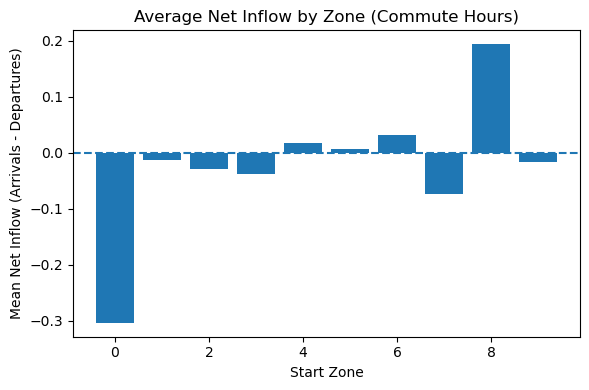

In [32]:
# ============================
# STEP 6.3: ZONE-LEVEL COMMUTE BALANCE
#   For each start_zone:
#     - average net inflow during commute hours
#     - identify zones with systematically worse balance
# ============================

import pandas as pd

# --- CONFIG (same as 6.2, but can be changed here) ---
COMMUTE_HOURS = list(range(7, 11)) + list(range(16, 20))  # 7–10 & 16–19
MIN_DAYS_ZONE = 20          # require at least this many station-days in zone
# ------------------------------------------------------

# Sanity checks
for col in ["started_at", "ended_at", "start_station_id", "end_station_id", "start_zone"]:
    if col not in df.columns:
        raise KeyError(f"Missing column '{col}' needed for zone flows. Make sure 5.2 and 6.2 logic ran.")

df["started_at"] = pd.to_datetime(df["started_at"])
df["ended_at"]   = pd.to_datetime(df["ended_at"])

df["start_hour"] = df["started_at"].dt.hour
df["end_hour"]   = df["ended_at"].dt.hour
df["start_date"] = df["started_at"].dt.date
df["end_date"]   = df["ended_at"].dt.date

count_col = "ride_id" if "ride_id" in df.columns else df.columns[0]

# ---------- 6.3.1 Station-day net inflow in commute hours (rebuild like 6.2) ----------

df_dep_peak = df[df["start_hour"].isin(COMMUTE_HOURS)].dropna(subset=["start_station_id"]).copy()
df_arr_peak = df[df["end_hour"].isin(COMMUTE_HOURS)].dropna(subset=["end_station_id"]).copy()

dep_peak_daily = (
    df_dep_peak.groupby(["start_station_id", "start_station_name", "start_date"])[count_col]
    .count()
    .rename("departures")
    .reset_index()
)

arr_peak_daily = (
    df_arr_peak.groupby(["end_station_id", "end_station_name", "end_date"])[count_col]
    .count()
    .rename("arrivals")
    .reset_index()
)

dep_peak_daily = dep_peak_daily.rename(
    columns={
        "start_station_id": "station_id",
        "start_station_name": "station_name",
        "start_date": "date",
    }
)
arr_peak_daily = arr_peak_daily.rename(
    columns={
        "end_station_id": "station_id",
        "end_station_name": "station_name",
        "end_date": "date",
    }
)

peak_flow = pd.merge(
    dep_peak_daily,
    arr_peak_daily,
    on=["station_id", "station_name", "date"],
    how="outer",
)

peak_flow["departures"] = peak_flow["departures"].fillna(0).astype(int)
peak_flow["arrivals"]   = peak_flow["arrivals"].fillna(0).astype(int)
peak_flow["net_inflow"] = peak_flow["arrivals"] - peak_flow["departures"]

print("=== SAMPLE COMMUTE-WINDOW STATION-DAY FLOWS ===")
display(peak_flow.head())

# ---------- 6.3.2 Map stations to zones ----------

# Build station -> zone map from start_zone
station_zone_map = (
    df[["start_station_id", "start_zone"]]
    .dropna(subset=["start_station_id", "start_zone"])
    .drop_duplicates()
    .rename(columns={"start_station_id": "station_id"})
)

station_zone_map["start_zone"] = station_zone_map["start_zone"].astype(int)

peak_flow_zone = peak_flow.merge(
    station_zone_map,
    on="station_id",
    how="left"
)

# Drop rows with unknown zone for aggregation
peak_flow_zone = peak_flow_zone.dropna(subset=["start_zone"]).copy()
peak_flow_zone["start_zone"] = peak_flow_zone["start_zone"].astype(int)

print("\n=== SAMPLE STATION-DAY FLOWS WITH ZONE ===")
display(peak_flow_zone.head())

# ---------- 6.3.3 Zone-level net inflow stats ----------

zone_commute_stats = (
    peak_flow_zone.groupby("start_zone")["net_inflow"]
    .agg(
        days_observed="count",
        mean_net_inflow="mean",
        median_net_inflow="median",
        total_net_inflow="sum",
        neg_days=lambda x: (x < 0).sum(),
    )
    .reset_index()
)

zone_commute_stats["neg_day_frac"] = (
    zone_commute_stats["neg_days"] / zone_commute_stats["days_observed"]
)

# Filter to zones with enough data
zone_commute_stats = zone_commute_stats[
    zone_commute_stats["days_observed"] >= MIN_DAYS_ZONE
]

print("\n=== ZONE-LEVEL COMMUTE NET INFLOW STATS ===")
display(zone_commute_stats.sort_values("mean_net_inflow"))

# ---------- 6.3.4 Identify zones with systematically worse balance ----------

# "Worse balance" = more negative mean_net_inflow (on average losing bikes)
worse_zones = zone_commute_stats.sort_values("mean_net_inflow")  # most negative first

print("\n=== ZONES SORTED BY AVERAGE NET INFLOW (COMMUTE HOURS) ===")
display(worse_zones)

# Optional: quick bar plot of average net inflow by zone
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
plt.bar(worse_zones["start_zone"], worse_zones["mean_net_inflow"])
plt.axhline(0, linestyle="--")
plt.xlabel("Start Zone")
plt.ylabel("Mean Net Inflow (Arrivals - Departures)")
plt.title("Average Net Inflow by Zone (Commute Hours)")
plt.tight_layout()
plt.show()


## 6.4 Compare these zones’ rider-type composition (member-heavy vs casual-heavy).

### Zone-Level Rider Mix Analysis

**Individual Zone Variation:**
* **Most member-heavy zones:**
  * Zone 7: 28% casual / 72% member
  * Zone 5: 32% casual / 68% member
  * Zone 8: 35% casual / 65% member
* **Most casual-heavy zones:**
  * Zone 2: 62% casual / 38% member
  * Zone 4: 51% casual / 49% member
  * Zone 6: 48% casual / 52% member
* Individual zones show widely different rider compositions

**Group Comparison by Commute Flow:**
* **Emptier zones** (mean_net_inflow < 0):
  * Avg casual share ≈ 42.1%
  * Avg member share ≈ 57.9%
* **Filler zones** (mean_net_inflow ≥ 0):
  * Avg casual share ≈ 41.7%
  * Avg member share ≈ 58.3%
* Nearly identical rider-type compositions between groups

---

### Interpretation & Implications

**Key Finding:**
* Being an "emptier zone" during commute hours is not strongly explained by rider type
* Flow patterns are primarily determined by:
  * Spatial position in the city
  * Commute flow structure
  * Not by who is riding (members vs casuals)

**Fairness Implications:**
* Rebalancing to fix empty/full problems doesn't obviously privilege one rider type
* Addressing spatial imbalances is more about geography than rider demographics
* Counterfactual interventions can focus on:
  * Correcting flow imbalances
  * Improving geographic equity
  * Without creating rider-type disparities

=== ZONE-LEVEL RIDER MIX (ALL TRIPS) ===


,casual,member
start_zone,,
0,38.209059,61.790941
1,36.299740,63.700260
2,61.781076,38.218924
3,47.194432,52.805568
4,51.240946,48.759054
5,31.946257,68.053743
6,48.216948,51.783052
7,28.303568,71.696432
8,35.262018,64.737982



=== ZONES: COMMUTE NET INFLOW + RIDER MIX ===


,start_zone,days_observed,mean_net_inflow,median_net_inflow,total_net_inflow,neg_days,neg_day_frac,casual,member
0,0,71266,-0.303609,0.0,-21637,33531,0.470505,38.209059,61.790941
7,7,22586,-0.073674,0.0,-1664,9510,0.421057,28.303568,71.696432
3,3,3321,-0.037940,0.0,-126,1312,0.395062,47.194432,52.805568
2,2,5045,-0.028940,0.0,-146,1970,0.390486,61.781076,38.218924
9,9,13521,-0.015753,0.0,-213,5355,0.396051,40.884773,59.115227
1,1,30903,-0.012523,0.0,-387,12407,0.401482,36.299740,63.700260
5,5,17250,0.005971,0.0,103,7134,0.413565,31.946257,68.053743
4,4,4613,0.016909,0.0,78,1596,0.345979,51.240946,48.759054
6,6,4526,0.032479,0.0,147,1676,0.370305,48.216948,51.783052
8,8,58931,0.193803,0.0,11421,24976,0.423818,35.262018,64.737982



=== RIDER MIX: EMPTIER VS FILLER ZONES ===


,zone_type,avg_casual_share,avg_member_share,num_zones
0,emptier,42.112108,57.887892,6
1,filler,41.666542,58.333458,4


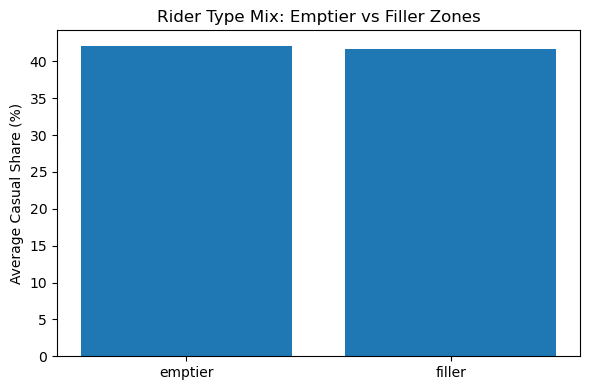

In [33]:
# ============================
# STEP 6.4: RIDER MIX OF EMPTIER VS FILLER ZONES
# ============================

import pandas as pd
import matplotlib.pyplot as plt

# Need start_zone, member_casual in df and zone_commute_stats from 6.3
for col in ["start_zone", "member_casual"]:
    if col not in df.columns:
        raise KeyError("Missing 'start_zone' or 'member_casual' – run 5.2/5.3 first.")

dfz = df.dropna(subset=["start_zone"]).copy()
dfz["start_zone"] = dfz["start_zone"].astype(int)

count_col = "ride_id" if "ride_id" in df.columns else df.columns[0]

# 6.4.1 Rebuild zone-level rider-type shares (all trips, not just commute)
zone_rider = (
    dfz.groupby(["start_zone", "member_casual"])[count_col]
    .count()
    .rename("trip_count")
    .reset_index()
)
zone_rider["zone_total"] = zone_rider.groupby("start_zone")["trip_count"].transform("sum")
zone_rider["trip_pct"] = 100 * zone_rider["trip_count"] / zone_rider["zone_total"]

zone_rider_pivot = zone_rider.pivot_table(
    index="start_zone",
    columns="member_casual",
    values="trip_pct",
    fill_value=0,
).rename_axis(None, axis=1)  # columns = 'casual','member'

print("=== ZONE-LEVEL RIDER MIX (ALL TRIPS) ===")
display(zone_rider_pivot)

# 6.4.2 Join with commute net inflow stats from 6.3 (worse_zones / zone_commute_stats)
if "zone_commute_stats" not in globals():
    raise NameError("zone_commute_stats not found – run step 6.3 first.")

zone_mix_commute = zone_commute_stats.merge(
    zone_rider_pivot, left_on="start_zone", right_index=True, how="left"
)

print("\n=== ZONES: COMMUTE NET INFLOW + RIDER MIX ===")
display(zone_mix_commute.sort_values("mean_net_inflow"))

# 6.4.3 Define emptier vs filler groups based on commute mean_net_inflow
zone_mix_commute["zone_type"] = zone_mix_commute["mean_net_inflow"].apply(
    lambda x: "emptier" if x < 0 else "filler"
)

group_mix = (
    zone_mix_commute.groupby("zone_type")
    .agg(
        avg_casual_share=("casual", "mean"),
        avg_member_share=("member", "mean"),
        num_zones=("start_zone", "nunique"),
    )
    .reset_index()
)

print("\n=== RIDER MIX: EMPTIER VS FILLER ZONES ===")
display(group_mix)

# 6.4.4 Simple bar plot of casual share
plt.figure(figsize=(6, 4))
plt.bar(group_mix["zone_type"], group_mix["avg_casual_share"])
plt.ylabel("Average Casual Share (%)")
plt.title("Rider Type Mix: Emptier vs Filler Zones")
plt.tight_layout()
plt.show()


# 7. Anomaly & Risk-Oriented EDA

## 7.1 Choose rule(s) for anomalies, e.g.:
•	very large duration-distance residual
•	extremely low or high speeds
•	duration above some percentile threshold.


### Anomaly Detection Analysis

**1. Thresholds Applied:**
* **Speed thresholds:**
  * Bottom 1%: 0.00 km/h (essentially stopped rides)
  * Top 1%: 24.37 km/h (very fast rides)
* **Duration threshold:**
  * 99th percentile: 94.25 min (longest 1% of trips)
* **Baseline metric:**
  * Median speed: 11.12 km/h (used to compute expected duration)

**2. Anomaly Prevalence:**
* `anom_residual` (duration vs distance): 12.0% of all trips
* `anom_speed` (too slow/fast): 6.7% of all trips
* `anom_long_duration`: 1.0% of all trips
* `is_anomaly_any`: 12.9% of all trips
* Most anomalies come from weird duration-distance combos

**3. Common Anomaly Patterns:**
* **Distance ≈ 0 but non-trivial duration:**
  * Example: 31 min, 0.505 km, speed ≈ 1 km/h
  * Likely dock unlock/relock, GPS issues, or user not actually traveling
* **Very long duration for short distance:**
  * Example: 48-66 minutes for <1 km
  * Suggests parking/pausing or data errors
* **Extremely high speed with normal duration:**
  * Example: speed 24.8 km/h with reasonable duration
  * Fast but not unreasonable compared to expected

---

### Model Applications

**Phase 1 (Anomaly Detection):**
* Use `is_anomaly_any` as label for anomaly-probability head
* These rules provide sensible ground truth for training

**Phase 5 (Hazard Model):**
* Predict future anomaly risk from partial rides
* Focus on patterns that emerge early in anomalous trips

**Next Steps:**
* Add anomaly rate analysis by:
  * Station
  * Zone
  * Hour of day
* Identify where/when these weird trips cluster
* Use spatial-temporal patterns to improve anomaly detection

In [34]:
# ==========================================
# STEP 7.1: DEFINE ANOMALY RULES & FLAGS
#   Rules:
#     (R1) Extremely low / high speed (speed_kmh)
#     (R2) Very long duration (upper percentile)
#     (R3) Large duration–distance residual
# ==========================================

import numpy as np
import pandas as pd

# ---- 0. Sanity: required columns ----
for col in ["duration_min", "distance_km", "speed_kmh"]:
    if col not in df.columns:
        raise KeyError(f"Missing required column: {col}")

# Work on non-missing rows for the core metrics
core = df[["duration_min", "distance_km", "speed_kmh"]].dropna()

# -----------------------------
# R1: EXTREME SPEEDS (too slow / too fast)
#    We'll use data-driven percentiles (1% and 99%)
# -----------------------------
speed_p1  = core["speed_kmh"].quantile(0.01)
speed_p99 = core["speed_kmh"].quantile(0.99)

print(f"Speed thresholds (1% / 99%): {speed_p1:.2f} km/h, {speed_p99:.2f} km/h")

df["anom_speed"] = (
    (df["speed_kmh"] <= speed_p1) | (df["speed_kmh"] >= speed_p99)
)

# -----------------------------
# R2: VERY LONG DURATIONS
#    Mark trips above the 99th percentile of duration_min
# -----------------------------
dur_p99 = core["duration_min"].quantile(0.99)
print(f"Duration threshold (99%): {dur_p99:.2f} minutes")

df["anom_long_duration"] = df["duration_min"] >= dur_p99

# -----------------------------
# R3: LARGE DURATION–DISTANCE RESIDUAL
#    Simple expected duration:
#       expected_duration = distance_km / median_speed * 60
#    Then flag if actual duration is much larger/smaller
# -----------------------------
median_speed = core["speed_kmh"].median()
print(f"Global median speed: {median_speed:.2f} km/h")

# Avoid division by zero
eps = 1e-6
expected_duration_min = df["distance_km"] / (median_speed + eps) * 60

# Ratio actual / expected
df["dur_exp_ratio"] = df["duration_min"] / (expected_duration_min + eps)

# Flag trips where duration is > 3x expected or < 1/3x expected
RATIO_HIGH = 3.0
RATIO_LOW  = 1/3

df["anom_residual"] = (
    (df["dur_exp_ratio"] >= RATIO_HIGH) |
    (df["dur_exp_ratio"] <= RATIO_LOW)
)

# -----------------------------
# COMBINED ANOMALY FLAG
# -----------------------------
anom_cols = ["anom_speed", "anom_long_duration", "anom_residual"]
df["is_anomaly_any"] = df[anom_cols].any(axis=1)

print("\n=== ANOMALY RULE SUMMARY ===")
summary = df[anom_cols + ["is_anomaly_any"]].mean().sort_values(ascending=False) * 100
print(summary.round(3))

# Optional: quick look at a few anomalous rows
print("\n=== SAMPLE ANOMALOUS TRIPS ===")
display(
    df.loc[df["is_anomaly_any"]]
      [["ride_id", "duration_min", "distance_km", "speed_kmh",
        "dur_exp_ratio"] + anom_cols]
      .head(15)
)


Speed thresholds (1% / 99%): 0.00 km/h, 24.37 km/h
Duration threshold (99%): 94.25 minutes
Global median speed: 11.12 km/h

=== ANOMALY RULE SUMMARY ===
is_anomaly_any        12.941
anom_residual         12.006
anom_speed             6.704
anom_long_duration     1.000
dtype: float64

=== SAMPLE ANOMALOUS TRIPS ===


,ride_id,duration_min,distance_km,speed_kmh,dur_exp_ratio,anom_speed,anom_long_duration,anom_residual
10,4A122EAE8B3EF284,31.0,0.505234,0.977872,1.136805e+01,False,False,True
18,A0FBD0E8A83BE183,42.0,0.677640,0.968057,1.148332e+01,False,False,True
21,70DC37BA65216CD1,11.0,0.514070,2.804016,3.964494e+00,False,False,True
29,E3B142A130867071,66.0,0.000000,0.000000,6.600000e+07,True,False,True
30,FF34B694583E40FF,3.0,0.000000,0.000000,3.000000e+06,True,False,True
33,71ED57BB52E2EE62,48.0,0.806118,1.007648,1.103214e+01,False,False,True
34,B86DFBA5B07CCD3B,1.0,0.000000,0.000000,1.000000e+06,True,False,True
36,4B56E9E617314D5F,21.0,0.000000,0.000000,2.100000e+07,True,False,True
37,71F42935C067F6F0,1.0,0.000000,0.000000,1.000000e+06,True,False,True
38,C6A29F1604A2D4A1,1.0,0.001702,0.102098,1.088694e+02,False,False,True


## 7.2 Compute anomaly rate overall (fraction of rides flagged).

### Anomaly Detection Summary

**Overall Statistics:**
* Total rides: 5.73M
* Flagged as anomalous: 0.74M
* Overall anomaly rate: 12.94%

**Rule Contributions:**
* Very long duration (R2): ~1% of rides
* Extreme speeds (R1): ~6.7% of rides
* Duration-distance residuals (R3): ~12% of rides
* Overlap between rules prevents simple addition

**Anomaly Types Captured:**
* Long duration with tiny distance (parked/paused/GPS issues)
* Distance inconsistent with typical speed
* Very fast or very slow rides
* Unusually long trips

---

### Assessment & Next Steps

**Current Setup Strengths:**
* Good balance - enough training data without being too inclusive
* Focuses on clearly odd behavior, not distribution noise
* Multi-rule approach captures different anomaly dimensions

**Potential Tuning Options:**
* Adjust percentiles (e.g., 0.5%/99.5% instead of 1%/99%)
* Modify duration threshold (e.g., 2× or 4× expected instead of current)
* Can be made stricter or looser based on model performance

**Applications:**
* Provides training labels for anomaly-probability head
* Creates ground truth for survival model
* Identifies operational issues needing investigation
* Can be refined as model performance is evaluated

In [35]:
# ============================
# STEP 7.2: OVERALL ANOMALY RATE
# ============================

import pandas as pd

if "is_anomaly_any" not in df.columns:
    raise KeyError("Column 'is_anomaly_any' not found. Run step 7.1 first.")

total_rides = len(df)
anom_rides = df["is_anomaly_any"].sum()

anom_rate = anom_rides / total_rides * 100

print(f"Total rides: {total_rides:,}")
print(f"Anomalous rides: {anom_rides:,}")
print(f"Overall anomaly rate: {anom_rate:.2f}%")


Total rides: 5,732,933
Anomalous rides: 741,914
Overall anomaly rate: 12.94%


## 7.3 Anomaly rate by:
•	rider type
•	bike type
•	hour of day
•	station / zone


### Anomaly Rate Analysis by Category

**By Rider Type:**
* Casual: 21.6% anomalous (455,986 / 2.11M)
* Member: 7.9% anomalous (285,928 / 3.62M)
* Casual trips ~3× more likely to be flagged as anomalous
* Tourists/leisure riders stop more, take slow loops, park bikes

**By Bike Type:**
* Electric scooter: 19.4% anomalous (highest)
* Classic bike: 13.5% anomalous
* Electric bike: 12.1% anomalous
* Scooters have more short, low-distance rides and stop-start patterns

**By Hour of Day:**
* Night/early morning (0-4h): ~17-19% (high)
* Morning commute (6-8h): ~6-8% (lowest)
* Midday/afternoon (10-16h): ~14-16%
* Late evening (21-23h): ~14-16%
* Cleanest behavior during weekday commute hours

**By Start Station (Top 20):**
* High anomaly rates at tourist stations:
  * DuSable Lake Shore Dr & Monroe St: 42.7%
  * Dusable Harbor: 41.1%
  * Millennium Park: 36.7%
  * Streeter Dr & Grand Ave: 34.8%
* Low rates at commuter hubs:
  * Clinton & Jackson/Madison/Washington: ~4-9%
  * Kingsbury & Kinzie: ~8%

**By Start Zone:**
* Core/dense zones (0,1,7,8): ~8-13% anomaly rate
* Peripheral zones:
  * Zone 2: 21.9%
  * Zone 3: 25.1%
  * Zone 4: 37.4% (highest)
  * Zone 6: 23.0%

---

### Project Implications

**Anomaly Risk Factors:**
* Casual riders
* Scooters and tourist lakefront stations
* Peripheral zones
* Off-peak hours

**Model Applications:**
* Multi-task model: Anomaly probability is highly informative when combined with:
  * Rider type
  * Bike type
  * Zone
  * Hour
* Hazard model: Early risk factors identified:
  * Casual + scooter + lakefront/peripheral + night = high anomaly risk
* Can use these patterns to improve anomaly detection and prediction

In [36]:
# ============================
# STEP 7.3: ANOMALY RATE BY GROUP
#   - rider type (member_casual)
#   - bike type (rideable_type)
#   - hour of day
#   - station
#   - zone
# ============================

import pandas as pd

if "is_anomaly_any" not in df.columns:
    raise KeyError("Column 'is_anomaly_any' not found. Run step 7.1 first.")

count_col = "ride_id" if "ride_id" in df.columns else df.columns[0]

def anomaly_rate_by(col, extra_cols=None, top_n=None, sort_desc=True):
    """
    Helper: compute anomaly rate grouped by `col` (and optional extra cols).
    Returns a DataFrame with total trips, anomalous trips, and anomaly_pct.
    """
    group_cols = [col] if extra_cols is None else [col] + extra_cols
    g = (
        df.groupby(group_cols)
        .agg(
            total_trips=(count_col, "count"),
            anomalous_trips=("is_anomaly_any", "sum"),
        )
        .reset_index()
    )
    g["anomaly_pct"] = 100 * g["anomalous_trips"] / g["total_trips"]
    if sort_desc:
        g = g.sort_values("anomaly_pct", ascending=False)
    if top_n is not None:
        g = g.head(top_n)
    return g

# 7.3.1 By rider type
anom_by_rider = anomaly_rate_by("member_casual", sort_desc=False)
print("=== ANOMALY RATE BY RIDER TYPE ===")
display(anom_by_rider)

# 7.3.2 By bike type
anom_by_bike = anomaly_rate_by("rideable_type", sort_desc=False)
print("\n=== ANOMALY RATE BY BIKE TYPE ===")
display(anom_by_bike)

# 7.3.3 By hour of day
if "hour" not in df.columns:
    df["started_at"] = pd.to_datetime(df["started_at"])
    df["hour"] = df["started_at"].dt.hour

anom_by_hour = anomaly_rate_by("hour", sort_desc=False)
print("\n=== ANOMALY RATE BY HOUR OF DAY ===")
display(anom_by_hour)

# 7.3.4 By station (top 20 by total trips)
if "start_station_id" in df.columns:
    anom_by_station = anomaly_rate_by(
        col="start_station_id",
        extra_cols=["start_station_name"],
        sort_desc=True,
    )
    # Compute top-20 by total trips to avoid tiny, noisy stations
    anom_by_station_top = (
        anom_by_station.sort_values("total_trips", ascending=False)
        .head(20)
        .sort_values("anomaly_pct", ascending=False)
    )
    print("\n=== ANOMALY RATE BY START STATION (TOP 20 BY TRIPS) ===")
    display(anom_by_station_top)
else:
    print("\nNo 'start_station_id' column – skipping station-level anomaly rates.")

# 7.3.5 By zone (start_zone)
if "start_zone" in df.columns:
    df["start_zone"] = df["start_zone"].astype("Int64")
    anom_by_zone = anomaly_rate_by("start_zone", sort_desc=False)
    print("\n=== ANOMALY RATE BY START ZONE ===")
    display(anom_by_zone)
else:
    print("\nNo 'start_zone' column – skipping zone-level anomaly rates.")


=== ANOMALY RATE BY RIDER TYPE ===


,member_casual,total_trips,anomalous_trips,anomaly_pct
0,casual,2114350,455986,21.566250
1,member,3618583,285928,7.901657



=== ANOMALY RATE BY BIKE TYPE ===


,rideable_type,total_trips,anomalous_trips,anomaly_pct
0,classic_bike,2568026,347243,13.521787
1,electric_bike,3022787,367132,12.145480
2,electric_scooter,142120,27539,19.377287



=== ANOMALY RATE BY HOUR OF DAY ===


,hour,total_trips,anomalous_trips,anomaly_pct
0,0,67492,11688,17.317608
1,1,43480,8339,19.178933
2,2,26004,5034,19.358560
3,3,15975,3060,19.154930
4,4,15046,2298,15.273162
5,5,45673,4550,9.962122
6,6,129493,9938,7.674546
7,7,249000,15846,6.363855
8,8,325327,23299,7.161717
9,9,246459,28099,11.401085



=== ANOMALY RATE BY START STATION (TOP 20 BY TRIPS) ===


,start_station_id,start_station_name,total_trips,anomalous_trips,anomaly_pct
479,13300,DuSable Lake Shore Dr & Monroe St,43006,18352,42.673115
1762,KA1503000064,Dusable Harbor,24840,10198,41.054750
362,13008,Millennium Park,32288,11840,36.669970
368,13022,Streeter Dr & Grand Ave,64576,22502,34.845763
375,13042,Michigan Ave & Oak St,38861,10913,28.082139
522,15544,Shedd Aquarium,24989,6690,26.771780
1847,SL-005,Indiana Ave & Roosevelt Rd,25478,4890,19.193029
1915,TA1307000117,Wabash Ave & Grand Ave,25404,4452,17.524799
376,13045,Dearborn St & Erie St,26726,4421,16.541944
1946,TA1308000001,Theater on the Lake,28795,4597,15.964577



=== ANOMALY RATE BY START ZONE ===


,start_zone,total_trips,anomalous_trips,anomaly_pct
0,0,2538453,327559,12.903883
1,1,194208,24763,12.750762
2,2,10241,2246,21.931452
3,3,9196,2310,25.119617
4,4,10355,3868,37.353935
5,5,96534,8557,8.864234
6,6,8721,2004,22.979016
7,7,279516,35590,12.732724
8,8,1455776,120417,8.271671
9,9,44486,6293,14.146023


## 7.4 Look at distributions of duration & distance for:
•	normal vs anomalous rides


### Duration: Normal vs Anomalous

**Normal Rides:**
* Concentrated between ~5-20 minutes
* Boxplot: median ~10 min, IQR ~6-15 min
* 99th percentile near ~30 min
* Thin tail beyond that point

**Anomalous Rides:**
* Much heavier right tail extending past 60, 100, 200+ minutes
* Boxplot: median ~18-20 min with huge IQR and long whiskers
* Even after clipping at 99th percentile, still appear much longer

**Key Insight:** Anomalies are disproportionately very long or unusually long for their distance

---

### Distance: Normal vs Anomalous

**Normal Rides:**
* Mode around 1-2 km with gradual decay to ~6-9 km
* Boxplot: median ≈ 1.7-1.8 km
* Many rides spanning several kilometers

**Anomalous Rides:**
* Strong spike at very small distances (≈ 0-0.3 km)
* Boxplot: median well below 1 km
* Many rides essentially "not going anywhere"

**Key Insight:** Most anomalies are short-distance but long-duration trips

---

### Model Implications

**Anomaly Detection:**
* Anomaly head is learning to flag:
  * "Parked / wandering / data-weird" trips
  * Not normal commuting patterns
* Distance and duration are powerful discriminators

**Survival Model:**
* Key early signals to capture:
  * Slow movement
  * Low distance growth
* These are strong predictors of upcoming anomaly
* Features should track rate of distance accumulation over time

Normal rides:   4,991,019
Anomalous rides:741,914


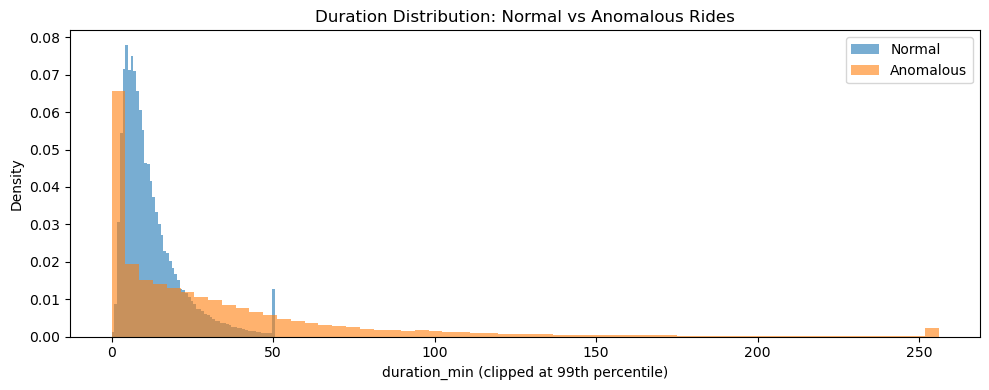

C:\Users\bnsev\AppData\Local\Temp\ipykernel_69664\1253244994.py:40: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


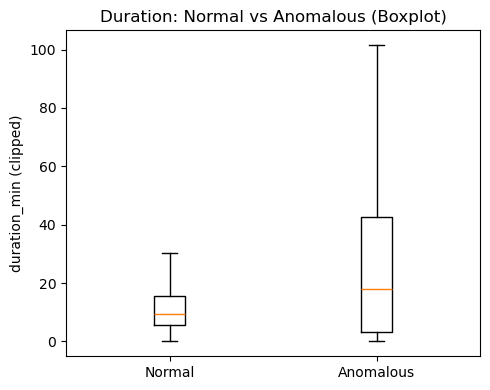

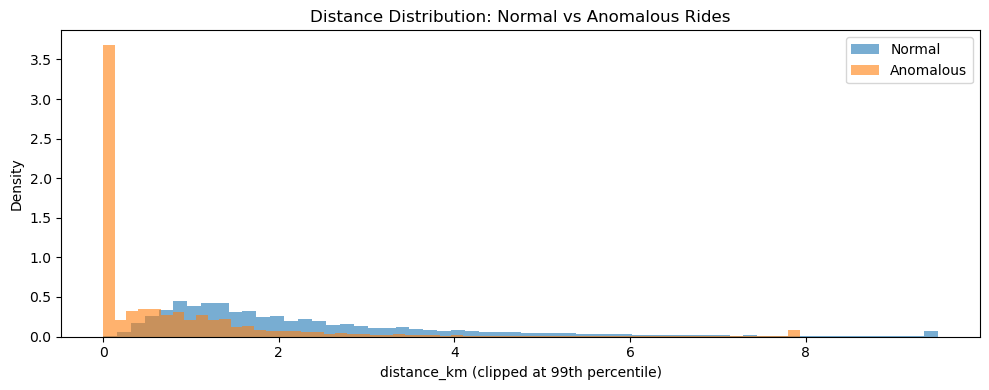

C:\Users\bnsev\AppData\Local\Temp\ipykernel_69664\1253244994.py:66: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


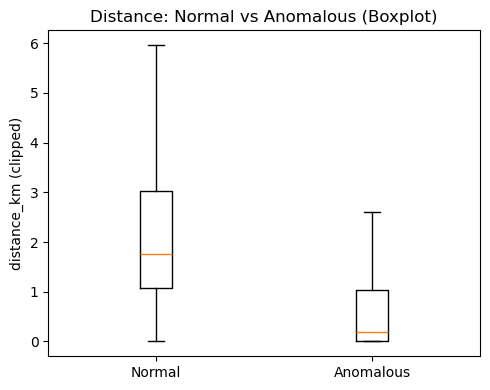

In [37]:
# ============================
# STEP 7.4: NORMAL VS ANOMALOUS DISTRIBUTIONS
#   - duration_min
#   - distance_km
# ============================

import matplotlib.pyplot as plt
import numpy as np

if "is_anomaly_any" not in df.columns:
    raise KeyError("Column 'is_anomaly_any' not found. Run step 7.1 first.")

# Split data
normal = df[~df["is_anomaly_any"]]
anom   = df[df["is_anomaly_any"]]

print(f"Normal rides:   {len(normal):,}")
print(f"Anomalous rides:{len(anom):,}")

# Helper: clip to 99th percentile for clearer plots
def get_clip(series, q=0.99):
    return series.clip(upper=series.quantile(q))

# 1) Duration distributions ---------------------------------------------------
norm_dur = get_clip(normal["duration_min"].dropna())
anom_dur = get_clip(anom["duration_min"].dropna())

plt.figure(figsize=(10, 4))
plt.hist(norm_dur, bins=60, alpha=0.6, label="Normal", density=True)
plt.hist(anom_dur, bins=60, alpha=0.6, label="Anomalous", density=True)
plt.xlabel("duration_min (clipped at 99th percentile)")
plt.ylabel("Density")
plt.title("Duration Distribution: Normal vs Anomalous Rides")
plt.legend()
plt.tight_layout()
plt.show()

# Optional boxplot for duration
plt.figure(figsize=(5, 4))
plt.boxplot(
    [norm_dur, anom_dur],
    labels=["Normal", "Anomalous"],
    showfliers=False,
)
plt.ylabel("duration_min (clipped)")
plt.title("Duration: Normal vs Anomalous (Boxplot)")
plt.tight_layout()
plt.show()

# 2) Distance distributions ---------------------------------------------------
norm_dist = get_clip(normal["distance_km"].dropna())
anom_dist = get_clip(anom["distance_km"].dropna())

plt.figure(figsize=(10, 4))
plt.hist(norm_dist, bins=60, alpha=0.6, label="Normal", density=True)
plt.hist(anom_dist, bins=60, alpha=0.6, label="Anomalous", density=True)
plt.xlabel("distance_km (clipped at 99th percentile)")
plt.ylabel("Density")
plt.title("Distance Distribution: Normal vs Anomalous Rides")
plt.legend()
plt.tight_layout()
plt.show()

# Optional boxplot for distance
plt.figure(figsize=(5, 4))
plt.boxplot(
    [norm_dist, anom_dist],
    labels=["Normal", "Anomalous"],
    showfliers=False,
)
plt.ylabel("distance_km (clipped)")
plt.title("Distance: Normal vs Anomalous (Boxplot)")
plt.tight_layout()
plt.show()


## 7.5 Manually inspect a small random sample of anomalous rides to sanity-check rules.

### Anomaly Sample Analysis

**1. Long-Duration, Zero-Distance "Parking" Trips**
* Many rows show distance_km = 0 with durations from 3-337 minutes
* Example: FE559134A61106A3 - 5.6 hours, 0 km, same start/end station
* These represent:
  * Unlock & leave events
  * Dock & hold situations
  * GPS stuck cases
* Clearly operationally abnormal

**2. Short Distance but Very Long Duration**
* Example: 8E3590A23DC3C88C - 42 min, 0.27 km, speed 0.39 km/h
* Example: 27F21612105511D8 - 45.6 min, 0.79 km, speed 1.0 km/h
* Users likely:
  * Standing around with the bike
  * App/timer running while mostly stationary

**3. Moderate Distance but Unusually Long Duration**
* Example: 213BF46C415CCCBA - 68 min for 3.0 km (speed ~2.7 km/h)
* Outliers compared to typical ~10-20 min for that distance
* Correctly flagged by residual rule

**4. Very Short Trips / Unlock-Relock Events**
* Many rides with duration < 3 min and 0 distance
* Some with tiny distance like 0.0089 km
* Likely:
  * Mis-docks
  * Test unlocks
  * Immediate cancellations

**5. High-Speed Anomalies**
* Example: 6727B6546AFF54D8 - 3.15 min, 1.34 km, speed ≈ 25.6 km/h
* Tripped high-speed rule but residual is fine
* Possibly:
  * E-bike sprinting
  * GPS compression
  * Partial track

**6. Rider & Bike Type Patterns**
* Mix of casuals and electric bikes/scooters
* Lakefront/tourist stations and some NA stations
* Consistent with earlier anomaly rate statistics

---

### Assessment

**Rule Validation:**
* Sample contains genuine anomalies or data/pathological cases
* Not normal commuting patterns
* Rule-based label `is_anomaly_any` appears well-calibrated

**Model Applications:**
* Good training target for anomaly head
* Suitable for survival model training
* Captures diverse anomaly types:
  * Stationary bikes
  * Unusually slow trips
  * High-speed outliers
  * System artifacts

In [38]:
# ============================
# STEP 7.5: MANUAL SAMPLE OF ANOMALOUS RIDES
# ============================

import pandas as pd

if "is_anomaly_any" not in df.columns:
    raise KeyError("Column 'is_anomaly_any' not found. Run step 7.1 first.")

# Columns to display for inspection (add/remove as you like)
inspect_cols = [
    "ride_id",
    "started_at", "ended_at",
    "duration_min", "distance_km", "speed_kmh",
    "rideable_type", "member_casual",
    "start_station_id", "start_station_name",
    "end_station_id", "end_station_name",
    "hour", "weekday", "is_weekend",
    "start_zone" if "start_zone" in df.columns else None,
    "is_anomaly_any", "anom_speed", "anom_long_duration", "anom_residual",
    "dur_exp_ratio" if "dur_exp_ratio" in df.columns else None,
]

# Drop any None columns
inspect_cols = [c for c in inspect_cols if c in df.columns]

# Take a random sample of anomalous rides
SAMPLE_SIZE = 30  # adjust as needed

anom_sample = (
    df[df["is_anomaly_any"]]
    .sample(n=SAMPLE_SIZE, random_state=42)
    [inspect_cols]
    .sort_values("duration_min", ascending=False)  # optional sorting
)

print(f"=== RANDOM SAMPLE OF {SAMPLE_SIZE} ANOMALOUS RIDES ===")
display(anom_sample)


=== RANDOM SAMPLE OF 30 ANOMALOUS RIDES ===


,ride_id,started_at,ended_at,duration_min,distance_km,speed_kmh,rideable_type,member_casual,start_station_id,start_station_name,...,end_station_name,hour,weekday,is_weekend,start_zone,is_anomaly_any,anom_speed,anom_long_duration,anom_residual,dur_exp_ratio
4815321,FE559134A61106A3,2024-11-04 13:04:11.330,2024-11-04 18:41:01.637,336.838450,0.000000,0.000000,classic_bike,member,13430,LaSalle St & Illinois St,...,LaSalle St & Illinois St,13,0,False,0,True,True,True,True,3.368385e+08
39839,213BF46C415CCCBA,2024-04-20 20:21:00.000,2024-04-20 21:29:00.000,68.000000,3.043578,2.685510,classic_bike,casual,15666,California Ave & Lake St,...,Elizabeth St & Fulton St,20,5,True,5,True,False,False,True,4.139441e+00
43336,0C5B3F8B257D7794,2024-04-14 11:49:00.000,2024-04-14 12:43:00.000,54.000000,0.000000,0.000000,classic_bike,casual,15571,Broadway & Granville Ave,...,Broadway & Granville Ave,11,6,True,1,True,True,False,True,5.400000e+07
2440877,27F21612105511D8,2024-07-27 11:27:45.712,2024-07-27 12:13:18.905,45.553217,0.794956,1.047069,classic_bike,casual,SL-010,Financial Pl & Ida B Wells Dr,...,Michigan Ave & 8th St,11,5,True,0,True,False,False,True,1.061678e+01
570593,8E3590A23DC3C88C,2024-05-18 12:02:50.000,2024-05-18 12:44:48.000,41.966667,0.273168,0.390549,classic_bike,casual,KA1504000116,Larrabee St & Oak St,...,Larrabee St & Kingsbury St,12,5,True,0,True,False,False,True,2.846377e+01
1847234,9E409335AD9B0941,2024-07-21 10:24:49.892,2024-07-21 11:04:09.501,39.326817,0.000000,0.000000,electric_bike,casual,TA1309000049,DuSable Lake Shore Dr & Belmont Ave,...,DuSable Lake Shore Dr & Belmont Ave,10,6,True,8,True,True,False,True,3.932682e+07
3771946,E0F3437FDEFF8B85,2024-09-26 17:30:11.754,2024-09-26 18:03:03.759,32.866750,0.000000,0.000000,classic_bike,member,TA1309000039,DuSable Lake Shore Dr & Diversey Pkwy,...,DuSable Lake Shore Dr & Diversey Pkwy,17,3,False,8,True,True,False,True,3.286675e+07
3655039,BD3C7A8812237652,2024-09-01 17:51:13.204,2024-09-01 18:19:10.575,27.956183,0.756068,1.622684,electric_scooter,casual,TA1307000131,Wabash Ave & Wacker Pl,...,New St & Illinois St,17,6,True,0,True,False,False,True,6.850691e+00
418805,55C5076B7E29F07F,2024-05-03 16:35:25.000,2024-05-03 17:03:02.000,27.616667,0.000000,0.000000,classic_bike,casual,13061,Ashland Ave & Division St,...,Ashland Ave & Division St,16,4,False,8,True,True,False,True,2.761667e+07
1572302,5E2580A9F4DA700C,2024-06-03 08:36:38.304,2024-06-03 09:01:07.867,24.492717,0.000000,0.000000,classic_bike,member,13221,Wood St & Milwaukee Ave,...,Wood St & Milwaukee Ave,8,0,False,8,True,True,False,True,2.449272e+07


# 8. Uncertainty / Noise Structure (Motivating Probabilistic Models)

## 8.1 For duration:
•	compute variance of duration_min conditioned on:
o	rider type
o	bike type
o	hour-of-day
o	zone


### Duration Variance Analysis

**By Rider Type:**
* **Casual:** mean ≈ 20.8 min, variance ≈ 1764
* **Member:** mean ≈ 12.1 min, variance ≈ 359
* Casual trips are longer on average and much more variable (almost 5× variance)
* Members show more predictable durations (better for commute modeling)

**By Bike Type:**
* **Classic bike:** mean ≈ 19.1 min, variance ≈ 1683
* **Electric bike:** mean ≈ 12.4 min, variance ≈ 239
* **Electric scooter:** mean ≈ 10.6 min, variance ≈ 142
* Electrics (bikes + scooters) produce shorter, tighter-duration rides
* Classics show long, very spread-out durations
* Bike type is strong signal for duration uncertainty

**By Hour of Day:**
* **Early night (0-3h):** means ≈ 14.5-14.9 min, very high variance (≈1500-1900)
* **Commute morning (5-8h):** lower means (≈11-12 min), low variance (~420-500)
* **Midday/afternoon (10-16h):** means ≈ 16-17.5 min, variance ~850-1050
* **Late evening (21-23h):** variance ≈ 1000-1400
* Commute hours are most predictable; nights and some mid-day periods are noisier

**By Zone:**
* Most zones: mean ≈ 15-18 min, variance ≈ 900-1100
* **Zone 4:** mean ≈ 28.0 min, variance ≈ 2366 (very long & noisy)
* **Zone 3:** mean ≈ 21.0 min, variance ≈ 2974 (highest variance)
* **Zone 6:** mean ≈ 18.5, variance ≈ 1359
* Zones 3 & 4 stand out with much longer, more variable trips
* Central zones (0, 1, 5, 8) have more moderate variance and better-behaved predictions

---

### Model Implications

**Prediction Uncertainty:**
* Variance patterns should inform uncertainty estimates
* Some segments (casual riders, classic bikes, night hours, zones 3/4) need wider prediction intervals
* Commute hours, members, and electric vehicles allow tighter predictions

**Feature Engineering:**
* Variance differences support using:
  * Rider type
  * Bike type
  * Hour of day
  * Zone
* As key features for duration prediction models
* Particularly important for probabilistic forecasting

**Operational Planning:**
* High-variance segments require more flexible capacity planning
* Low-variance segments (commute hours) allow more precise resource allocation

In [39]:
# ==========================================
# STEP 8.1: CONDITIONAL VARIANCE OF duration_min
#   by rider type, bike type, hour-of-day, zone
# ==========================================

import pandas as pd

if "duration_min" not in df.columns:
    raise KeyError("Need 'duration_min' in df.")

# Ensure hour & start_zone exist
if "hour" not in df.columns:
    df["started_at"] = pd.to_datetime(df["started_at"])
    df["hour"] = df["started_at"].dt.hour

if "start_zone" in df.columns:
    df["start_zone"] = df["start_zone"].astype("Int64")

# Helper: compute mean & variance for a grouping column
def duration_stats_by(group_col):
    g = (
        df.dropna(subset=["duration_min", group_col])
          .groupby(group_col)["duration_min"]
          .agg(
              count="count",
              mean_duration="mean",
              var_duration="var"   # sample variance
          )
          .reset_index()
    )
    return g

# 1) By rider type
dur_by_rider = duration_stats_by("member_casual")
print("=== DURATION STATS BY RIDER TYPE ===")
display(dur_by_rider)

# 2) By bike type
dur_by_bike = duration_stats_by("rideable_type")
print("\n=== DURATION STATS BY BIKE TYPE ===")
display(dur_by_bike)

# 3) By hour-of-day
dur_by_hour = duration_stats_by("hour").sort_values("hour")
print("\n=== DURATION STATS BY HOUR OF DAY ===")
display(dur_by_hour)

# 4) By zone
if "start_zone" in df.columns:
    dur_by_zone = duration_stats_by("start_zone").sort_values("start_zone")
    print("\n=== DURATION STATS BY START ZONE ===")
    display(dur_by_zone)
else:
    print("\nNo 'start_zone' column – skipping zone-level stats.")


=== DURATION STATS BY RIDER TYPE ===


,member_casual,count,mean_duration,var_duration
0,casual,2114350,20.847190,1763.511616
1,member,3618583,12.128745,359.294107



=== DURATION STATS BY BIKE TYPE ===


,rideable_type,count,mean_duration,var_duration
0,classic_bike,2568026,19.074885,1683.236690
1,electric_bike,3022787,12.398640,238.945768
2,electric_scooter,142120,10.581756,142.051493



=== DURATION STATS BY HOUR OF DAY ===


,hour,count,mean_duration,var_duration
0,0,67492,14.581001,1690.181474
1,1,43480,14.773742,1560.351599
2,2,26004,14.592398,1526.159242
3,3,15975,14.857387,1920.923816
4,4,15046,13.223824,1319.627846
5,5,45673,11.226083,445.027578
6,6,129493,11.225381,501.966559
7,7,249000,11.858062,420.536745
8,8,325327,12.160885,441.200092
9,9,246459,14.266033,661.947052



=== DURATION STATS BY START ZONE ===


,start_zone,count,mean_duration,var_duration
0,0,2538453,16.641485,1095.815093
1,1,194208,17.227674,1044.685698
2,2,10241,16.006945,1519.298747
3,3,9196,20.983782,2974.423841
4,4,10355,27.956875,2366.704429
5,5,96534,15.011206,901.730053
6,6,8721,18.471995,1358.891219
7,7,279516,14.318712,1168.205076
8,8,1455776,15.377597,906.771634
9,9,44486,18.352408,1031.366967


## 8.2 For station demand:
•	for a busy station, take one hour (e.g., Monday 8–9am) and plot distribution of counts across days.


### Single Station Demand Variability Analysis

**Station:** Streeter Dr & Grand Ave
**Time Period:** Monday 8-9am

**Typical Demand Pattern:**
* Median: ~4 departures per Monday
* IQR: ~2-5 rides (most Mondays fall in this range)
* Represents the "normal" expected demand level

**Variability & Extremes:**
* Minimum: ~1 trip
* Upper whisker: ~8 trips
* Outlier: ~12 departures (likely good-weather or event day)
* Demand can vary by factor of 10-12× even for same hour/weekday

---

### Model Implications

**Forecasting Requirements:**
* Station-demand models must output predictive intervals, not just point forecasts
* CRPS and coverage metrics are appropriate evaluation approaches
* Must account for high variability even at busy stations

**Key Feature Needs:**
* Season
* Weather conditions
* Holiday/event indicators
* These features help explain why some Mondays spike to 12 while others sit at 2-4

**Operational Planning:**
* Even high-demand stations show significant hour-to-hour variability
* Capacity planning must accommodate both typical levels and outlier days
* Resource allocation should be flexible enough to handle 10× demand swings

Using busy station: Streeter Dr & Grand Ave (ID 13022)
Hour: 8:00–8:59, Weekday code: 0 (0=Mon)

=== SAMPLE DAILY COUNTS FOR THIS STATION / HOUR ===


,date,departures
0,2024-04-15,5
1,2024-04-22,3
2,2024-04-29,2
3,2024-05-06,5
4,2024-05-13,2


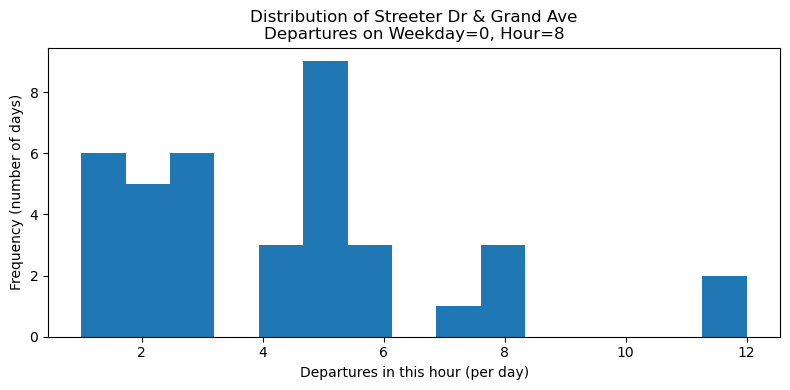

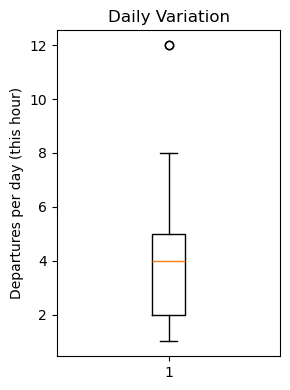

In [40]:
# ==========================================
# STEP 8.2: DISTRIBUTION OF HOURLY DEMAND
#   For one busy station, one hour & weekday
#   Example: Monday 8–9am departures
# ==========================================

import pandas as pd
import matplotlib.pyplot as plt

# ----- CONFIG -----
WEEKDAY_TARGET = 0      # 0 = Monday (your weekday encoding 0–6)
HOUR_TARGET    = 8      # departures starting in 08:00–08:59
BUSY_STATION_ID = None  # set to a specific id, or leave None to auto-pick busiest
# -------------------

# Ensure time fields exist
df["started_at"] = pd.to_datetime(df["started_at"])
if "hour" not in df.columns:
    df["hour"] = df["started_at"].dt.hour
if "weekday" not in df.columns:
    df["weekday"] = df["started_at"].dt.weekday
df["date"] = df["started_at"].dt.date

count_col = "ride_id" if "ride_id" in df.columns else df.columns[0]

# 1) Pick a busy station if not specified
if BUSY_STATION_ID is None:
    station_counts = (
        df.groupby(["start_station_id", "start_station_name"])[count_col]
          .count()
          .reset_index()
          .rename(columns={count_col: "trip_count"})
          .sort_values("trip_count", ascending=False)
    )
    busy_row = station_counts.iloc[0]
    BUSY_STATION_ID = busy_row["start_station_id"]
    BUSY_STATION_NAME = busy_row["start_station_name"]
else:
    # look up name if available
    name_series = df.loc[df["start_station_id"] == BUSY_STATION_ID, "start_station_name"]
    BUSY_STATION_NAME = name_series.mode().iloc[0] if not name_series.empty else str(BUSY_STATION_ID)

print(f"Using busy station: {BUSY_STATION_NAME} (ID {BUSY_STATION_ID})")
print(f"Hour: {HOUR_TARGET}:00–{HOUR_TARGET}:59, Weekday code: {WEEKDAY_TARGET} (0=Mon)")

# 2) Filter to that station + weekday + hour
sub = df[
    (df["start_station_id"] == BUSY_STATION_ID) &
    (df["weekday"] == WEEKDAY_TARGET) &
    (df["hour"] == HOUR_TARGET)
].copy()

# 3) Aggregate counts by date
daily_counts = (
    sub.groupby("date")[count_col]
       .count()
       .rename("departures")
       .reset_index()
       .sort_values("date")
)

print("\n=== SAMPLE DAILY COUNTS FOR THIS STATION / HOUR ===")
display(daily_counts.head())

# 4) Plot distribution across days
if not daily_counts.empty:
    plt.figure(figsize=(8,4))
    plt.hist(daily_counts["departures"], bins=15)
    plt.xlabel("Departures in this hour (per day)")
    plt.ylabel("Frequency (number of days)")
    plt.title(f"Distribution of {BUSY_STATION_NAME}\nDepartures on Weekday={WEEKDAY_TARGET}, Hour={HOUR_TARGET}")
    plt.tight_layout()
    plt.show()

    # Optional boxplot
    plt.figure(figsize=(3,4))
    plt.boxplot(daily_counts["departures"], vert=True)
    plt.ylabel("Departures per day (this hour)")
    plt.title("Daily Variation")
    plt.tight_layout()
    plt.show()
else:
    print("No data for this station/hour/weekday combination.")


## 8.3 Repeat for a peripheral station; compare variability.

### Central vs Peripheral Demand Uncertainty

**Central Station: Streeter Dr & Grand Ave (Mon 8-9am)**
* Mean: 4.32 departures/hour
* Std dev: 2.76
* Range: 1 → 12 trips
* Boxplot:
  * Median = 4
  * 25-75%: roughly 2-5 rides
  * Occasional big spikes (8-12 rides) on some Mondays
* Characteristic: Higher mean with much higher variance
* Uncertainty driven by demand shocks (tourists, weather, events)

**Peripheral Station: Sheridan Rd & Columbia Ave (Mon 8-9am)**
* Mean: 1.19 departures/hour
* Std dev: 0.40
* Range: 1 → 2 trips
* Boxplot:
  * Median = 1
  * 75% of days exactly 1 departure
  * Only a few days have 2 trips
* Characteristic: Low-volume and extremely stable
* Main uncertainty is whether you get 1 vs 2 rides, not 1 vs 12

---

### Model Implications

**Forecasting Requirements:**
* Central stations need wide predictive intervals
* Peripheral stations can use narrow intervals
* Model should learn station-specific variance parameters

**Uncertainty Sources:**
* Central/tourist zones: dominated by external factors
  * Weather
  * Tourist volume
  * Special events
* Peripheral zones: minimal variability
  * Predictable neighborhood usage patterns

**Trajectory Model Design:**
* Should naturally produce larger intervals for central/tourist zones
* Smaller intervals for neighborhood docks
* Station-specific variance parameters will improve overall calibration

Central station: Streeter Dr & Grand Ave (ID 13022, total trips 64,576)
Central hourly counts (this weekday/hour) summary:
count    38.000000
mean      4.315789
std       2.761759
min       1.000000
25%       2.000000
50%       4.000000
75%       5.000000
max      12.000000
Name: departures, dtype: float64

Peripheral station: Sheridan Rd & Columbia Ave (ID 660, total trips 3,330)
Peripheral hourly counts (this weekday/hour) summary:
count    21.000000
mean      1.190476
std       0.402374
min       1.000000
25%       1.000000
50%       1.000000
75%       1.000000
max       2.000000
Name: departures, dtype: float64


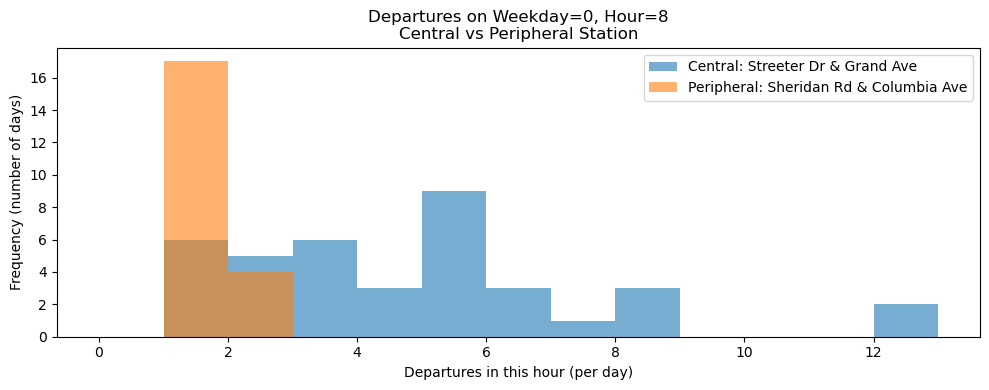

C:\Users\bnsev\AppData\Local\Temp\ipykernel_69664\3691535706.py:93: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


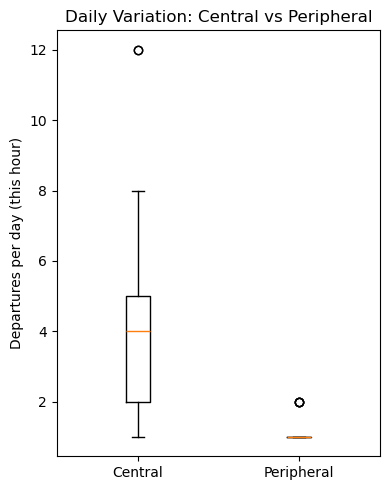

In [42]:
# ==========================================
# STEP 8.3: CENTRAL VS PERIPHERAL STATION
#   Variability of hourly departures across days
#   Example: Monday 8–9am
# ==========================================

import pandas as pd
import matplotlib.pyplot as plt

# ---- CONFIG ----
WEEKDAY_TARGET = 0   # 0 = Monday
HOUR_TARGET    = 8   # 8–9am
CENTRAL_ZONES     = [0, 8, 7, 1, 5]   # your high-volume zones
PERIPHERAL_ZONES  = [2, 3, 4, 6]      # more peripheral zones
# ----------------

df["started_at"] = pd.to_datetime(df["started_at"])
if "hour" not in df.columns:
    df["hour"] = df["started_at"].dt.hour
if "weekday" not in df.columns:
    df["weekday"] = df["started_at"].dt.weekday
if "date" not in df.columns:
    df["date"] = df["started_at"].dt.date
if "start_zone" in df.columns:
    df["start_zone"] = df["start_zone"].astype("Int64")
else:
    raise KeyError("Need 'start_zone' column from clustering step (5.2).")

count_col = "ride_id" if "ride_id" in df.columns else df.columns[0]

def hourly_counts_for_station(station_id):
    sub = df[
        (df["start_station_id"] == station_id) &
        (df["weekday"] == WEEKDAY_TARGET) &
        (df["hour"] == HOUR_TARGET)
    ].copy()
    daily = (
        sub.groupby("date")[count_col]
           .count()
           .rename("departures")
           .reset_index()
           .sort_values("date")
    )
    return daily

def busiest_station_in_zones(zone_list):
    sub = df[df["start_zone"].isin(zone_list)]
    station_counts = (
        sub.groupby(["start_station_id", "start_station_name"])[count_col]
           .count()
           .reset_index()
           .rename(columns={count_col: "trip_count"})
           .sort_values("trip_count", ascending=False)
    )
    row = station_counts.iloc[0]
    return row["start_station_id"], row["start_station_name"], row["trip_count"]

# 1) Central station
central_id, central_name, central_total = busiest_station_in_zones(CENTRAL_ZONES)
central_counts = hourly_counts_for_station(central_id)

print(f"Central station: {central_name} (ID {central_id}, total trips {central_total:,})")
print("Central hourly counts (this weekday/hour) summary:")
print(central_counts["departures"].describe())

# 2) Peripheral station
periph_id, periph_name, periph_total = busiest_station_in_zones(PERIPHERAL_ZONES)
periph_counts = hourly_counts_for_station(periph_id)

print(f"\nPeripheral station: {periph_name} (ID {periph_id}, total trips {periph_total:,})")
print("Peripheral hourly counts (this weekday/hour) summary:")
print(periph_counts["departures"].describe())

# 3) Plot histograms side-by-side (only if data exists)
if not central_counts.empty and not periph_counts.empty:
    plt.figure(figsize=(10,4))
    max_dep = max(central_counts["departures"].max(), periph_counts["departures"].max())
    bins = range(0, int(max_dep) + 2)

    plt.hist(central_counts["departures"], bins=bins, alpha=0.6,
             label=f"Central: {central_name}")
    plt.hist(periph_counts["departures"], bins=bins, alpha=0.6,
             label=f"Peripheral: {periph_name}")
    plt.xlabel("Departures in this hour (per day)")
    plt.ylabel("Frequency (number of days)")
    plt.title(f"Departures on Weekday={WEEKDAY_TARGET}, Hour={HOUR_TARGET}\nCentral vs Peripheral Station")
    plt.legend()
    plt.tight_layout()
    plt.show()

    # Boxplots for variability comparison
    plt.figure(figsize=(4,5))
    plt.boxplot(
        [central_counts["departures"], periph_counts["departures"]],
        labels=["Central", "Peripheral"],
    )
    plt.ylabel("Departures per day (this hour)")
    plt.title("Daily Variation: Central vs Peripheral")
    plt.tight_layout()
    plt.show()
else:
    print("\nNot enough data for this weekday/hour at one of the stations.")


## 8.4 Identify combinations with especially heavy tails or high variance (e.g., casual + weekends + scenic zone

### Duration Variance Analysis by Rider/Day/Zone

**1. Highest Variance Combinations:**
* **casual, Weekend, zone 7**
  * Mean: 30.8 min, Variance: 3809
  * 90th: 73.5 min, 95th: 102 min, Max: 24 hours
* **casual, Weekend, zone 1**
* **casual, Weekend, zone 5**
* **casual, Weekend, zones 0, 8**

**Common Pattern:**
> Casual + Weekend + zones {0,1,5,7,8} = long, extremely noisy rides
* Represents lakefront/tourist/scenic behavior
* Mix of short jaunts, 1-2 hour cruises, and big outliers

**2. Heavy Tails (p95/mean):**
* Highest ratios:
  * casual, Weekday, zone 7: p95 ≈ 73 min, mean ≈ 20 → 3.65×
  * member, Weekday, zone 7: mean ≈ 10 min, p95 ≈ 33.6 → 3.36×
  * casual, Weekend zones 1,7,0: p95 ≈ 3× mean
* Even with average rides of 20-30 minutes, 95th percentile reaches 70-100 minutes
* Very heavy right tails across these combinations

**3. "Scenic Weekend" Patterns:**
Filtered casual + Weekend combinations:
* Zones 1 & 7: mean ~27-31 min, var ~2800-3800, p95 ~90-102 min
* Zones 0, 8, 9, 5: mean ~21-28 min, p95 ~2.6-3× mean
* Clear candidates for scenic/leisure riding behavior

---

### Model Implications

**Uncertainty Modeling:**
* Scenic combinations need wider predictive intervals
* Consider higher quantile loss weight for these segments
* Variance patterns should inform prediction confidence bounds

**Anomaly Detection:**
* Anomaly rules should be tuned differently for scenic zones
* Long rides in these areas are partly "normal leisure"
* Need different thresholds than commuter zones

**Multi-task Model Design:**
* "Scenic zone" tag should be incorporated in latent intent model
* Clear distinction between:
  * Casual + Weekend in zones 0/1/5/7/8/9 (heavy-tail, leisure/scenic)
  * Members and weekday commuters in central zones (predictable)

**Operational Planning:**
* Scenic zones require more flexible capacity planning
* Need to accommodate both typical rides and extreme outliers
* Different rebalancing strategy for scenic vs commuter zones

In [43]:
# ==========================================
# STEP 8.4: HEAVY-TAIL / HIGH-VARIANCE COMBINATIONS
#   Example groups: rider type + weekend + start_zone
# ==========================================

import pandas as pd
import numpy as np

# Safety checks
needed = ["duration_min", "member_casual", "is_weekend", "start_zone"]
missing = [c for c in needed if c not in df.columns]
if missing:
    raise KeyError(f"Missing columns in df: {missing}. Run earlier steps first.")

# Nice label for weekend/weekday
df["weekend_label"] = np.where(df["is_weekend"], "Weekend", "Weekday")

# Minimum trips per combo to consider (to avoid tiny noisy groups)
MIN_TRIPS = 5000

group_cols = ["member_casual", "weekend_label", "start_zone"]

def q(x, p):
    return x.quantile(p)

heavy_tail_stats = (
    df.dropna(subset=["duration_min"])
      .groupby(group_cols)["duration_min"]
      .agg(
          count="count",
          mean_duration="mean",
          var_duration="var",
          p75=lambda x: q(x, 0.75),
          p90=lambda x: q(x, 0.90),
          p95=lambda x: q(x, 0.95),
          max_duration="max",
      )
      .reset_index()
)

# Focus on combinations with enough data
heavy_tail_stats = heavy_tail_stats[heavy_tail_stats["count"] >= MIN_TRIPS].copy()

# Tail indices: how heavy are the tails relative to the mean?
heavy_tail_stats["p95_over_mean"] = heavy_tail_stats["p95"] / heavy_tail_stats["mean_duration"]
heavy_tail_stats["p90_over_mean"] = heavy_tail_stats["p90"] / heavy_tail_stats["mean_duration"]

# Sort by variance and tail heaviness
heavy_by_var  = heavy_tail_stats.sort_values("var_duration", ascending=False)
heavy_by_tail = heavy_tail_stats.sort_values("p95_over_mean", ascending=False)

print("=== TOP 15 COMBINATIONS BY VARIANCE OF DURATION ===")
display(heavy_by_var.head(15))

print("\n=== TOP 15 COMBINATIONS BY HEAVY TAIL (p95 / mean) ===")
display(heavy_by_tail.head(15))

# Optionally, inspect a specific “scenic” pattern, e.g. casual + Weekend
scenic_like = heavy_tail_stats[
    (heavy_tail_stats["member_casual"] == "casual") &
    (heavy_tail_stats["weekend_label"] == "Weekend")
].sort_values("p95_over_mean", ascending=False)

print("\n=== CASUAL + WEEKEND COMBOS (POTENTIAL SCENIC ZONES) ===")
display(scenic_like.head(20))


=== TOP 15 COMBINATIONS BY VARIANCE OF DURATION ===


,member_casual,weekend_label,start_zone,count,mean_duration,var_duration,p75,p90,p95,max_duration,p95_over_mean,p90_over_mean
17,casual,Weekend,7,27299,30.786815,3808.964669,39.299533,73.498363,101.948972,1439.871300,3.311449,2.387332
11,casual,Weekend,1,24072,27.142242,2808.869578,29.000000,61.671218,90.924195,1439.906867,3.349915,2.272149
15,casual,Weekend,5,9763,21.309622,2794.649657,21.464400,37.566627,56.486978,1429.194417,2.650773,1.762895
10,casual,Weekend,0,362161,27.950988,2344.351201,31.570583,58.181233,83.016667,1439.934567,2.970080,2.081545
7,casual,Weekday,7,51814,20.010860,2133.126471,18.418900,49.996630,73.000000,1438.964567,3.648019,2.498475
18,casual,Weekend,8,209183,22.640360,2064.353715,24.464658,43.950000,64.563710,1439.856333,2.851709,1.941224
0,casual,Weekday,0,607758,22.047993,2031.226473,23.582650,45.000000,67.216667,1437.009050,3.048652,2.041002
8,casual,Weekday,8,304153,18.753470,1787.150227,19.511800,34.975110,52.425657,1438.695900,2.795518,1.864994
5,casual,Weekday,5,21076,17.290469,1736.328032,18.232933,30.306908,43.229862,1433.619383,2.500213,1.752810
1,casual,Weekday,1,46425,19.666750,1732.356267,19.979383,40.521997,64.966693,1419.342433,3.303377,2.060432



=== TOP 15 COMBINATIONS BY HEAVY TAIL (p95 / mean) ===


,member_casual,weekend_label,start_zone,count,mean_duration,var_duration,p75,p90,p95,max_duration,p95_over_mean,p90_over_mean
7,casual,Weekday,7,51814,20.010860,2133.126471,18.418900,49.996630,73.000000,1438.964567,3.648019,2.498475
27,member,Weekday,7,152599,10.002170,461.866416,9.555967,21.976747,33.601372,1420.693100,3.359408,2.197198
11,casual,Weekend,1,24072,27.142242,2808.869578,29.000000,61.671218,90.924195,1439.906867,3.349915,2.272149
17,casual,Weekend,7,27299,30.786815,3808.964669,39.299533,73.498363,101.948972,1439.871300,3.311449,2.387332
37,member,Weekend,7,47804,12.523974,616.501389,12.234429,31.230748,41.462920,1418.821550,3.310684,2.493677
1,casual,Weekday,1,46425,19.666750,1732.356267,19.979383,40.521997,64.966693,1419.342433,3.303377,2.060432
0,casual,Weekday,0,607758,22.047993,2031.226473,23.582650,45.000000,67.216667,1437.009050,3.048652,2.041002
10,casual,Weekend,0,362161,27.950988,2344.351201,31.570583,58.181233,83.016667,1439.934567,2.970080,2.081545
19,casual,Weekend,9,5911,22.764980,1224.652206,26.327767,46.420933,64.930175,1238.854467,2.852196,2.039138
18,casual,Weekend,8,209183,22.640360,2064.353715,24.464658,43.950000,64.563710,1439.856333,2.851709,1.941224



=== CASUAL + WEEKEND COMBOS (POTENTIAL SCENIC ZONES) ===


,member_casual,weekend_label,start_zone,count,mean_duration,var_duration,p75,p90,p95,max_duration,p95_over_mean,p90_over_mean
11,casual,Weekend,1,24072,27.142242,2808.869578,29.000000,61.671218,90.924195,1439.906867,3.349915,2.272149
17,casual,Weekend,7,27299,30.786815,3808.964669,39.299533,73.498363,101.948972,1439.871300,3.311449,2.387332
10,casual,Weekend,0,362161,27.950988,2344.351201,31.570583,58.181233,83.016667,1439.934567,2.970080,2.081545
19,casual,Weekend,9,5911,22.764980,1224.652206,26.327767,46.420933,64.930175,1238.854467,2.852196,2.039138
18,casual,Weekend,8,209183,22.640360,2064.353715,24.464658,43.950000,64.563710,1439.856333,2.851709,1.941224
15,casual,Weekend,5,9763,21.309622,2794.649657,21.464400,37.566627,56.486978,1429.194417,2.650773,1.762895


# Notes

1. Add clustering based on no. of trips
2. Clustering based on travel times (eg: trips from zone 3 is the longer trips)